# FootballDB Results Analysis

Code to reproduce the figures of **FootballDB: Exploring NL-to-SQL Systems in the Real-World**.

## Load results

In [1]:
RESULT_FOLDER = "../../data/results"
import os
import pandas as pd

dfs = []
for subdir, dirs, files in os.walk(RESULT_FOLDER):
    for file in files:
        if ".csv" in file:
            df = pd.read_csv(os.path.join(subdir, file))
            dfs.append(df)
df_all = pd.concat(dfs)
df_all['id_index'] = df_all['id']
df_all = df_all.set_index('id_index')

In [2]:
df_all.head()

,db_id,id,question,query,hardness,split,label,prediction,system,number_of_joins,...,query_length,number_of_keywords,full_column_match,full_value_match,partial_column_match,question_similarity_train_query_id,similarity_score_nl,sql_similarity_train_query_id,similarity_score_sql,no_tokens
id_index,,,,,,,,,,,,,,,,,,,,,
2,exp_v1,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",extra,100,False,"select t1.teamname, t2.year from national_team...",T5$_{Picard}$,4,...,625,1,0,6,11,600,0.761025,332,0.700800,77.0
6,exp_v1,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,extra,100,False,select distinct t1.player_name from player as ...,T5$_{Picard}$,1,...,206,2,1,6,11,848,0.679872,310,0.466019,21.0
11,exp_v1,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,easy,100,True,select count(*) from national_team as t1 where...,T5$_{Picard}$,0,...,68,0,0,4,2,792,0.989651,792,1.000000,10.0
22,exp_v1,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,extra,100,True,select distinct t1.club_team_name from player_...,T5$_{Picard}$,2,...,182,0,0,0,3,469,0.914928,41,0.931937,26.0
51,exp_v1,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",extra,100,False,select t1.teamname from national_team as t1 jo...,T5$_{Picard}$,2,...,276,1,1,1,4,50,0.749127,50,0.789855,34.0


## Overall Statistics

In [3]:
df_all.describe()

,id,split,number_of_joins,number_of_projections,number_of_filters,number_of_aggregations,number_of_set_operations,number_of_subqueries,run,hardness_numeric,query_length,number_of_keywords,full_column_match,full_value_match,partial_column_match,question_similarity_train_query_id,similarity_score_nl,sql_similarity_train_query_id,similarity_score_sql,no_tokens
count,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,14600.000000,9500.000000
mean,478.720000,69.904110,1.950959,2.037123,2.130274,0.566849,0.120685,0.030000,0.554795,3.100000,233.433288,0.850000,0.479863,2.961781,7.154658,494.330000,0.782927,501.223014,0.794717,33.761368
std,298.646062,98.363716,1.906307,1.287759,1.784741,0.820183,0.325772,0.221593,0.785432,1.054251,156.228566,1.033234,0.650422,2.590702,6.184465,282.699584,0.114464,320.742725,0.154950,22.376070
min,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.489517,23.000000,0.381579,8.000000
25%,211.500000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,139.000000,0.000000,0.000000,0.000000,3.000000,179.000000,0.707716,197.000000,0.671429,20.000000
50%,491.500000,20.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,186.000000,0.500000,0.000000,4.000000,5.000000,526.500000,0.777947,490.000000,0.787313,26.000000
75%,673.750000,100.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.000000,288.000000,2.000000,1.000000,4.000000,10.000000,728.250000,0.872010,792.000000,0.946970,39.000000
max,1075.000000,300.000000,10.000000,9.000000,9.000000,3.000000,1.000000,2.000000,2.000000,5.000000,831.000000,5.000000,3.000000,9.000000,41.000000,1074.000000,0.989651,1074.000000,1.000000,115.000000


In [4]:
overall_counts = df_all[(df_all["split"]==300) | (df_all["split"]==30)].groupby(["hardness"])["label"].count()
overall_counts

hardness
easy        308
extra      1465
extreme      20
hard        858
medium      649
Name: label, dtype: int64

In [5]:
true_counts = df_all[((df_all["split"]==300) | (df_all["split"]==30)) & (df_all["label"]==True)].groupby(["hardness"])["label"].count()
true_counts

hardness
easy       206
extra      293
extreme      5
hard       299
medium     355
Name: label, dtype: int64

In [6]:
hardness_accuracy = (true_counts/overall_counts)
hardness_accuracy

hardness
easy       0.668831
extra      0.200000
extreme    0.250000
hard       0.348485
medium     0.546995
Name: label, dtype: float64

In [7]:
df_all[df_all["db_id"]=="exp_v2"]["number_of_joins"].mean()

2.63

In [8]:
overall_counts = df_all.groupby(["db_id", "split", "hardness"])["label"].count()
overall_counts

db_id   split  hardness
exp_v1  0      easy         80
               extra       358
               extreme      10
               hard        184
               medium      168
                          ... 
exp_v3  200    medium       95
        300    easy         40
               extra       185
               hard        180
               medium       95
Name: label, Length: 134, dtype: int64

In [9]:
true_counts = df_all[df_all["label"]==True].groupby(["db_id", "split", "hardness"])["label"].count()
true_counts

db_id   split  hardness
exp_v1  0      easy        42
               extra       20
               hard        20
               medium      38
        2      easy        11
                           ..
exp_v3  200    medium      37
        300    easy        27
               extra       32
               hard        58
               medium      38
Name: label, Length: 125, dtype: int64

In [10]:
hardness_accuracy = (true_counts/overall_counts)
hardness_accuracy

db_id   split  hardness
exp_v1  0      easy        0.525000
               extra       0.055866
               extreme          NaN
               hard        0.108696
               medium      0.226190
                             ...   
exp_v3  200    medium      0.389474
        300    easy        0.675000
               extra       0.172973
               hard        0.322222
               medium      0.400000
Name: label, Length: 134, dtype: float64

In [11]:
def count_token(row):
    return len([v for v in row["query"].split(" ") if v !=""])

In [12]:
df_all["no_tokens"] = df_all.apply(count_token, axis=1)

In [13]:
df_all["no_tokens"].mean()

33.75164383561644

## Plots

In [14]:
from plotting import plot

# nicer names
renames = {"GPT_SC": r"GPT-3.5$_{s+c}$", "GPT_S": "GPT-3.5", "GPT-3.5$_{s}$" : "GPT-3.5",
           "T5$_{Picard}$" : "T5-Picard",
           "T5-Keys":r"T5$_{Keys}$", "T5-Picard-Keys":r"T5-Picard$_{Keys}$",
          "Llamav2" : "Llama2-70b"}
df_all = df_all.replace({"system": renames})

# queries that cannot be classified by Spider parser
df_all = df_all.replace({"hardness": {"extreme": "extra"}})
df_all["hardness"].unique()

array(['extra', 'easy', 'medium', 'hard'], dtype=object)

In [15]:
df_all = df_all[~df_all["system"].isin([r"GPT-3.5$_{s+c}$", "T5", r"T5$_{Keys}$"])]

hue_order= ["ValueNet",  "T5-Picard",
            # r"T5$_{Keys}$",
            "T5-Picard$_{Keys}$", "GPT-3.5", "Llama2-70b"]


In [16]:
df_all["system"].unique()

array(['T5-Picard', 'Llama2-70b', 'GPT-3.5', 'T5-Picard$_{Keys}$',
       'ValueNet'], dtype=object)

### Spider Hardness vs. Execution Accuracy

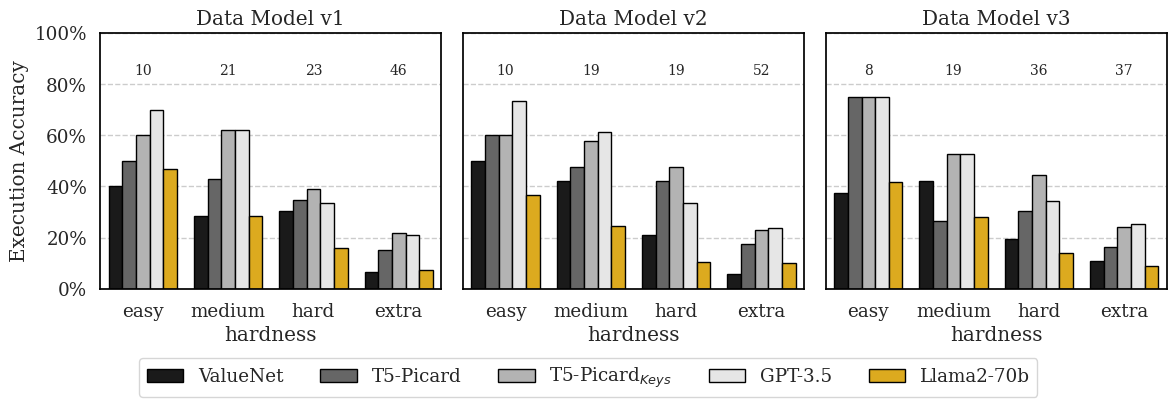

In [17]:
plot.plot_bars_counts(df_all[(df_all["split"]==300) | (df_all["split"]==30)  | (df_all["split"]==8)], x="hardness", hue="system", system = "",
                 order=["easy", "medium", "hard", "extra"],
                      hue_order= hue_order, filename="data_model-system-hardness-new")

In [18]:
# plot.plot_bars_counts(df_all[(df_all["split"]==300) | (df_all["split"]==30)], x="hardness", hue="system", system = "",
#                  order=["easy", "medium", "hard", "extra"])

### Query Characteristics vs. Execution Accuracy

In [19]:
def binarize(column):
    return (column > 0).astype(int)

def categorize_joins(column):
    return column.apply(lambda x: 0 if x == 0 else (1 if x == 1 else 2))

def zero_component(column):
    return column.apply(lambda x: 1 if x == 0 else 0)

def one_component(column):
    return column.apply(lambda x: 1 if x == 1 else 0)
    
def one_and_more_component(column):
    return column.apply(lambda x: 1 if x >= 1 else 0)


def two_and_more_component(column):
    return column.apply(lambda x: 1 if x >= 2 else 0)


df_all[r'$\geq 1$ agg'] = binarize(df_all['number_of_aggregations'])
df_all[r'$\geq 1$ set'] = binarize(df_all['number_of_set_operations'])
df_all[r'$\geq 1$ subquery'] = binarize(df_all['number_of_subqueries'])
df_all[r'$1$ join'] = one_component(df_all['number_of_joins'])
df_all[r'$\geq 2$ join'] = two_and_more_component(df_all['number_of_joins'])
df_all[r'$1$ project'] = one_component(df_all['number_of_projections'])
df_all[r'$\geq 2$ project'] = two_and_more_component(df_all['number_of_projections'])

df_all[r'$1$ filter'] = one_component(df_all['number_of_filters'])
df_all[r'$\geq 2$ filter'] = two_and_more_component(df_all['number_of_filters'])


In [20]:
df_qc = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  r'$\geq 1$ agg', r'$\geq 1$ set',
                  # r'$\geq 1$ subquery',
                  r'$1$ join', r'$\geq 2$ join',
                 r'$1$ project', r'$\geq 2$ project', r'$1$ filter', r'$\geq 2$ filter'
                 ]]
df_qc.head()

,system,db_id,split,id,question,query,label,$\geq 1$ agg,$\geq 1$ set,$1$ join,$\geq 2$ join,$1$ project,$\geq 2$ project,$1$ filter,$\geq 2$ filter
id_index,,,,,,,,,,,,,,,
2,T5-Picard,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,1,0,1,0,1,0,1
6,T5-Picard,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,0,0,1,0,1,0,0,1
11,T5-Picard,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,1,0,0,0,1,0,1,0
22,T5-Picard,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,0,0,0,1,1,0,1,0
51,T5-Picard,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,0,0,1,0,1,0,1


In [21]:
df_qc_melt = df_qc.melt(id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
                       value_vars=[
                  r'$\geq 1$ agg', r'$\geq 1$ set',
                           # r'$\geq 1$ subquery',
                           r'$1$ join', r'$\geq 2$ join',
                 r'$1$ project', r'$\geq 2$ project', r'$1$ filter', r'$\geq 2$ filter'
                       ],
                       var_name="Query Characteristic")
df_qc_melt = df_qc_melt.drop(df_qc_melt[df_qc_melt.value == 0].index)
df_qc_melt.head()

,system,db_id,split,id,question,query,label,Query Characteristic,value
2,T5-Picard,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,$\geq 1$ agg,1
6,T5-Picard,exp_v1,100,94,How many games did Brazil win?,SELECT count(*)\nFROM national_team AS T1\n ...,False,$\geq 1$ agg,1
7,T5-Picard,exp_v1,100,104,How many goals did each player score over all ...,"select nt.teamname, p.player_name, count(*)\n ...",False,$\geq 1$ agg,1
9,T5-Picard,exp_v1,100,120,How many goals did Ronaldo Score?,"SELECT T2.player_name, count(*) FROM match_fac...",False,$\geq 1$ agg,1
10,T5-Picard,exp_v1,100,122,How many goals did switzerland score in 2018,select sum(t.g)\nfrom\n (select sum(T2.away...,False,$\geq 1$ agg,1


In [22]:
df_qc_melt[df_qc_melt["system"] == "Llama2-70b$_{Keys}$"]

,system,db_id,split,id,question,query,label,Query Characteristic,value


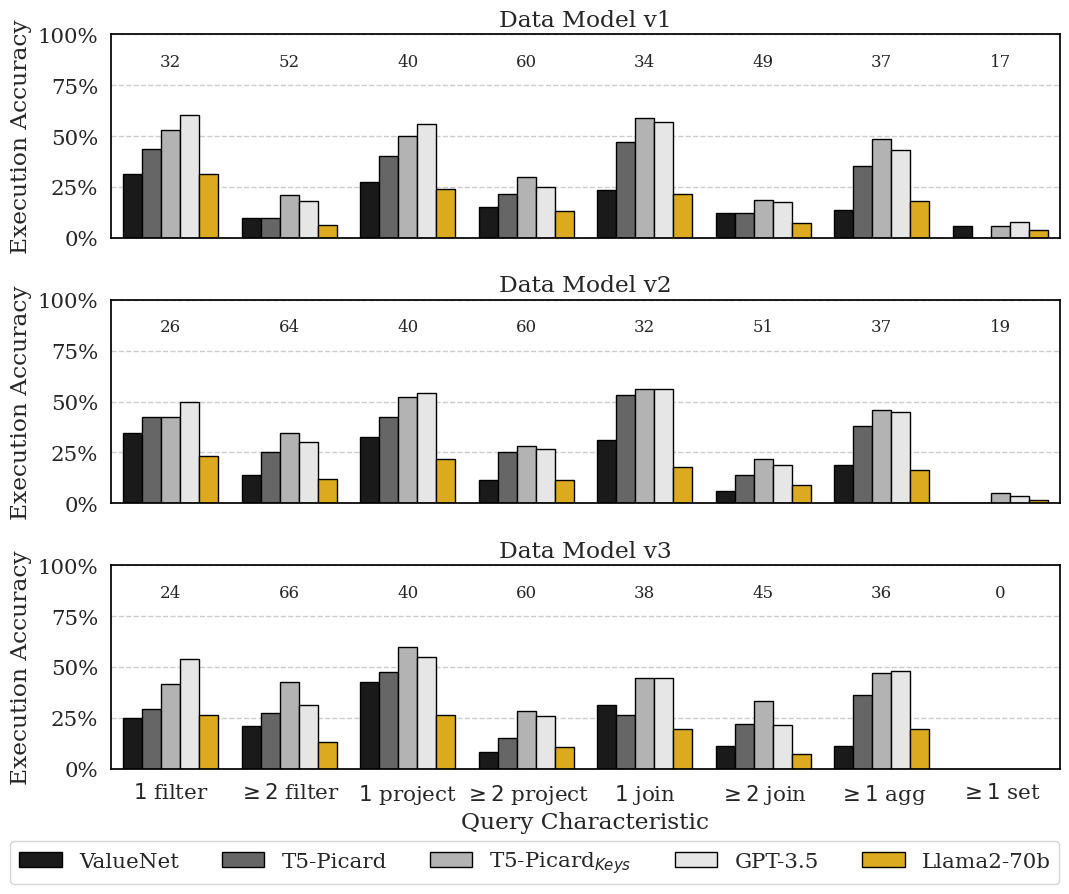

In [23]:
order = [
    r'$1$ filter',
    r'$\geq 2$ filter',
    r'$1$ project',
    r'$\geq 2$ project',
    r'$1$ join',
    r'$\geq 2$ join',
    r'$\geq 1$ agg',
    r'$\geq 1$ set',
]

plot.plot_bars_vertical(df_qc_melt[((df_qc_melt["split"]==300) | (df_qc_melt["split"]==30) | (df_qc_melt["split"]==8))],
                x="Query Characteristic", hue="system", system = "", order=order, figsize=(11,9),
               filename="sql-query-characteristic-without-subquery-300-data-model-v1-v2-v3-new",
                        hue_order= hue_order
                       )


### NL-SQL overlap based on SQL keywords (KW) and full columns or value matches 

In [24]:
df_all[r'$0$ KW'] = zero_component(df_all['number_of_keywords'])
# df_all[r'$1$ number_of_keywords'] = one_component(df_all['number_of_keywords'])
# df_all[r'$\geq 2$ number_of_keywords'] = two_component(df_all['number_of_keywords'])
df_all[r'$\geq 1$ KW'] = one_and_more_component(df_all['number_of_keywords'])


df_all[r'$0$ column'] = zero_component(df_all['full_column_match'])
# df_all[r'$1$ full_column_match'] = one_component(df_all['full_column_match'])
# df_all[r'$\geq 2$ full_column_match'] = two_component(df_all['full_column_match'])
df_all[r'$\geq 1$ column'] = one_and_more_component(df_all['full_column_match'])


df_all[r'$0$ value'] = zero_component(df_all['full_value_match'])
# df_all[r'$1$ full_value_match'] = one_component(df_all['full_value_match'])
# df_all[r'$\geq 2$ full_value_match'] = two_component(df_all['full_value_match'])
df_all[r'$\geq 1$ value'] = one_and_more_component(df_all['full_value_match'])


# df_all[r'$0$ col$_{partial}$'] = zero_component(df_all['partial_column_match'])
# df_all[r'$1$ partial_column_match'] = one_component(df_all['partial_column_match'])
# df_all[r'$\geq 2$ partial_column_match'] = two_component(df_all['partial_column_match'])
# df_all[r'$\geq 1$ col$_{partial}$'] = one_and_more_component(df_all['partial_column_match'])



                  # r'$0$ KW', r'$\geq 1$ KW',
                  # r'$0$ column', r'$\geq 1$ column',
                  # r'$0$ value', r'$\geq 1$ value',


In [25]:
df_nl_complexity = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
                           
                 ]]
df_nl_complexity.head()

,system,db_id,split,id,question,query,label,$0$ KW,$\geq 1$ KW,$0$ column,$\geq 1$ column,$0$ value,$\geq 1$ value
id_index,,,,,,,,,,,,,
2,T5-Picard,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,1,1,0,0,1
6,T5-Picard,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,0,1,0,1,0,1
11,T5-Picard,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,1,0,1,0,0,1
22,T5-Picard,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,1,0,1,0,1,0
51,T5-Picard,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,1,0,1,0,1


In [26]:
df_nl_complexity_melt = df_nl_complexity.melt(
    id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
    value_vars=[
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
        
                ],
                var_name="NL Characteristic")
df_nl_complexity_melt = df_nl_complexity_melt.drop(df_nl_complexity_melt[df_nl_complexity_melt.value == 0].index)
df_nl_complexity_melt.head()


,system,db_id,split,id,question,query,label,NL Characteristic,value
2,T5-Picard,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,$0$ KW,1
3,T5-Picard,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,$0$ KW,1
5,T5-Picard,exp_v1,100,89,Give me the year of the first world cup played.,select t1.year from world_cup as t1 order by t...,True,$0$ KW,1
6,T5-Picard,exp_v1,100,94,How many games did Brazil win?,SELECT count(*)\nFROM national_team AS T1\n ...,False,$0$ KW,1
8,T5-Picard,exp_v1,100,108,How many Goals did Germany score against Brazil?,"SELECT T3.year, T2.away_team_goals\n FROM nati...",False,$0$ KW,1


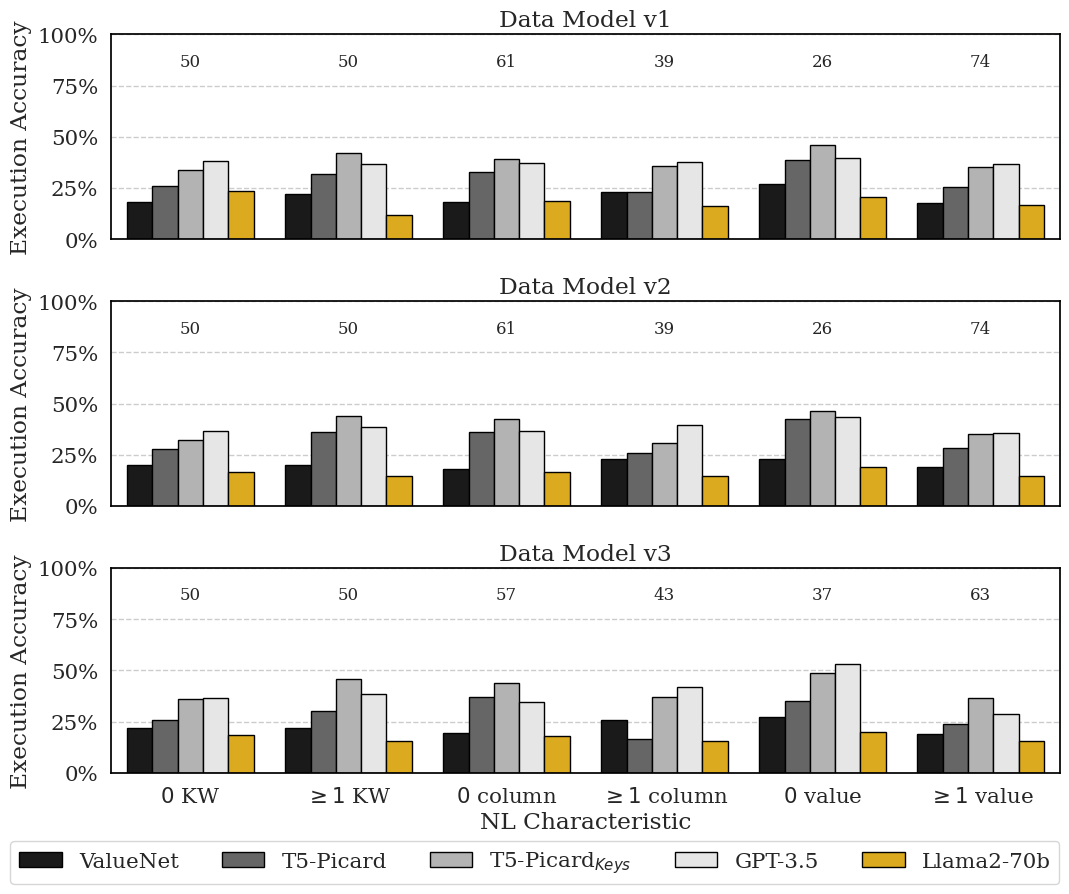

In [27]:
order = [
      # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
      # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
      # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
      # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$0$ KW', r'$\geq 1$ KW',
                  r'$0$ column', r'$\geq 1$ column',
                  r'$0$ value', r'$\geq 1$ value',
                  # r'$0$ col$_{partial}$', r'$\geq 1$ col$_{partial}$',
]
plot.plot_bars_vertical(df_nl_complexity_melt[((df_nl_complexity_melt["split"]==300) | (df_nl_complexity_melt["split"]==30) | (df_nl_complexity_melt["split"]==8))],
                x="NL Characteristic", hue="system", system = "", order=order,
               filename="NL-characteristics-new", figsize=(11,9), rotation=0,
                        hue_order= hue_order
                       )


### Train-Test Similarity

In [28]:
def lower_25(column):
    t = column.describe().loc["25%"]
    return column.apply(lambda x: 1 if x <= t else 0)

def upper_25(column):
    t = column.describe().loc["75%"]
    return column.apply(lambda x: 1 if x >= t else 0)

In [29]:
df_all[r'$\leq$ 25th %ile NL']  = lower_25(df_all['similarity_score_nl'])
df_all[r'$\geq$ 75th %ile NL']  = upper_25(df_all['similarity_score_nl'])


df_all[r'$\leq$ 25th %ile SQL']  = lower_25(df_all['similarity_score_sql'])
df_all[r'$\geq$ 75th %ile SQL']  = upper_25(df_all['similarity_score_sql'])


In [30]:
df_all[df_all['similarity_score_sql'] > df_all['similarity_score_sql'].describe().loc["75%"]]

,db_id,id,question,query,hardness,split,label,prediction,system,number_of_joins,...,$0$ KW,$\geq 1$ KW,$0$ column,$\geq 1$ column,$0$ value,$\geq 1$ value,$\leq$ 25th %ile NL,$\geq$ 75th %ile NL,$\leq$ 25th %ile SQL,$\geq$ 75th %ile SQL
id_index,,,,,,,,,,,,,,,,,,,,,
11,exp_v1,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,easy,100,True,select count(*) from national_team as t1 where...,T5-Picard,0,...,1,0,1,0,0,1,0,1,0,1
120,exp_v1,120,How many goals did Ronaldo Score?,"SELECT T2.player_name, count(*) FROM match_fac...",hard,100,False,select count(*) from player as t1 join match_f...,T5-Picard,1,...,1,0,0,1,0,1,0,1,0,1
124,exp_v1,124,How many goals has Giroud scored?,SELECT count(*) FROM match_fact AS T1 JOIN pla...,medium,100,False,select count(*) from player as t1 join match_f...,T5-Picard,1,...,1,0,0,1,0,1,0,1,0,1
173,exp_v1,173,How often did italy participate?,SELECT count(*) FROM national_team AS T1 WHERE...,easy,100,True,select count(*) from national_team where teamn...,T5-Picard,0,...,1,0,1,0,0,1,0,0,0,1
246,exp_v1,246,players of switzerland at worldcup 2018,SELECT T1.player_name\n FROM player AS T1 JOIN...,hard,100,True,select t1.player_name from player as t1 join p...,T5-Picard,2,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,exp_v3,928,Who won the world cup 1994?,SELECT T1.teamname FROM national_team AS T1 JO...,medium,200,True,NaN,ValueNet,1,...,1,0,1,0,1,0,0,1,0,1
1024,exp_v3,1024,toatal Goal score of shirt number 13?,SELECT count(*)\n FROM match_fact AS T1\n JOIN...,medium,200,True,NaN,ValueNet,1,...,0,1,0,1,1,0,1,0,0,1
1027,exp_v3,1027,total Goal score of shirt number 13?,SELECT count(*)\n FROM match_fact AS T1\n JOIN...,medium,200,True,NaN,ValueNet,1,...,0,1,0,1,1,0,0,0,0,1


In [31]:
df_similarity = df_all[["system", "db_id", "split", "id", "question", "query", "label",
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
                  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
                           
                 ]]
df_similarity.head()

,system,db_id,split,id,question,query,label,$\leq$ 25th %ile NL,$\geq$ 75th %ile NL,$\leq$ 25th %ile SQL,$\geq$ 75th %ile SQL
id_index,,,,,,,,,,,
2,T5-Picard,exp_v1,100,2,Against which team did Switzerland loose in 2018,"SELECT T1.teamname, T3.teamname, T2.home_team_...",False,0,0,0,0
6,T5-Picard,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,1,0,1,0
11,T5-Picard,exp_v1,100,11,At how many woldcups did italy participate in?,SELECT count(*) FROM national_team AS T1 WHERE...,True,0,1,0,1
22,T5-Picard,exp_v1,100,22,For which club does Maradonna play,select T3.club_name\n from player as T1\n join...,True,0,1,0,0
51,T5-Picard,exp_v1,100,51,Give me all matches where stage is Quarter-fin...,"SELECT m.year, nt.teamname, nt2.teamname, m.ho...",False,0,0,0,0


In [32]:
df_similarity_melt = df_similarity.melt(
    id_vars=["system", "db_id", "split", "id", "question", "query", "label"],
    value_vars=[
                  # r'$0$ number_of_keywords', r'$1$ number_of_keywords', r'$\geq 2$ number_of_keywords',
                  # r'$0$ full_column_match', r'$1$ full_column_match', r'$\geq 2$ full_column_match',
                  # r'$0$ full_value_match', r'$1$ full_value_match', r'$\geq 2$ full_value_match',
                  # r'$0$ partial_column_match', r'$1$ partial_column_match', r'$\geq 2$ partial_column_match',
                  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
                  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
        
                ],
                var_name="Similarity")
df_similarity_melt = df_similarity_melt.drop(df_similarity_melt[df_similarity_melt.value == 0].index)
df_similarity_melt.head()


,system,db_id,split,id,question,query,label,Similarity,value
1,T5-Picard,exp_v1,100,6,All players that have the shirt number 13 and ...,select player.player_name\r\n from player join...,False,$\leq$ 25th %ile NL,1
15,T5-Picard,exp_v1,100,144,How many players have played so far?,SELECT count(distinct p.player_id) from player...,False,$\leq$ 25th %ile NL,1
22,T5-Picard,exp_v1,100,184,In which country were the least amounts of gam...,"select s.country, count(*)\r\n from stadium as...",True,$\leq$ 25th %ile NL,1
23,T5-Picard,exp_v1,100,186,In which coutry is A.C. Milan playing?,select c.country from club as c where c.club_n...,False,$\leq$ 25th %ile NL,1
25,T5-Picard,exp_v1,100,214,List all clubs from Switzerland that were foun...,select * from club as c where c.country = 'Swi...,False,$\leq$ 25th %ile NL,1


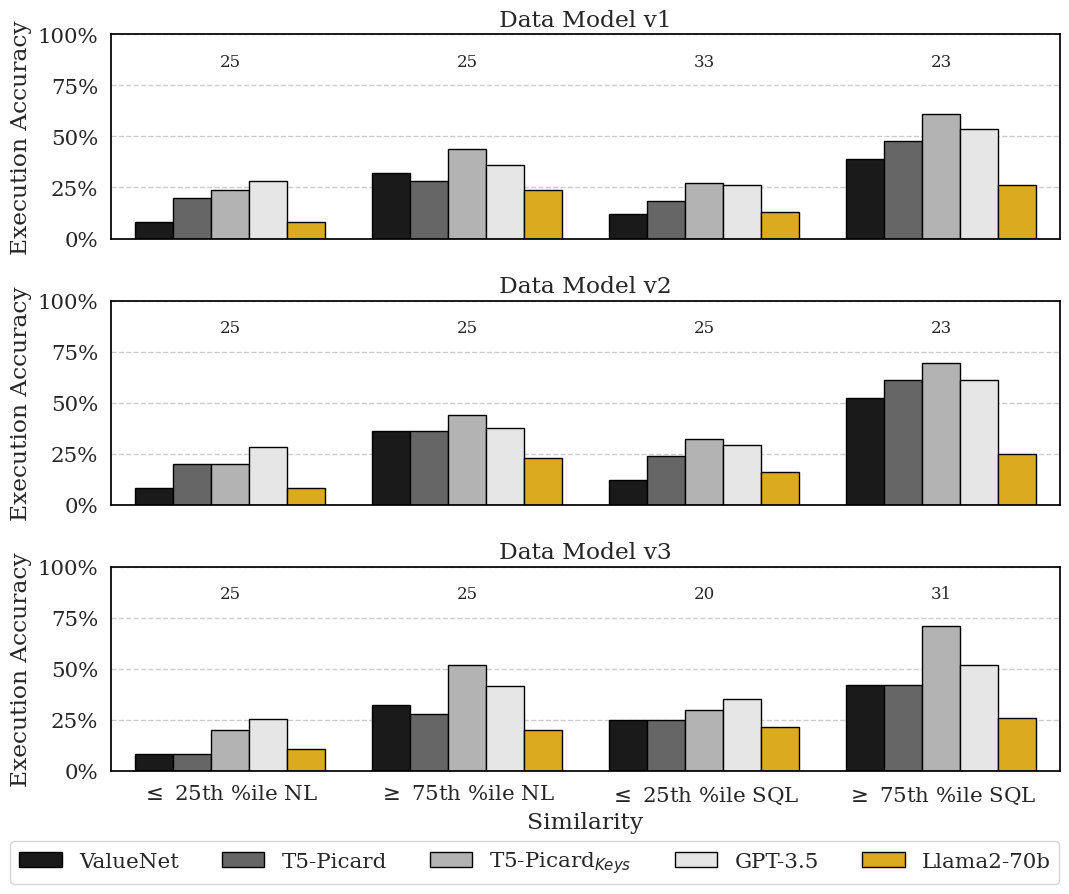

In [33]:
order = [
  r'$\leq$ 25th %ile NL', r'$\geq$ 75th %ile NL',
  r'$\leq$ 25th %ile SQL', r'$\geq$ 75th %ile SQL',
]
plot.plot_bars_vertical(df_similarity_melt[((df_similarity_melt["split"]==300) | (df_similarity_melt["split"]==30) | (df_similarity_melt["split"]==8))],
                x="Similarity", hue="system", system = "", order=order,
               filename="nl-characteristic-300-all-data-models", figsize=(11,9), rotation=0,
                        hue_order= hue_order
                       )


In [34]:
# plot.plot_bars_counts(df_similarity_melt[((df_similaritydata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABFAAAAN1CAYAAABYQQ83AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdeVxU1f8/8NcwMzDsqyKbC+KuCFZKfQvNXTI1s8gdRHPFFjU1l7Q0lz6SCriluWS5pOSKpuFWuS9lmfsGCgIjsskMDDC/P/jNxDDDAApzIV7Px6NHeM+5577vnXsP8Obcc0RqtVoNIiIiIiIiIiIqlZnQARARERERERERVXdMoBARERERERERlYEJFCIiIiIiIiKiMjCBQkRERERERERUBiZQiIiIiIiIiIjKwAQKEREREREREVEZmEAhIiIiIiIiIioDEyhERERERERERGVgAoWIiIiIiIiIqAxMoBARERHVUN26dUOzZs20/505c+a525w2bZpOm5GRkZUQacXcuHEDwcHBaNasGWJiYkx+fCIiIkMkQgdARERE1ce4ceMQFxdnsMzc3Bx2dnZwc3ND27Zt0a1bNwQEBFRJHJpf2ocPHw47O7sqOUZJQ4cOxdmzZ3W2TZ06FSNGjCjX/snJyejWrRtyc3O12zw8PHDkyJFKjbO4bdu2oaCgAAMGDMCjR48qpc0ZM2Zg0qRJmD9/Pg4cOFApbZZXXl4eVq5ciW+++QYqlcqkxyYiIioLR6AQERGR1sKFC/Hbb79pkwb16tXDb7/9ht9++w2xsbGIjIxEUFAQTp8+jeHDh6Nv3764cuVKpccRFRWFqKgoZGZmVnrbpYmMjNQ5dwBYvXo1srOzy7V/dHS0NnnSq1cv/Pbbb9ixY0eVxKrh5OSEOnXqQCwWV1qbtra2qFOnDmQyWaW1WR7x8fHo168ffvzxR3z11Vfw8PAw6fGJiIjKwgQKERERadnZ2aFOnTqwsrICAIjFYtSpUwd16tSBl5cX2rVrhxEjRmDfvn2YNGkSrl+/juDgYBw9elTgyJ+fg4OD9tytra0hlUqRnp6OtWvXlrlvfHw8YmJi4ODgAACQyWSoU6cOnJycqjjq/46bN2+iXbt2iI2NRa9evYQOh4iISA8TKERERFRhIpEI77//PkaPHg2VSoUPP/wQ9+/fFzqsSuPg4IDg4GAAwMaNG/H48WOj9ZcvX45XXnkFTZs2NUV4/0mdOnXCvHnzTPbKFhERUUVxDhQiIiJ6ZuPGjcOOHTsgl8sRERGBZcuWactUKhV+/fVXHD58GH/99ReSkpKQn58Pd3d3dOzYEaNGjYKzs7NOeyXnIenSpYtOeVxcHDw9PaFWq3H69GkcPnwYFy5cQFJSEhQKBVxdXfHKK69g1KhR8PLyeq5zGzt2LGJiYpCTk4OVK1di5syZBuvduHEDsbGx2LFjBxYsWFBmu+np6Vi/fj2OHDmChIQEAICXlxc6d+6M0NBQ7SiWkq5cuYLo6GhcuHABCoUCHh4eePPNNzFy5Mgyj5mWloZ169bhyJEjePjwIcRiMRo0aICuXbti+PDhsLW1LbONssTExGD69Ol62zdt2oQOHToA0P9827dvj++++w4AKvU1JCIioqrABAoRERE9MwsLC/To0QPff/89jhw5AoVCAUtLSwDA3bt3MXbsWDRv3hwff/wxmjRpAqVSiYsXLyIyMhL79+/Hli1b4OnpqW0vMjISKpUKr776KgDgxx9/hJubm7Zc80pMTk4OQkJC4OHhgcmTJ6N169ZQqVT4559/EBUVhX379mHTpk1o3br1M5+bi4sLhg0bhlWrVmHr1q0ICQnRiVVj2bJl6Nq1K1q2bFlmm9evX8eoUaOQkZGBiRMnahNER44cwbJly/DTTz9h7dq1eiNZ4uLi8MEHH8Dc3ByTJ0/Ga6+9BoVCgd27d2P8+PEoLCws9ZjXrl3DyJEjkZGRgQ8++ACBgYHIzc3FoUOHEB0djT179mDjxo061/lZBAUF4bXXXkNYWBiuX7+O999/H8OGDYO9vb22TmRkJO7du4fg4GCsXr0afn5+z3VMIiIiU+IrPERERPRcfH19ARStoFJ8QlmpVApPT0+sWbMGnTt3hpeXF5o0aYLg4GB8/fXXSElJwaJFi3Ta0sxDoqGZJFXzn2aUgpmZGTw8PLBs2TIEBQWhfv36aNy4Md58802sW7cOOTk5mD179nOf28iRI+Hg4ACVSoXly5frlV++fBlHjx7FxIkTy2xLoVBg7NixSE5Oxty5cxEWFoaGDRuiYcOGGDFiBObMmYPk5GSMHTsWCoVCu9/jx48xbdo0qFQqzJ8/H4MGDYKXlxeaNm2KKVOmwN3dHUlJSQaPmZOTg7FjxyI1NRVz587FyJEj0bRpU7Rp0waTJk3CuHHjcP/+fUybNu3ZL9L/p5n3ZeDAgQCAgwcPwsXFBebm5to6Dg4OOHr0KBo3boxOnTqVOtqGiIioOmIChYiIiJ5L8YlS5XK59utGjRohLi4Orq6uevu0a9cOAHD8+PFnWq7W0tISR44cQZs2bfTKPD094erqiitXrjz30r62trYYNWoUAGDv3r24efOmTvnSpUvxxhtvwMfHp8y2du7ciYcPH6JOnTro06ePXnnfvn1Rp04dPHjwADt37tRu37FjBzIzM+Hq6oqePXvq7RcSEmL0mImJiahTpw769eunVz548GAAwOnTp3Ht2rUyz6E8+vTpA2tra8THx+P333/XKcvPz8fOnTu188sQERHVJEygEBER0XNRq9WlliUlJWHhwoXo168fAgIC4O/vD39/f7z44osAgNzcXKSlpT3TcdPT07F8+XK88847eOWVV7Rt+/v7Izk5GQCQmJj4TG0XN2TIENStWxeFhYWIiIjQbj979izOnDmD8PDwcrVz7NgxAEUjdszM9H8EMzMz0yaETpw4od1++vRpAECbNm0gEon09mvYsCGkUqnBYx4/ftzoMZ2cnGBjYwMAOHfuXLnOoyzW1tbaBNHWrVt1yuLi4pCZmWkwmUNERFTdcQ4UIiIiei7FEyAuLi7ar//880+MGDECT58+xaBBg9CjRw+4urpqkwDdu3cHgGcagRIfH4/BgwcjJSUFQUFB+Oijj1CvXj3tKz5Dhw5FcnLyM7Vdkkwmw/jx4/HZZ5/hyJEjuHTpEvz9/REREYH+/fujfv365WpHk8wpfo1K0pQ9fPhQu00ziqbkhLsaIpEILi4uBl/j0RzzxIkT8Pf3N7i/5nUhTdKpMgwaNAhbtmzB0aNHkZycrB2FtG3bNvTq1UtnXhQiIqKaQtAESlRUFMLCwrSTzREREVHNc/nyZQBFE8q2atVKu33WrFnIzs7GgAEDKmU+kuIWLFiAlJQUvPzyy/j666/1yiWSyv0RZ8CAAfj2229x//59REREICwsDFeuXDF47OqoR48eZc7TUhkr8Wg0bdoUL7zwAi5cuIAff/wREyZMQHx8PE6ePIkffvih0o5DRERkSoK+whMdHY2MjAwhQyAiIqLnkJubi59//hlA0ZLDmj+KPHnyBNevXwcABAYGVvpxNa+1VEXbhkgkEnzwwQcAil7d+fTTTxEcHFyhlWvc3d0B6M4TU5KmzMPDQ7utXr16AIomkzVErVaX2qbmmCqVCg0aNDD6X/G5bCqDZjLZHTt2oKCgANu3b0eTJk20898QERHVNIImUNRqNd58803MmzcPt2/fFjIUIiIiegYrVqzA48ePYWlpiY8//li73di8KADKnNzV0FwfaWlpyM7OLrP9goICpKamGm3/WQQFBaFFixYAila3GTNmTIX279ixI4CiV5sMLTtcWFioHc1TPDH08ssvAyga6WPovO/du1fqq0rFj1naNdu7dy/69u1baZPIavTo0QNOTk5ISkrCL7/8gpiYGE4eS0RENZrgk8iOHz8ef//9N3r37o2hQ4ciNjYW+fn5QodFRERERqjVaqxevRqrV6+GVCrFsmXL4OXlpS13cnLSzg1y9OhRvf337dtntH3NHBk5OTnabd26dcPKlSsBAH5+fqW2fejQIeTl5VXshMpBJBJh2rRp6NKlCyZPnmx0LhND3n77bXh4eEAul2P37t165bt374ZcLoeHhwfefvtt7fYBAwbAzs4OKSkpOHjwoN5+GzZsKPOYjx49MnjM7OxsREVFIT8/H82bN6/Q+ZTF3NwcAwYMAADMnj0bOTk56Nu3b6Ueg4iIyJQEn0T2zTffREhICK5du4Zt27Zh9uzZmD9/PgYMGIB3331XZwgrERERVa3MzEzk5uZqExfFR3MolUo8fvwYly5dwo4dO3Dr1i20aNECX375JVq2bKnX1rRp0zBhwgTs2rUL9vb26Nu3L8zNzREXF4c1a9Zo66WlpcHCwgJ16tTRbuvQoQN+/vlnxMTEYPDgwTh06BCys7PxyiuvAAAmTZqEIUOG4OzZs5gyZQqGDh0KW1tbnDp1CkuXLoVEIkF+fj4yMjKQmpoKJycn7QSzpcnKyoJSqUROTo7OeRffNyAgAAEBAXr7pqWloaCgQDsSRKlUIjU1FVKpFA4ODgAAKysrrFy5EiNHjsScOXOQlpaGLl26AACOHDmCZcuWwdXVFatWrdKZH87JyQlfffUVJkyYgBkzZiA9PR2vvvoqlEoldu3ahYsXL8LZ2RmPHz/Wnq+9vT3Mzc21xxw1ahRmzZqFxMREdOvWDTKZDNeuXUNUVBSysrLw3Xff6V0HpVIJoCiJlZqaCisrK1hbWxu9hiUFBwdj7dq1SE9PR//+/cucZ0VzHQFo/5+VlaX9LGxtbSGTySoUAxERUWURqcsaY2tiCoUCe/fuxbZt23D16lW8+uqrGDRoEDp27GhwOC8RERFVnnHjxiEuLs5gmVQqha2tLdzd3eHn54euXbtqXy8pzfnz57Fy5Ur8+eefUCgUcHJywksvvYTRo0drl7rV0MyZAgCpqan4/PPPcfr0aSiVSnh4eGDo0KEYPHiwTv2oqCicPXsWWVlZsLe3R9u2bTFy5Eh88sknOivZxMXFwdPT02is06ZNw08//aS3vTz7du7cWed4Gu3bt9dJTgBF88Ns2LABcXFxSEhIAAB4eXmhS5cuCAkJgaOjo8Fj/PPPP4iKisL58+eRk5MDV1dXdO7cGePHj0f//v11jr9+/XptsgkoWvJZc8z4+HhIJBK4u7ujU6dOGDZsmE7yqrTrMGHChHIv2Vzc+++/j+PHj2P79u1o27at0bqlXUeNBQsWoH///hWOgYiIqDJUuwRKccePH8fkyZORnZ0NNzc3vPvuuxgwYECFh8wSERERERERET0PwedAMeTs2bP4+OOPMWHCBGRnZ0OtViM7Oxu7du1Cp06dMGnSpGeedLagoAAbNmxAu3bt0Llz5zLrX7lyBRMmTEBAQAB8fX3Ru3dvrFmzptTJ2oCime7XrFmD3r17w9fXFwEBARg/fjyuXLlisH5OTg5mz56NDh06wNfXF0OHDi21LlA0b0zXrl2hUCjKPmEiIiIiIiIiem6CJlBatGihXZIvKysLmzZtwhtvvIHhw4cjNjYWKpUKrVq1wvz583HixAkcPHgQ69evR0FBAfr371/qEOPSXLhwAW+99RZWrlyJp0+flln/2LFjCA4ORlZWFrZs2YLTp08jJCQEy5cvR1hYmMEJ6vLy8hAWFobly5cjJCQEp0+fxpYtW5CVlYXg4GAcO3ZMb59Zs2bh8OHDWLVqFY4ePQobGxuEhobiyZMnenVjY2Pxyy+/4IsvvtB5P5qIiIiIiIiIqo6gr/A0b94cq1atwuHDhxEbGwulUgm1Wg1LS0u88cYbGDhwIFq1amVw35iYGKxbtw779+8v17H279+PmTNnYty4cWjZsiVGjBgBDw8PHDlyxGD9J0+eoEePHgCAw4cPa1cDAIDIyEhERUVh/PjxmDhxos5+y5Ytw4oVKxAeHo4JEyZot6enp6N79+4AilYH0Ewol5CQgG7duiE8PBzjx48HADx8+BCdO3c22EZQUBA6d+6MefPmleu8iYiIiIiIiOj5Cf4Kz9ixY7Fz504oFAp4e3tjxowZOHHiBObNm1dq8gQAXnrpJe3Ea+Xh4eGB2NhYjBo1ChJJ2YsPbd26FRkZGejVq5dO8gQomlEeADZu3Ijc3Fzt9tzcXGzcuFGnjoaDgwN69uyJjIwMbN26Vbv91q1bUKvVaNGihU6s9vb2uHHjhk4bX375JcRiMaZOnVrOsyYiIiIiIiKiyiB4AkUsFqNXr17YtGkT9u/fr12G0Jhr165h0aJFsLKyKvdx/Pz84ObmVu76mteDXnjhBb2yunXron79+sjOzsbp06e120+fPo2nT5+iQYMGOrPZa2jaKv7qkWaJvpIrDIlEIm0ZAJw4cQK7d+/GZ599Vub1ISIiIiIiIqLKVfZQjCq2Z88eeHt7V2ifs2fPIikpCV26dKmSmAoKCrSjP7y8vAzW8fLyQnx8PK5du4aOHTsCAK5evVrmPgBw48YNFBYWwszMTHvu169fx+uvvw4ASElJQXp6Oho3bgwAePr0KT777DMEBQWha9eulXSWRRwcHJCbm1uh5BIRERERERGR0JKSkmBhYYH09HSTHE/QBMpbb72FunXrVni/YcOGYdiwYVUQUZHMzEztqzklX9/RsLOzAwCkpqZqt2m+Lm0fzXalUonMzEw4ODjA29sbgYGB2Lx5M7p16wYvLy8sWbIEMpkMAwcOBAAsWbIEOTk5mDVrVuWcYDG5ublQqVR6E+KamZlBIpFArVYbXHHI3NwcQNGKQyWn0ZFIJDAzM0NBQYHOKBqgaGSNVCoFAIOT8BprVywWQywWo7CwEPn5+RVqVyqVQiQSIT8/H4WFhQbbLetcjbVr6Fxr4zU01G7xmCrablVdw8po15TX8HnaLe+5Gmq3qq9hTbu/2Uewj6hIu+wjat/9zT6CfURF2mUfUfvub/YRVXN/G1sdtyoImkBZsGCB0fKEhIRSR3NUJaVSqf1a8yGXpLlxii8lrPm6rH1KHmPhwoWYPn06evfuDbFYjHr16mH58uVwc3PD+fPn8cMPP2Dx4sVwcnJCcnIyIiIicPbsWUgkEgQGBuKjjz6CjY3NM52rZuTJ33//rbNdLBbDwsIChYWFOrFqaF6fUiqVeje4ubk5JBIJVCqV3g1tZmYGmUwGtVptcBlmS0tLiEQi5Obm6j3MUqkUUqkU+fn5eg+dSCTSrkqUk5Oj165MJoOZmZnBdiUSCczNzVFQUKAzp03JdhUKhV4nYWFhAbFYjLy8PL2HubzX0FC7xq6hpt2yrqGhz8bYNdR8NkDFr6Gm3bKuoaF2jV1DzWdTVdewtHaNXUNNu8auYWmfTXmu4fPc38auoaHPBjB+DTWfzbNcQ/YRRdhH6LbLPoJ9RMl22UewjyjeLvsI9hEl22UfwT6ieLuGrmGrVq30psOoSoImUBISEjBgwACo1WrY2NjorYgze/ZsyOVyREREoEmTJiaLS/PBAqVntDQ3RPGlhDVfl7VPyWM4OztjzZo1yMnJgVKphJOTE4Ci0SEzZ85EYGAg+vTpA5VKhdDQUIhEIkREREChUOCTTz7BvXv3sG7dumc82yKlzSdjZmZmdK6Z4udRkuZGN0QkEhlt18LCotQyiURidCLgZ21XLBYb3dfYstHm5uY6CbLiyrqGxtp9nmto7LMR6hoaKxPiGj7P/W3sGgp1fxu7hs9zf1fVNWQfUYR9RPnaZR9RdrsA+wgN9hFF2EcUYR/xL/YRRdhHFPkv9BGmTJ4AAk8iu3fvXmRkZKBBgwYYO3asXvnbb7+NgoICDB48GImJiSaLy87OTvvBZWRkGKyTmZkJADqTxWq+Lm0fzXaZTKZ9Bag4KysrbfIEAKKiopCSkoK5c+cCKFqK+fbt25gxYwb8/f3xyiuvIDw8HL/99hvOnz9f0dMkIiIiIiIionISNIFy6tQpBAYGYuvWrXjnnXf0ynv37o2YmBg0bdoUa9asMVlcYrEYTZs2BYBSl0rWbG/evLl2m2Yp4rL2adq0KczMjF/6f/75B99++y2mTJmifc3m+vXrAABfX19tvbZt2+qUEREREREREVHlEzSBcuvWLYSFhUEsFpdaRyaTYcyYMTrLBZuCZrWbixcv6pWlpqYiPj4eNjY2CAgI0G4PCAiAtbU14uPjIZfL9fbTtFXWSjr5+fmYMWMG2rVrh/fee0+7XfMuWPHki+balXxPjIiIiIiIiIgqj6AJlKysrHJNEtuoUSMkJSWZIKJ/BQcHw97eHgcOHNC+rqOxbds2AMDw4cN13tGysLDA8OHDoVartXU0MjMzcfDgQdjb2yM4ONjosdetW4c7d+7giy++0HmnSzMPTPHRJteuXdMpIyIiIiIiIqLKJ2gCxdra2uBIjZIeP35sdJKaquDo6IhFixYhOzsbEydOxL1796BQKBATE4PVq1ejffv2GDNmjN5+Y8eORfv27bFq1SrExMRAoVDg3r17mDhxIrKzs7Fo0SI4ODiUety7d+8iOjoa4eHhaNiwoU7Zm2++CTc3NyxevBhJSUm4e/cuVqxYAT8/P52RMERERERERERUuUTqkmsamVBYWBhsbW2xdOlSo/U+/PBDZGZm4ttvv32u4zVr1qzUsgkTJiA8PFxv+5UrVxAdHY0LFy4gJycHXl5e6Nu3L0JDQ0udCTkvLw8bNmzArl27kJCQACsrK7zwwgsYP348WrVqVWoMarUagwcPRm5uLrZv327w1aY7d+7gyy+/xPnz52FmZobAwEDMmDFDZzLbivD29ta2S0RERERERFRTmPr3WUETKPv378ekSZPw6quvIiQkBH5+frCxsQEAZGdn448//sD69etx8uRJLFmyBEFBQUKF+p/FBAoRERERERHVRKb+fbb0xZlN4I033sDPP/+MQ4cO4ffffwcA7TrUKpUKQNGojO7duzN5QkRERERERESCEXQOFACIiIjAiBEjIJVKoVarkZeXh7y8PKjVakilUoSFhSEiIkLoMImIiIiIiIioFhP0FZ7injx5glOnTiExMREA4O7ujpdffhmOjo4CR/bfxld4iIiIiIiIqCaqVa/wFOfo6MjXdIiIiIiIiIioWhL8FZ7yyMjIwLBhw4QOg4iIiIiIiIhqqRqRQFGpVDh37pzQYRARERERERFRLSX4Kzz5+fnYtm0b4uLikJiYqF19p7jCwkIBIiMiIiIiIiIiKiJoAiU/Px9hYWE4c+ZMmXVFIpEJIiIiIiIiIiIi0idoAmXz5s24cOECwsPD0a5dO4wZMwbz5s2Dq6srAODRo0fYt28fzpw5g6+++krIUImIiIiIiIioFhM0gbJ//36MHj0a48ePBwCYmZnBz88PXl5e2jp9+vTB9OnTcfHiRXTv3l2oUImIiIiIiIioFhN0Etk7d+6gS5cuZdYbNGgQjh07VvUBEREREREREREZIPgcKI6Ojtp/S6VSPHnyRGcECgDY2NggKSnJ1OERVVsJCQnYtm0bjh8/DrVajfz8fHh6emLMmDF48cUXtfUiIyOxc+dO2Nvb6+xvZ2eH7777ztRhE9VafGaJapbExERs3boVv//+OwoLC5GbmwuJRIIBAwZg6NCh2rn5Tpw4gb179+LatWsQi8VQKBRo0KABxo0bBz8/P2FPgqgWKe/3WT6z9LwETaDUq1cPjx49gpubGwDAyckJFy5cgK+vr069kydPwsysRqy4TGQSc+bMQVpaGtauXQtXV1eoVCrMmzcPQ4YMQVRUFLp27aqtO3HiRPTv31/AaImIzyxRzXL69Gl89913+Pbbb+Hv7w8AOHToECZOnIinT59i7NixAIBvvvkGYrEY33//Pezs7JCbm4vp06cjNDQUMTExaNSokZCnQVRrlPf7LJ9Zel6CZiUaN26MjRs3av/t6+uLFStWYN++fcjIyEBGRgZ27dqFpUuXonHjxgJGSlT9jBs3TjvhslQqxfTp0yEWi7F+/XqBIyMiQ/jMEtUcLi4uCAsL0yZPAKB79+5o2rQpDh06pN3WvHlzfPTRR7CzswMAWFhYYOTIkcjJycGvv/5q8riJarPyfJ/lM0vPS9ARKJ07d8bMmTMRGhqK9evXY9CgQdi7dy+mTJmiV3fQoEECREhUPa1atQoSie7jK5PJYG9vj8zMTIGiIqLS8JklqlkCAwMRGBiot/3p06do2LCh9t8zZswwWAcoGllNRKZR3u+zfGbpeQmaQOnevTtyc3NhbW0NAPDz88PMmTOxcOFCqFQqAEUr84SGhnI4M1ExUqlUb1t6ejrS0tIQFBSks/3XX3/Fnj17kJaWBrVajQ4dOuD9999H3bp1TRUuUa3HZ5aoZsvOzsaaNWugUCgwadKkUuvdvn0bixYtQmBgIHr27GnCCIlqt4p8ny2OzyxVlKAJFDs7OwwePFhn2+DBg9GzZ09cuHABhYWF8PX1hbu7u0AREtUcW7duhaOjI0aPHq3dJpPJIBKJsGTJEjg7OyMhIQEff/wx+vfvjx07dqBevXoCRkxUu/GZJaoZgoKCcO/ePXh7eyMyMhItW7bUqxMXF4e5c+ciJSUFb731FqZNm6b313AiMi1D32c1+MzSsxKp1Wq1UAePiooCAFhbWyM0NFSoMGo1b29vAEVLSlPNdeXKFYSEhCAyMhIBAQFG6968eRO9e/dGcHAwPv/8cxNFSETF8Zklqlny8vKwZ88ezJkzBx9++CFGjhxpsF5KSgrmzZuHS5cuYe3atWjWrJmJIyUioPzfZ/nM1nym/n1W0Elko6KiEB0djRMnTggZBlGNdvv2bYwfPx6LFy8u8xcxAGjSpAlsbGxw6dIlE0RHRCXxmSWqeczNzTFgwAD069cPERERiI+PN1ivbt26WLRoERQKBebNm2fiKIkIqNj3WT6zVFGCrw38+eefcwUComd09epVjBo1CvPnz8frr7+uV56ammpwPzMzMxQWFlZ1eERUAp9ZoppBqVSioKBAb3uLFi1QUFCAK1euQK1WQ6FQ6NWxtLREgwYN8Ndff5kiVCIqxtj3WT6zVBkETaDY29vj//7v/4QMgajG+vPPPzFu3DgsXrxY5zkqPuHyq6++iuTkZJ394uPjkZmZiTZt2pgsViLiM0tUk4waNQoHDhzQ2/7gwQMAgKOjIx4+fIiAgAC9REtBQQGSk5Ph6OhokliJqEhZ32f5zFJlEDSB0rp1azx8+LDMetnZ2Zg+fboJIiKqGc6dO4fQ0FB06dIFDx8+xO7du7X/XblyRaduREQElEolACArKwtz5syBra2twQm1iKhq8JklqnlWr16tTZgAwNmzZ7F161b4+vripZdeAlA0UuV///sf8vLyABTNlfLVV18hNTUVI0aMECRuotqovN9n+czS8xJ0EtkzZ84gKioK69atg7m5ean15HI5XnvtNVy9etWE0dUOnES2Znrrrbfwzz//lFp+/fp1AMC+ffsQGxuL+/fvQyQSISsrC+3atUN4eLj2syeiqsdnlqhmuXjxImJiYnDp0iWYmZlBoVBAKpWia9euGD16NGxsbJCXl4fdu3fj4MGDSEpKglgsRkZGBho0aIBBgwahV69eQp8GUa1Rnu+zfGb/m0z9+6ygCZRz587h559/xqFDhxAcHAxvb284OztDJBLp1EtPT8fEiROZQKkCTKAQERERERFRTWTq32cFXex66NChEIlEUKvV2iWNiYiIiIiIiIiqG0ETKADg6uoKMzPjU7EUFhbqTapHRERERERERGQqgiZQRCIRdu7cCWdnZ6P1UlNTERgYaKKoiIiIiIiIiIh0CboKj5eXF8RicZn1zM3N8eKLL5ogIiIiIiIiIiIifYJOIkvC4ySyREREREREVBOZ+vdZQUeglFdeXh727t0rdBhEREREREREVEvViARKZmYmPvnkE6HDICIiIiIiIqJaStBJZHft2lWuellZWVUbCBERERERERGREYImUKZNmwaRSCRkCEREREREREREZRI0gQIAbdu2hVQq1duelpaGxMREKBQK+Pn5GaxDRERERERERGQKgidQoqOj4ezsbLBMM3nsvn37EB0dbeLIiIiIiIiIiIiKCJpACQ4OhkwmK7Xc3Nwcb7/9NkQiEZYvX45p06aZLLYzZ85g2LBh5ap7/fp17dfNmjUzWvebb75BYGCgzra//voLCxcuxOXLl2FjY4OePXvik08+gaWlpd7+SUlJeOONNzBo0CBMnjy5XPERERERERER0fMRNIEyd+7cctXr0KEDIiMjTZpA0WjUqFGpZQ8ePED9+vX1tnt5eUEiMXxpraysdP6dlpaG0NBQtG/fHseOHUN8fDzGjh2Lp0+fYvHixXr7f/bZZ6hTpw7Cw8MreCZERERERERE9KwEf4WnPORyOeRyuSDHPnjwoMHtCQkJ6N69u8FRKhs2bICnp2e52v/++++RlZWFWbNmwdnZGc7OzhgyZAiioqIwceJEnXZ2796NEydOYPPmzbCwsHi2EyIiIiIiIiKiCjMTOoCyZGVlYdmyZXBxcTHpcZ2dnREUFFRq+XfffQc7Ozv069fvuY5z8+ZNODg4wM3NTbutRYsWUKvVuHXrlnZbWloavvzySwwcOBAvvvjicx2TiIiIiIiIiCpG0BEoxuYYKSwsREZGBu7evYuCggKEhISYLjAAPj4++Prrrw2WZWdnY+fOnRg0aJDROVzKo6CgQG+bmVlRXis/P1+77YsvvoCVlRUmTZr0XMcjIiIiIiIioooTNIFy9uzZMuuIRCL06NEDH374YdUHVE47duyAUqnEkCFDDJb/+OOP+PXXXxEfH4+8vDy4u7sjMDAQYWFhcHV11anr7e2NX375BcnJydqymzdvassA4MiRI4iNjcWaNWtgY2NTJeeUk5Oj82+xWAwLCwsUFhZCqVTq1dfM5aJUKlFYWKhTZm5uDolEApVKBZVKpVNmZmYGmUwGtVoNhUKh166lpSVEIhFyc3P1kktSqRRSqRT5+fnIy8vTKROJRNpJd0ueCwDIZDKYmZkZbFcikcDc3BwFBQXIzc0ttV2FQgG1Wq1TbmFhAbFYjLy8PJ2EF1D+a2ioXWPXUNNuWdfQ0Gdj7BpqPhug4tdQ025Z19BQu8auoeazqaprWFq7xq6hpl1j17C0z6Y81/B57m9j19DQZwMYv4aaz+ZZriH7iCLsI3TbZR/BPqJku+wj2EcUb5d9BPuIku2yj2AfUbxdQ9dQrVZDJBLptVdVBJ8D5dNPP4Wtra3edjMzM9jZ2aFly5Z6SQchFRYWYvPmzejRo0epcZ05cwaffvopWrduDaVSibi4OMyfPx+7d+/GN998A19fX23dgQMHYuPGjVi0aBEWLFiAR48eYfPmzejUqRO8vb2RlZWFOXPmoG/fvujYsWOVnFNBQQGuXr2qs83JyQmNGjVCXl6eXhkAvPDCCwCAe/fu4enTpzplDRs2hLOzM548eYKEhASdMjs7OzRp0gSFhYUG2/X19YVUKkVCQgIyMjJ0yjw9PeHq6oqsrCzcuXNHp8zS0hItW7YEAFy7dk2vk2jZsiUsLS2RlJSEx48f65TVq1cPHh4eyMnJwY0bN3TKpFKp9vO6efOmXgfTtGlT2NraIjU1FY8ePdIpc3Z2RsOGDZGbm6t3riKRCO3atQMA3L17V69z8vb2hqOjI9LS0vDgwQOdMnt7e/j4+CA/P9/gNfTz84NYLEZCQgIyMzN1yry8vFC3bl1kZGTg3r17OmXW1tZo3rw5ABhst1WrVpDJZEhMTERaWppOmZubG9zd3ZGdna3z6hlQ1PG3bt0aQNE1LNn5N2vWDDY2NkhOTkZKSopOWZ06dVC/fn0olUq9mMzMzODv7w8AuHPnjt43jsaNG8PBwQFyuRyJiYk6ZQ4ODmjcuHGp19Df3x8ikQj3799Hdna2TlmDBg3g4uKC9PR03L9/X6fMxsYGzZo1g1qtNthumzZtYG5ujgcPHiA9PV2nzN3dHW5ubsjOzsbt27d1ymQyGVq1agWgaNWvkt+sWrRoASsrKzx69Aipqak6ZXXr1oWXlxcUCoXOimFA0Tf0tm3bAgBu376t9w3Jx8cH9vb2SE1NRVJSkk4Z+4gi7CP+xT6iCPuIIuwjirCP+Bf7iCLsI4qwjyjCPuJfz9pHqFQqmJub67VXVUTqkp++CTVv3hy///47nJ2dhQqhwg4fPowJEyZg+/bt2g6juGPHjuGVV17R+xB37tyJTz/9FB4eHjh48KBO+fHjxzF37lykpKSgsLAQr732Gr788ks4Oztj1qxZOHLkCPbv3w8HBwccO3YMa9asQXx8PFxdXTF06NDnmodFM8rl77//1tnOrLB+u8wK8y9HxdvlX47YR5Rsl30E+4ji7bKPYB9Rsl32EewjirfLPoJ9RMl22Uc8Wx/RqlUriEQivaRXVRE0gXLq1Cm89NJLpS75Wx0NGTIEKpUK27Ztq9B+BQUFaN++PbKzs7F69Wp06tRJr05aWhosLS21D9Hp06cxfPhwLF26FL169cL58+cxZMgQDBkyBO+++y7i4uKwdOlSLFmyBL17936m89EkUEx1wxERERERERFVBlP/PivoKjwvv/xyjUqeXLlyBefOncPw4cMrvK9YLNYuSVxy2JGGk5OTTgZy1qxZ6Nq1K3r16gUAiIyMhJubGz799FM0bdoUY8eOhb+/P5YtW/aMZ0RERERERERE5SFoAiUrKwvh4eGYMGECpkyZolceHh6OefPm6b33JpSNGzfCzc0N3bt3f6b9NYN9yjPJzbJly5Ceno7PPvtMu+3atWto1aqVdpUeoOg9vvj4eIPDoIiIiIiIiIiocgiaQNm3bx8OHz6MU6dOGRyJ0qBBA2zbtg1Dhw4VPEGQkpKC2NhYDBo0qNRRM/PmzcMnn3xisKygoEA7QU/jxo2NHuvy5cvYtGkTpk6dirp162q3FxYW6iRPgKKRLZoyIiIiIiIiIqoagiZQfv31VzRu3BixsbFYsGCBXvnkyZOxZ88epKenY/PmzQJE+K8ffvgBEokEwcHBpdbJzs7Gr7/+iqysLL2ymJgYPH36FO7u7njllVdKbUOlUmHGjBkICAjAgAEDdMp8fHz0Zm6+fv063Nzcqmx5YyIiIiIiIiISOIFy9epVTJw40egyxY0aNcKHH36I2NhYE0amKzc3F1u3bkXfvn1hb29faj2RSIS0tDS8//77uHDhAp4+fYqMjAzs2LEDX375Jezs7PD1118bXWZp9erVePDgAT7//HO9stGjR+Pu3btYs2YNsrKysGfPHpw8eRKjR4+ulPMkIiIiIiIiIsMEncFVLpejRYsWZdZr27at3vrUpqQZBTNs2DCj9TQjRw4dOoSPP/4Yjx8/1k4e++677yI0NBT16tUrdf+bN29i1apVmDJlinbC2eI6deqEBQsWYM2aNVi+fDnq1q2LKVOmYODAgc99jkRERERERERUOkGXMX7hhRewffv2MucEuX37Nt555x1cvHjRRJHVHlzGmIiIiIiIiGqiWrWMcaNGjbB///4y6+3fvx+NGjUyQURERERERERERPoETaD06NEDq1evxurVqw0uVfz06VOsXLkSa9asQa9evQSIkIiIiIiIiIhI4Fd4FAoFBgwYgDt37kAqlcLHxwdOTk4AgMePH+P27dtQqVTw8fHBjz/+CJlMJlSo/1l8hYeIiIiIiIhqIlP/PivoJLKWlpb49ttvER4ejsuXL+Off/7Rq+Pr64vIyEgmT4iIiIiIiIhIMIImUADA1dUV27dvx7Fjx3Ds2DEkJiYCANzd3dGxY0e8/vrrAkdIRERERERERLWd4AkUjU6dOqFTp05Ch0FEREREREREpEfQSWSJiIiIiIiIiGoCQUegZGVl4dNPP4VarYalpSW++uornfLw8HC4urrio48+grW1tUBREhEREREREVFtJ+gIlH379uHw4cM4deoUJBL9XE6DBg2wbds2DB06FDk5OQJESEREREREREQkcALl119/RePGjREbG4sFCxbolU+ePBl79uxBeno6Nm/eLECEREREREREREQCJ1CuXr2KiRMnwtXVtdQ6jRo1wocffojY2FgTRkZERERERERE9C9BEyhyuRwtWrQos17btm3x4MEDE0RERERERERERKRP0ASKubk5VCpVmfXy8/NRWFhogoiIiIiIiIiIiPQJmkBp1KgR9u/fX2a9/fv3o1GjRiaIiIiIiIiIiIhIn6AJlB49emD16tVYvXo1nj59qlf+9OlTrFy5EmvWrEGvXr0EiJCIiIiIiIiICBCp1Wq1UAdXKBQYMGAA7ty5A6lUCh8fHzg5OQEAHj9+jNu3b0OlUsHHxwc//vgjZDKZUKH+Z3l7ewMA7ty5I3AkREREREREROVn6t9nJSY5SiksLS3x7bffIjw8HJcvX8Y///yjV8fX1xeRkZFMnhARERERERGRYARNoACAq6srtm/fjmPHjuHYsWNITEwEALi7u6Njx454/fXXBY6QiIiIiIiIiGo7wRMoGp06dUKnTp0MluXm5uLAgQPo16+fSWMiIiIiIiIi4cTHx0Mulwsdhh4XFxfUr19f6DDIxKpNAsWYrKwsTJ8+nQkUIiIiIiKiWiI+Ph4tWrRATk6O0KHosbKywtWrV5lEqWWqfQLl0aNH2Lhxo9BhEBERERERkQnJ5XLk5ORg0qRJ8PT0FDocrQcPHmDJkiWQy+VMoNQy1TaB8uuvv2LLli04fvw4CgsLhQ6HiIiIiIiIBODp6QkfHx+hwyCqXgmU9PR07Ny5E9u2bUNCQgIAQLPKskgkEjI0IiIiIiIiIqrFqkUC5dKlS9iyZQt+/vln5OXlaZMm7u7u6NevH1577TUMGjRI4CiJiIiIiIiIqLYSLIGiUCiwZ88ebNmyBdevXwdQNNpEIpGgsLAQ//vf/9CrVy+IRCKkpaXBzc1NqFCJiIiIiIiIqJYzeQLl5s2b2LJlC/bs2YOnT59qR5u4urrivffew4ABA9C9e3e0adNG+9qOk5MTjhw5YupQiYiIiIiIiIgAmDiBMnjwYFy8eBHAv3ObBAQEYPDgwejcuTPEYrEpwyEiIiIiIiIiKheTJlAuXLgAkUgEGxsb9OvXDwMHDoS3t7cpQyAiIiIiIiIiqjAzUx5s6NChsLOzQ25uLrKysvD06VNTHp6IiIiIiIiI6JmYNIEyY8YMnDhxAnPnzsW9e/fwzjvvYMCAAfjpp5+Ql5dnylCIiIiIiIiIiMrNpAkUALCwsMBbb72FrVu3YteuXWjdujXmz5+P1157DV999RUSEhK0k8cSEREREREREVUHJk+gFNe8eXPMmTMHJ06cwKRJk3D69Gl0794dSqUSFy5cQGFhIQAgLS0NXbp0ETJUIiIiIiIiIqrFBE2gaFhZWeHdd9/Fzp07sX37drz11luYO3cuOnbsiP/973+4ceMGEhMThQ6TiIiIiIiIiGopk67CUx5t2rRBmzZtMH36dOzevRvbtm3D2rVr+VoPERERERERVRtXr14VOgQdLi4uqF+/vtBh/KdVuwSKho2NDQYPHozBgwfjxIkTGD16tNAhERERERERUS335MkTmJmZYciQIUKHosPKygpXr15lEqUKVdsESnGtW7eGm5ubyY8bGRmJqKioUsvbtm2L7du3621PSEjA8uXLcerUKWRkZKBevXro0aMHxo4dC2tra736f/31FxYuXIjLly/DxsYGPXv2xCeffAJLS0u9uklJSXjjjTcwaNAgTJ48+flOkIiIiIiIiCokOzsbhYWFiIqKgo+Pj9DhAABu3bqFCRMmQC6XM4FShWpEAsXJyQlHjhwR5Ng2NjaoU6eOwTIPDw+9bX///TeGDRsGT09PrFmzBt7e3vj9998xdepUHDt2DN9//z3s7e219dPS0hAaGor27dvj2LFjiI+Px9ixY/H06VMsXrxYr/3PPvsMderUQXh4eOWdJBEREREREVWIj48PfH19hQ6DTKhGJFCE1K1bNyxcuLBcdfPy8vDxxx8jNzcXUVFR2sxfly5d8Omnn2L69On48ssvsWjRIu0+33//PbKysjBr1iw4OzvD2dkZQ4YMQVRUFCZOnAhPT09t3d27d+PEiRPYvHkzLCwsKvdEiYiIiIiIiKhU1WIVnv+KgwcP4v79+3j55Zf1hk317t0bNjY22L17Nx49eqTdfvPmTTg4OOi8otSiRQuo1WrcunVLuy0tLQ1ffvklBg4ciBdffLHqT4aIiIiIiIiItJhAqURxcXEAgBdeeEGvzNzcHG3atIFardZ5HamgoECvrplZ0ceSn5+v3fbFF1/AysoKkyZNquywiYiIiIiIiKgMfIWnDA8ePMDkyZNx4cIFpKamwtraGq1atcI777yDXr166dS9du0aAMDLy8tgW15eXjh16pS2HgB4e3vjl19+QXJyMlxdXQEUjUrRlAHAkSNHEBsbizVr1sDGxqbSzxEAcnJydP4tFothYWGBwsJCKJVKvfpWVlYAAKVSicLCQp0yc3NzSCQSqFQqqFQqnTIzMzPIZDKo1WooFAq9di0tLSESiZCbm6uXXJJKpZBKpcjPz0deXp5OmUgk0k66W/JcAEAmk8HMzMxguxKJBObm5igoKEBubm6p7SoUCqjVap1yCwsLiMVi5OXl6SS8gPJfQ0PtGruGmnbLuoaGPhtj11Dz2QAVv4aadsu6hobaNXYNNZ9NVV3D0to1dg017Rq7hqV9NuW5hs9zfxu7hoY+G8D4NdR8Ns9yDdlHFGEfodsu+wj2ESXbZR/BPqJ4u+wj2EeUbNfQMck4hUKBnJycWtNHqNVqiEQiY5ekUjGBUoY///wTHTt2xJQpU+Do6Ii7d+/i66+/xocffohjx45h4cKF2g8sJSUFAHQmiS3Ozs5Opx4ADBw4EBs3bsSiRYuwYMECPHr0CJs3b0anTp3g7e2NrKwszJkzB3379kXHjh2r5BwLCgr01jB3cnJCo0aNkJeXZ3B9c80om3v37uHp06c6ZQ0bNoSzszOePHmChIQEnTI7Ozs0adIEhYWFBtv19fWFVCpFQkICMjIydMo8PT3h6uqKrKws3LlzR6fM0tISLVu2BFCUyCrZSbRs2RKWlpZISkrC48ePdcrq1asHDw8P5OTk4MaNGzplUqlUOzHUzZs39TqYpk2bwtbWFqmpqTqvZgGAs7MzGjZsiNzcXL1zFYlEaNeuHQDg7t27ep2Tt7c3HB0dkZaWhgcPHuiU2dvbw8fHB/n5+QavoZ+fH8RiMRISEpCZmalT5uXlhbp16yIjIwP37t3TKbO2tkbz5s0BGF7TvlWrVpDJZEhMTERaWppOmZubG9zd3ZGdna3z6hlQ9M2zdevWAIquYclvzM2aNYONjQ2Sk5N1ng0AqFOnDurXrw+lUqkXk5mZGfz9/QEAd+7c0fvm27hxYzg4OEAulyMxMVGnzMHBAY0bNy71Gvr7+0MkEuH+/fvIzs7WKWvQoAFcXFyQnp6O+/fv65TZ2NigWbNmUKvVBttt06YNzM3N8eDBA6Snp+uUubu7w83NDdnZ2bh9+7ZOmUwmQ6tWrQAA169f1/tm1aJFC1hZWeHRo0dITU3VKatbty68vLygUChw/fp1nTKJRIK2bdsCAG7fvq33DcnHxwf29vZITU1FUlKSThn7iCLsI/7FPqII+4gi7COKsI/4F/uIIuwjipS3jyh57als9+7dg6WlZa3pI1QqFczNzY1ckcolUpf8DkFad+/ehUqlQtOmTXW2q1QqBAUFIT4+HnPnzsV7770HoKjzKSwsxMaNGxEQEKDX3rJly7BixQq8/PLL2LBhg3b78ePHMXfuXKSkpKCwsBCvvfYavvzySzg7O2PWrFk4cuQI9u/fDwcHBxw7dgxr1qxBfHw8XF1dMXToUPTr1++Zz1EzyuXvv//W2c6/HOm3y78c8S9HxdvlX47YR5Rsl30E+4ji7bKPYB9Rsl32EewjirfLPqJ89/epU6fwyiuv4Ouvv642ywUDwNGjRxEREYGDBw9Wm1V4Ll++jJ49e+K3336Dv79/rekjWrVqBZFIpJcYryo1YgSKSqXCH3/8gZdeesmkx23UqJHB7VKpFO+99x4WL16MH3/8UZtAkclkyMnJ0bsJNTQ3kebG0ejYsSOOHDmCtLQ0WFpaaju406dPY/v27Vi6dCkcHBxw/vx5jBkzBkOGDMGcOXMQFxeHqVOnQiKRoHfv3s91rpoHrCQzM7NSywydS3GaG90QkUhktF1jqwxJJBJIJKXfus/arlgsNrqv5nMxxNzcvNTMZ1nX0Fi7z3MNjX02Ql1DY2VCXMPnub+NXUOh7m9j1/B57u+quobsI4qwjyhfu+wjym4XYB+hwT6iCPuIIuwj/lXT+giuPFpxlpaWOtf0v95HmPL1HaCGTCKbkZGBYcOGCR2GjgYNGgCAzhC5unXrAoDekFENzRAnTb2SnJycdP5KMWvWLHTt2lU710pkZCTc3Nzw6aefomnTphg7diz8/f2xbNmyyjkpIiIiIiIiIjKoWoxAuXz5Mv7++29kZGQYXJXG0BAfoWmGQRXPeDVv3hz37t3Te19XQ7Nd8+6XMcuWLUN6ejo+++wz7bZr167hpZde0q7SAxS967tx40adiYKIiIiIiIgqIj4+HnK5XOgwdBiaK4NISIImUNLT0zF27Fj88ccfRuuZemZdAEhKSsKAAQOwbt06gwkPzaQ4mjlEAKBr1644ePAgLl68qFc/Ly8Pf/31F0QiEbp06WL02JcvX8amTZvw+eef64xWKSws1EmeAEXDmDRlREREREREFRUfH4/mzZsbnPOCiP4laALlq6++wqVLl+Do6IjWrVvD3t7e4DtYCoUCP//8s0ljKygogFwux7Fjx/QSKHl5edi6dSsA4O2339Zu79GjByIjI3Hy5EkkJCToLGccGxuL7Oxs9OvXT7tcsSEqlQozZsxAQEAABgwYoFPm4+OjN7v79evX4ebmVmXLGxMRERER0X+bXC6HQqHA66+/DkdHR6HD0YqPj8f58+eFDoNIS9AEyvHjxxEUFITFixcbnWQmNTUVBw8eNGFk/76aEx0dDalUiqCgIDg7O+POnTuIiIjAgwcP0Lt3b+0EskDRxEtLlizB8OHDMWHCBCxatAiNGjXC77//jvnz58PHxwfTp083etzVq1fjwYMHWLlypV7Z6NGjMXr0aKxZswYDBw7E0aNHcfLkSZ3XfIiIiIiIiJ6Fo6MjXFxchA5D68mTJ0KHQKRD0ARKRkYGwsLCjCZPgKI1oydMmGCiqIp4eHjgp59+woEDB7B//35ER0cjNzcXdnZ2aNmyJb7++msEBQXp7demTRvs2rULkZGRCAsLQ0ZGBurVq4fg4GCMGTPG6EiRmzdvYtWqVZgyZQo8PT31yjt16oQFCxZgzZo1WL58OerWrYspU6Zg4MCBlXruRERERERERKRL0ASKu7s77OzsyqxnZWVl8gQKALRs2RItW7bEpEmTKrRf/fr18dVXX1X4eE2aNMHff/9ttE7//v3Rv3//CrdNRERERERERM9O0GWM+/Tpg7i4uDLrVcdljImIiIiIiIio9hA0gTJ69GhcvHgRUVFRSElJKbWeSqXCuXPnTBgZEREREREREdG/BH2Fp0ePHlCr1Th8+DCio6Mhk8ng6Oiot2Qxl+glIqLqKD4+HnK5XOgw9Li4uKB+/fpCh0FERET0nyJoAuXhw4c6/1YoFKWuPV4yqUJERCSk+Ph4tGjRAjk5OUKHosfKygpXr15lEoWIiIioEgmaQAGAqKioMieSTU9PxwcffGCiiIiIiMoml8uRk5ODSZMmGVw5TSgPHjzAkiVLIJfLmUAhIiIiqkSCJ1D8/f3h7OxstI5cLodarTZRREREROXn6ekJHx8focMgIiIioiom6CSy33//PRwcHMqs5+TkVK7VeoiIiIiIiIiIqoKgI1BeeOGFctUzMzODh4dHFUdDRERERERERGSY4K/waBw/fhwnTpzQTizr4eGBwMBAdOzYUeDIiIiIiIiIiKi2EzyBkpKSgokTJ+LPP/8EAO1cJyKRCD/88APatm2L5cuXo27dukKGSURERERERES1mKAJFKVSibCwMNy8eRMSiQSNGzeGi4sLgKKJY2/fvo0//vgDYWFh+PHHHyGTyYQMl4iIiIiIiIhqKUETKJs3b8bt27cxYcIEhISEwMbGRqc8KysLGzduxIoVK/D9998jLCxMoEiJiIiIiIiIqDYTNIFy8OBBjB49GhMmTDBYbmtriwkTJkClUuHAgQNMoBARERERUY0WHx8PuVwudBg6rl69KnQIRDWCoAmUu3fvYtGiRWXW69OnDzZv3myCiIiIiIiIiKpGfHw8mjVrBqVSKXQoRPQMBE2g5Ofnw8LCosx65ubmyM/PN0FEREREREREVUMul0OpVMLBwQESieDreWgplUpkZ2cLHQZRtSfoU+vm5obTp09jwIABRuudPn0abm5uJoqKiIiIiIio6kgkEpibmwsdhhb/WE1UPmZCHvy1117D//73P5w/f77UOufOncOSJUsQGBhowsiIiIiIiIiIiP4l6AiUkSNH4qeffsLQoUPh6+sLPz8/ODs7AwAeP36MS5cu4a+//oKtrS0nkCUiIiIiIiIiwQiaQHF1dUVUVBTCw8Px559/4vLlyzrlarUadnZ2iIyMhKurq0BREhER1TzVcUUFFxcX1K9fX+gwiIiIiJ6J4DMXBQQEYN++fdiwYQOOHz+OxMREAIC7uzs6duyIkJAQJk+IiIjK6cmTJzAzM8OQIUOEDkWPlZUVrl69yiQKERER1UiCJ1CAopEoU6dOxdSpU4UOhYiIqEbLzs5GYWEhoqKi4OPjI3Q4Wrdu3cKECRMgl8uZQCEiIqIaqVokUMqSm5uLAwcOoF+/fkKHQkREVCP4+PjA19dX6DCIiIiI/jMEXYWnvLKysjB9+nShwyAiIiIiIiKiWsqkI1Dy8vJw8+ZNtGzZEiKRCLt27SrXfllZWVUbGBERERERERGRESZNoAwbNgx//vkn+vbti4ULF2LatGkQiUSmDIGIiIiIiIiIqMJMmkB58uQJ1Go10tPTtdvatm0LqVRqdD+VSoU///yziqMjIiIiIiIiIjLMpAmUH374AefPn8f//d//abdFR0fD2dnZ6H6pqakIDAys6vCIiAhAfHw85HK50GHocXFx4eotRERERCQYkyZQnJ2d0aNHD+2/X3rppTJHnwCAubk5XnzxxaoMjYiIUJQ8adasGZRKpdCh6JHJZLh+/TqTKEREREQkCEGXMf7uu+/KrJObmwt7e/ty1SUioucjl8uhVCrh4OAAiaT6rHSfn5+P9PR0yOVyJlCIiIiISBCCLmM8ffp0ZGdnl1oul8vh5+eHwYMH4+HDhyaMjIiodpNIJDA3N682/1WnZA4RERER1U6CJlB27dqF3NzcUsttbW0xdepUZGRkYNGiRSaMjIiIiIiIiIjoX4L+SU+tVhstt7CwQEhICDp06ICwsDATRUVEREREREREpEvQESgAIBKJyqyTn5+PrKwsE0RDRERERERERKTPpCNQfvnlF8TFxelsmzdvHiwsLErdJycnBxcuXOCkgUREREREREQkGJMmUK5du4affvpJZ1tsbGyZ+4lEIkyaNKmqwiKiMsTHx0Mulwsdhh4XFxcmV2uZq1evCh2CVnWKhYiIiIiqnkkTKO3bt8eECRMAFM1/smLFCoSEhMDa2tpgfZFIBHt7e3To0AFNmjQxZagAgEuXLmHv3r04d+4cEhISkJ+fj7p16+Kll15CaGgomjdvrrdP586dja4YNGfOHAwcOFBn2/379zF//nycPXsWEokEHTt2xIwZM+Dk5KS3f3Z2Nt588034+fnh66+/fv6TJCpDfHw8WrRogZycHKFD0WNlZYWrV68yiVILFBQUQCQSYciQIUKHQkRERES1lMkTKO3bt9f+Ozo6GiNHjoSzs7MpwyiXPXv2YMqUKfDw8MCnn36KF154AQDw+++/Y/78+di3bx8WLVqE3r176+3r5uYGmUxmsF17e3udf+fl5WHEiBFwcXHBgQMH8PTpU4wdOxYTJ07E5s2b9fb/3//+h5ycHMyaNasSzpKobHK5HDk5OYiKioKPj4/Q4WjdunULEyZMgFwuZwKlFlCr1VCr1Xj99dfh6OgodDgAipKL58+fFzoMIqqg6jiqkiMqiYhqBkFX4dm0aZNeQqG60CyvvHz5crRu3Vq7vXfv3rC2tsaYMWMwa9YsvPbaa3rnsGjRInTo0KFcx9m3bx8ePHiARYsWwc3NDQAwfvx4TJ06FefOncNLL72krXv+/Hls3boVixcvNjg6hagq+fj4wNfXV+gwqJZzdHSEi4uL0GEAAJ48eSJ0CERUQdV1VCVHVBIR1QyCJlCKj0YxJj8/H5cvX0a7du2qOKJ/OTo6olOnTjrJE42OHTvC3NwcOTk5OH/+PLp06fLMx7l58yYA6LwOpPn6xo0b2gRKbm4uZsyYgcDAQPTp0+eZj0dERERUW2lGVU6aNAmenp5ChwMAePDgAZYsWYJff/0VLVq0EDocHRwZQ1TzVMc52v5LfYmgCZTySk9Px+DBg016M3Tt2hVdu3Y1WGZmZgYrKyvk5eWVaxlmYwoKCgDoLudsZla0unR+fr52W2RkJFJTU7Fhw4bnOh4RERFRbefp6VltXkt98uQJzMzMquUcTxwZQ1RzpKSkwEyE6tmXWMpw9dr1/0RfImgC5dy5c+Wql56eXrWBVFBaWhrS09Mhk8ng5+enV3748GEsXboUd+7cQU5ODurWrYuXX34ZI0aMgLe3t05dzb+vX7+uHWGjGZXSuHFjAMA///yD9evXY+bMmdrXfCpbyaGsYrEYFhYWKCwshFKp1KtvZWUFAFAqlSgsLNQpMzc3h0QigUqlgkql0ikzMzODTCaDWq2GQqHQa9fS0hIikQi5ubna5JKGVCqFVCpFfn4+8vLydMpEIhEsLS0NngsAyGQymJmZGWxXIpHA3NwcBQUF2le3DLWrUCigVqt1yi0sLCAWi5GXl6eT8ALKfw0NtWvsGmraLesaGvpsjF1DzWcD6F5DQ8eobp71Gpb22Ri7hpp2jV3D0j4bY/dhZdzfhu5DY/c3oH8f1oTPm2o2hUKhcx+XdX8b62c193dV9bPsI4xfQ81n8yzXUKifI6qj7OxsFBYWVtu5xhISErSvTj7LzxEa5bm/y/pZ7L/QR5SMkaiyZGRkoFANLAl3RmOP6tPf3X6owqTIx3j48KE2gVKZfYRarX7uQQ0VIWgCZejQoSY92coSExMDoCh+Q3ORnDp1Cp988gleeuklFBYW4uTJk/j888+xd+9efP311+jcubO2bu/evREZGYmvv/4aK1asQG5uLlavXo1mzZrhlVdeQX5+Pj799FO0a9cO7733XpWcT0FBgd7oHicnJzRq1Ah5eXkGR/5oJtW9d+8enj59qlPWsGFDODs748mTJ0hISNAps7OzQ5MmTVBYWGiwXV9fX0ilUiQkJCAjI0OnzNPTE66ursjKysKdO3d0yiwtLdGyZUsARctll/wm2LJlS1haWiIpKQmPHz/WKatXrx48PDyQk5ODGzdu6JRJpVLtvB83b97U+wbatGlT2NraIjU1FY8ePdIpc3Z2RsOGDZGbm6t3riKRSJswu3v3rt4Pgd7e3nB0dERaWhoePHigU2Zvbw8fHx/k5+cbvIZ+fn4Qi8VISEhAZmamTpmXlxfq1q2LjIwM3Lt3T6fM2tpa+/pY8XZL1quO7ty5o/cDTOPGjeHg4AC5XI7ExESdMgcHBzRu3LjUa+jv7w+RSIT79+8jOztbp6xBgwZwcXFBeno67t+/r1NmY2ODZs2aQa1WG2y3TZs2MDc3x4MHD/QSw+7u7nBzc0N2djZu376tUyaTydCqVSsARcnWkj+MtWjRAlZWVnj06BFSU1N1yurWrQsvLy8oFApcv35dp0wikaBt27YAgNu3byM3N7dGfN5Us927d09nonULCwvt67I3b97U++WiWbNmsLGxQXJyMlJSUnTK6tSpg/r160OpVOo9c2ZmZvD39wfAPqIy+4jifHx8YG9vj9TUVCQlJemUVdefI6qz6jrXWPFn9ll+jtBo1aoVZDIZEhMTkZaWplPm5uYGd3d3ZGdn49atWzpl/7U+IisrS68+UWVq7CFFa28LocPQU/w5qsw+QqVSwdzcvGqCNkDwV3hcXV21r6wUl5aWpu3I3N3dTR1WqZKSkrBy5Uq0adMGEydO1CufP38+WrVqBTs7O+227t27w87ODsOHD8fkyZPxyy+/aBMvNjY2WLFiBWbOnKmdeNbPzw8LFiyAmZkZ1qxZg7t372L37t0QiUS4dOkSoqKicOPGDTg4OKB///4ICQl5rkSUWCzWe+dWLBYDKMq+G3sft2HDhgb/cgQUzSNjY2OjU6b5rM3MzAy2K5EU3ZJeXl56n7vmL0e2trZ6+xY/f0PLS1tYFHUibm5uqFu3rsFjWllZGW23SZMmBv/6BhR9gy65MojmGlpYWBi9ho0aNTL4Vw+g6AdQW1tbg+1KJBKD7WqusZeXl8ERKEBREqbkvsWfw+Jlhv6yUt14e3uXeg1dXFz0Jnou6xpqPvcGDRqUen87ODho/3KlobmGIpHI6P3t6empN5pM89nY2NgYvQ+bNWum167mB9t69erpTbCqOaalpaXR+7Bx48ZQq9U14vOmmq1hw4Y692LJfrYkTT/r6uqqt2qf5v6WyWRG72/2EZXXRxRX/Hugg4ODTll1/Tni4cOHpcZChhV/Zp/l5wgNzefq7u4OV1dXnbLy3t//hT7i77//LjUOov+y4n1yZfYRph5dKHgCZefOnaUuY5ycnIxt27bh9u3biIiIMHFk+rKzszF+/Hi4urpi9erVBjNdL7/8ssF9AwIC0KRJE9y8eRMHDhzA4MGDtWVt27bF3r17kZ6eDolEov1h4fbt24iOjsYHH3yAhg0b4v79+xg+fDhef/11rF27Fn/88Qc+//xz5OXlYfTo0c91biV/yNPQzPdSmtKWawb+HWpliEgkMtqu5puhIRKJRPsN0ZBnbVcsFhvdVzN81BBzc/NSM59lXcPi7VbHpRVrwogEY5+Nsfvwee5vY/ehUPe3sfuwvPe3sWtJVBnu3btX7e6z0ia3Yx/xLyH62ar6OYIqxtLSUu9aC/Wz2LPe3xX5Waykyr6/jV03ov+y4s9+ZfYRpn6jRdAn+NVXXzU63MbV1RUTJ07Ehg0bsHr1aowbN86E0enKzs7G+++/D5VKhQ0bNpSa9DGmfv36uHnzpt6wI43if70pLCzEzJkz0bRpU4SGhgIAVq9eDTMzM8yfP187DPjs2bNYtWoVQkNDTTp0iSpfdV1akYioMnByOyIiIqrpBE2grF27tlz1unTpgrCwMMESKE+ePMGoUaMgFouxefNmvWF85aUZGlieLNn333+Pv/76Czt27NAOE7x27RoaNWqkM5zV19cX+/btw/379w0Oa6SaozourQgAFy5cwObNm4UOg4hquOo+uZ1cLmcChYiIiIyqEWPIMjMz9SYnM5Xk5GSEhYXB2dkZK1asgLW1tbYsNjYW9erV004Gum7dOhw7dgzfffedwbY0k8lpVtcpzcOHDxEREYFRo0bpzOdRWFioTaZoaIYBlpypmGqu6rS0IgC9CfyIiJ5HdZ3cjoiIiKgs+rO3VjOFhYVYv379M4/6eB4JCQkYNGgQvLy88M033+gkTwBgy5Yt+P3337X/zsnJwaVLl/RWTQGAkydP4vbt27CyskLPnj2NHnf27Nlwd3fH2LFjdbb7+Pjg/v37OrPgX7t2Debm5mjYsOEznCERERERERERlYegI1CmT59eallhYSEyMjLw999/4/Hjx3j77bdNGBlw69YthIaG4vHjx2jVqhWmTp1qsE779u21/xaJRFCpVBgzZgymTp2Ktm3bQiwW47fffsMXX3wBCwsLfPXVV0bnT/npp59w8uRJbN26VW9Ok5EjRyI2NhZfffUVwsPDcfnyZezduxfDhw83OgkbERERERERET0fQRMoP/30E0Qikd6yYSX5+vpi8uTJJoqqyIEDB7Rryf/888/l2mfUqFFo1qwZDh48iDlz5iA5ORkikQj16tXD66+/jpCQEKOv78jlcixcuBBDhw5F27Zt9cqbN2+OFStWYNmyZfi///s/ODg4YMiQIfjggw+e7SSJiIiIiIiIqFwEnwMlJCRE79UYoGhZMDs7O7Rq1Qr+/v4mjys8PBzh4eEV2sfCwgLdunVDt27dnumYLi4uOHPmjNE6nTp1QqdOnZ6pfSIiIiIiIiJ6NoInUEaOHPlMSwITPY/4+HjI5XKhw9Bx9epVoUMgIiIiIiKiUgiaQPniiy9ga2srZAhUC8XHx6N58+ZQKBRCh0JEREREREQ1hKAJlHfeeUfIw1MtJZfLoVAo8Prrr8PR0VHocLTi4+Nx/vx5ocMgIiIiIiIiAwRNoCiVSixduhRqtRoymQwfffSRTvlnn32Ghg0bYtiwYRCLxQJFSf9Vjo6OcHFxEToMrSdPnggdAhERUaXh67JERPRfI2gC5eeff8aGDRsgEonQoUMHvfLc3FwsWrQIp06dQnR0NKRSqQBREhEREVFF8HVZIiL6LxI0gXL06FG4urpi9erVaN68uV75woUL0b9/f0ycOBE7duzAwIEDBYiSiIiIiCqCr8sSEdF/kaAJlCtXruDDDz80mDzRaN++PSZOnIiYmBgmUIiIiIhqEL4uS0RE/yVmQh48JSUFbdu2LbNehw4dEB8fb4KIiIiIiIiIiIj0CZpAMTMzg0RS9iAYiUSCvLw8E0RERERERERERKRP0ASKp6cnjhw5Uma9o0ePwtPT0wQRERERERERERHpEzSB0rlzZyxbtgz79u0rtc6ePXuwbNkydOnSxYSRERERERERERH9S9BJZEeMGIGffvoJU6ZMweLFi9G2bVs4OTkBAB4/fozLly8jNTUVdevWRWhoqJChEhEREREREVEtJmgCxd7eHt988w3Gjh2LxMRE/PLLL9oytVoNAPDw8MDKlSthb28vVJhEREREREREVMsJmkABgGbNmiE2NhY7duzA8ePHkZiYCABwd3dHx44d8fbbb8PS0lLgKImIiIiIiIioNhM8gQIAMpkMQ4YMwZAhQ4QOhYiIiIiI/r+rV68KHYIeFxcX1K9fX+gwiKgWqhYJFCIiIiIiqj5SUlJgJkK1/AOnlaUMV69dZxKFiEyuWiRQsrOzsWvXLpw9exYpKSlYtmwZXF1dsXPnTrz66qtwdXUVOkQiIiKiaik+Ph5yuVzoMHRUx1ELVDEZGRkoVANLwp3R2EMqdDhatx+qMCnyMeRyORMoRGRygidQTp06hY8//hjp6elQq9UQiUTIy8sDAHz33XeYM2cOlixZgu7duwscKREREVH1Eh8fj2bNmkGpVAodCv1HNfaQorW3hdBhEBFVC4ImUOLj4zFu3DgoFAr4+Pigfv36OHHihLZ86dKlWL58OT7++GPExMSgadOmAkZLREREVL3I5XIolUo4ODhAIhH872JaSqUS2dnZQodBRERUqQT9Trt27VpIpVKsXr0a7du3BwD4+/tryxs2bIiIiAiEh4fj22+/xcKFC4UKlYiIiKjakkgkMDc3FzoMrfz8fKFDICIiqnRmQh789OnTmDJlijZ5Upphw4bhjz/+ME1QREREREREREQlCJpASU5OxgsvvFBmPQ8PDyQnJ5sgIiIiIiIiIiIifYImUCQSSbnej5XL5dXqvV4iIiIiIiIiql0ETaD4+Phgx44dZdb74Ycf0KxZMxNERERERERERESkT9BhHW+++Sbmz5+P/Px8vP/++2jYsKFOeXx8PFavXo3du3dj7ty5wgRJzy0+Ph5yuVzoMLSuXr0qdAhUiarj5+ni4oL69esLHQYREREREVUiQRMowcHB2LdvH2JiYvDTTz/Bzs4OeXl5CAsLQ3Z2Np48eQIAaNeuHd5++20hQ6VnFB8fj2bNmkGpVAodCv3HpKSkwEwEDBkyROhQ9FhZynD12nUmUYiIiIiI/kMETaBIpVJ88803mDFjBg4dOoSMjAwARb90a/Ts2RPz5s2DWCwWKkx6DnK5HEqlEg4ODtVmHhulUlmuuXeoesvIyEChGlgS7ozGHlKhw9G6/VCFSZGPIZfLmUAhIiIiIvoPEfw3WltbWyxfvhzXr1/HiRMnkJiYCABwd3dHx44d0bRpU4EjpMogkUhgbm4udBgAgPz8fKFDoErU2EOK1t4WQodBRERERET/cYInUDSaNWvGiWKJiIiIiIiIqFoSdBWeqKgoKBSKMuvJ5XK0aNHCBBEREREREREREekTNIESHR1drgTKgwcPTBANEREREREREZFhgiZQ1Go1IiIijK7Q8v333yMkJMR0QRERERERERERlSBoAgUALl26hLfeegvXrl3T2f7kyROMGTMG8+bN4xK4RERERERERCQowRMoa9euxf/93//h3XffxYYNGwAAJ0+eRJ8+fXDs2DHY2tpi9uzZwgZJRERERERERLWaoKvwxMXFoV69epg5cyZefPFFzJw5EzExMbh16xYKCwvh6+uLiIgIODg44K+//hIyVCIiIiIiIiKqxQQdgeLh4QGRSAQAcHNzg42NDW7cuIHCwkL069cPW7ZsgaenJ2xsbLBgwQIhQ60QlUqFNWvWoHfv3vD19UVAQADGjx+PK1eu6NXNycnB7Nmz0aFDB/j6+mLo0KEG62mMHz8eXbt2Ldfku0RERERERERUOQRNoAwbNgyZmZnYsGEDhgwZguTkZLi4uKB79+44cuQIDhw4AKAoIXHu3DkhQy23vLw8hIWFYfny5QgJCcHp06exZcsWZGVlITg4GMeOHdOpP2vWLBw+fBirVq3C0aNHYWNjg9DQUDx58kSv7djYWPzyyy/44osvYGlpaaIzIiIiIiIiIiJBEyhnz57FxIkTsWjRIqhUKrz++uvYs2cPli9fjjlz5uDzzz/HpEmTkJCQgGHDhgkZarmtXLkSZ86cwZgxYzBgwABYWVmhUaNGWL58OaysrPDJJ58gPT0dAJCQkID9+/djyJAh8Pf3h7OzM2bOnImMjAx8//33Ou2mp6dj3rx5eOedd/Dyyy8LcGZEREREREREtZfgk8ieOXMGMpkMc+fOxYoVK+Dk5AQACAoKwq5du5CSkoLBgwcLHGX55ObmYuPGjQCA4OBgnTIHBwf07NkTGRkZ2Lp1KwDg1q1bUKvVaNGihbaeh4cH7O3tcePGDZ39v/zyS4jFYkydOrWKz4KIiIiIiIiIShI8gdKyZUvExMToJRwAwN3dHZs2baoxCZTTp0/j6dOnaNCgAerUqaNX/sILLwAomjwXAAoKCgBAOw+Mhkgk0pYBwIkTJ7B792589tlnsLW1rarwiYiIiIiIiKgUgidQVq1ahUaNGpVaLhKJ8N5770GtVpswqmdz9epVAICXl5fBcs12zUS53t7eAIDr169r66SkpCA9PR2NGzcGADx9+hSfffYZgoKC0LVr16oMn4iIiIiIiIhKIVILmJmYPn06ZsyYARsbG6P1cnNzERsbi7feestEkT2bL774Aps3b8Ybb7yBiIgIvfLbt28jKCgIQNGrSw4ODhg1ahSuXr2KjRs3wsvLC7NmzcLBgwdx8OBBuLm54fPPP8f+/ftx4MAB7etNlcnS0hL5+fnw9PTUK9OMjDF0i5SnDACUSiWSkpJgZiZ4rk5LrVZDrVZDJpNVq7jy8/ORl5cHe3t7iMViocPRysvLQ3Z2NpydnSGVSoUOR0uhUCAjIwNOdmaQSkRl72Aiqnw10jIL4ebmBgsLC52y8j43z/rMldadV2Tf3NzcavfMAtXzueUzWzE17ZmtjO+Blfksl9Yun9mKqY7PLZ/Ziin5zFbm90BDZc+zr6GyvLw8JCYmVqvnAuAzW1HV8bmt7s+su7u79vtsZT6PDx48gEQiMdkqtRKTHKUU5V2a2MLCotonTwBoP7TSHiJzc3Pt10qlEgCwcOFCTJ8+Hb1794ZYLEa9evWwfPlyuLm54fz58/jhhx+wePFiODk5ITk5GRERETh79iwkEgkCAwPx0UcflZmAMkZzE5d8jai4Zy0DAJlMZnSEEdUMhl5JE5qlpWWVJBUrg72z8fKynpuqeh7Lsy+f2f8GPrMVY+yZrepn7nnb5TP738BntmIMPbNV9Tw+z76GyiwsLPjM/kdUt+e2Jj2zlfk8SiQSvT9aViVBEyjGFBQU4OLFizrbXnrpJYGiKR/N0sIqlcpgeV5envZrmUwGAHB2dsaaNWuQk5MDpVKpvelzc3Mxc+ZMBAYGok+fPlCpVAgNDYVIJEJERAQUCgU++eQT3Lt3D+vWrXvmmDUrAhERERERERFR6UyaQCm+2sypU6fg4OBQat2cnBwMHToUIpEIarUaZmZm+Oeff0wQ5bPTZCEzMjIMlmu2y2Qy2NnZ6ZRZWVnByspK+++oqCikpKRg/fr1AID9+/fj9u3bWL9+Pfz9/QEA4eHhmD17Ns6fP48XX3yx0s+HiIiIiIiIiIqYNIGiVqvx6aefwtbWFtbW1kbr2tjYaFeruXv3LkaNGmWKEJ+LJkGUkJBgsFyzvWnTpkbfLfznn3/w7bffYubMmXBzcwPw70Szvr6+2npt27bVljGBQkRERERERFR1TP4KzxtvvAFn56KXoIYNG6ZXvmnTJgBF7zZ5eHgAKBqNUhMEBATA2toa8fHxkMvlcHFx0SnXvJJkbDWd/Px8zJgxA+3atcN7772n3a5Z1rh44kUzkVLxJY+JiIiIiIiIqPIJOsWyh4eH9r+LFy8afaWnJrCwsMDw4cOhVquxbds2nbLMzEwcPHgQ9vb2CA4OLrWNdevW4c6dO/jiiy90Jshp0qQJAN0lj69du6ZTRkRERERERERVo9qswnPw4EFMmTJFwGgqx9ixY3H+/HmsWrUKbm5u6NWrF5KTkzFnzhxkZ2cjKiqq1ETR3bt3ER0djYkTJ6Jhw4Y6ZW+++Saio6OxePFiREREQKlUYsWKFfDz80NAQEDVnxgRERERERFRLVZ9Fvn+jzA3N8e6desQHh6OtWvXon379ggODoaVlRW2b9+O119/3eB+arUaM2bMQJMmTRAaGqpXLpPJ8O2338La2hq9evXC22+/jWbNmiEqKqrMpZ6IiIiIiIiI6PmI1Gq12lQHa968OX7//XftHCjF+fv7Y8+ePfDy8tIru3nzJvr06YOrV6+aIkwiIiIiIiIiIh0cgUJEREREREREVAaTJ1D4ugkRERERERER1TQmf4XHzc1NZylejaSkJNStW1e7NG9x+fn5SElJ4Ss8RERERERERCQIk6/Ck5SUVGrZo0ePSi3jyBUiIiIiIiIiEorJEyihoaGwtrau0D6PHz/G1q1bqygiIiIiIiIiIiLjTJ5AGTlypMFVeIy5ceMGEyhEREREREREJBiTTiLbvXt3WFhYVHg/Ozs7dOvWrQoiIiIiIiIiIiIqm0knkSUiIiIiIiIiqolMvowxEREREREREVFNwwQKEREREREREVEZmEAhIiIiIiIiIioDEyhERERERERERGVgAoWIiIiIiIiIqAxMoBARERERERERlYEJFCIiIiIiIiKiMjCBQkRERERERERUBiZQiIiIiIiIiIjKwAQKEREREREREVEZmEAhIiIiIiIiIioDEyhERERERERERGVgAoWIiIiIiIiIqAxMoBARERERERERlYEJFCIiIiIiIiKiMjCBQkRERERERERUBiZQiIiIiIiIiIjKwAQKEREREREREVEZmEAhIiIiIiIiIioDEyhERERERERERGVgAoWIiIiohurWrRuaNWum/e/MmTPP3ea0adN02oyMjKyESImIiGo+idABEBERUfUxbtw4xMXFGSwzNzeHnZ0d3Nzc0LZtW3Tr1g0BAQFVEofml/bhw4fDzs6uSo5R0tChQ3H27FmdbVOnTsWIESPKtX9ycjK6deuG3Nxc7TYPDw8cOXKkUuMsbtu2bSgoKMCAAQPw6NGjSmlzxowZmDRpEubPn48DBw5USpvlce/ePezduxcnT57E7du38fTpU1hbW6Nx48bo3r07Bg4cCJlMZrJ4iIiISuIIFCIiItJauHAhfvvtN23SoF69evjtt9/w22+/ITY2FpGRkQgKCsLp06cxfPhw9O3bF1euXKn0OKKiohAVFYXMzMxKb7s0kZGROucOAKtXr0Z2dna59o+OjtYmT3r16oXffvsNO3bsqJJYNZycnFCnTh2IxeJKa9PW1hZ16tQxabJiz5496NWrF7755hu0b98ea9euxcGDB7FkyRKIxWIsXLgQffv2RWJiosliIiIiKokJFCIiItKys7NDnTp1YGVlBQAQi8WoU6cO6tSpAy8vL7Rr1w4jRozAvn37MGnSJFy/fh3BwcE4evSowJE/PwcHB+25W1tbQyqVIj09HWvXri1z3/j4eMTExMDBwQEAIJPJUKdOHTg5OVVx1P8NaWlpKCwsxKxZs/DRRx/B19cXXl5eeO2117Bx40a0atUK9+7dw/Tp04UOlYiIajEmUIiIiKjCRCIR3n//fYwePRoqlQoffvgh7t+/L3RYlcbBwQHBwcEAgI0bN+Lx48dG6y9fvhyvvPIKmjZtaorw/pMsLS3Rt29fve1isVj7WZw+fRpyudzUoREREQHgHChERET0HMaNG4cdO3ZALpcjIiICy5Yt05apVCr8+uuvOHz4MP766y8kJSUhPz8f7u7u6NixI0aNGgVnZ2ed9krOQ9KlSxed8ri4OHh6ekKtVuP06dM4fPgwLly4gKSkJCgUCri6uuKVV17BqFGj4OXl9VznNnbsWMTExCAnJwcrV67EzJkzDda7ceMGYmNjsWPHDixYsKDMdtPT07F+/XocOXIECQkJAAAvLy907twZoaGh2lEsJV25cgXR0dG4cOECFAoFPDw88Oabb2LkyJFlHjMtLQ3r1q3DkSNH8PDhQ4jFYjRo0ABdu3bF8OHDYWtrW2YbZYmJiTE4QmTTpk3o0KEDAP3Pt3379vjuu+8wePBgBAcHw9zc3GDb9erV036dkZEBFxeX546XiIioophAISIiomdmYWGBHj164Pvvv8eRI0egUChgaWkJALh79y7Gjh2L5s2b4+OPP0aTJk2gVCpx8eJFREZGYv/+/diyZQs8PT217UVGRkKlUuHVV18FAPz4449wc3PTlmteicnJyUFISAg8PDwwefJktG7dGiqVCv/88w+ioqKwb98+bNq0Ca1bt37mc3NxccGwYcOwatUqbN26FSEhITqxaixbtgxdu3ZFy5Yty2zz+vXrGDVqFDIyMjBx4kRtgujIkSNYtmwZfvrpJ6xdu1ZvJEtcXBw++OADmJubY/LkyXjttdegUCiwe/dujB8/HoWFhaUe89q1axg5ciQyMjLwwQcfIDAwELm5uTh06BCio6OxZ88ebNy4Uec6P4ugoCC89tprCAsLw/Xr1/H+++9j2LBhsLe319aJjIzEvXv3EBwcjNWrV8PPzw8AIJVKIZVKS207JSUFAGBlZYX69es/V5xERETPiq/wEBER0XPx9fUFAOTl5elMKCuVSuHp6Yk1a9agc+fO8PLyQpMmTRAcHIyvv/4aKSkpWLRokU5bmnlINDSTpGr+00yWamZmBg8PDyxbtgxBQUGoX78+GjdujDfffBPr1q1DTk4OZs+e/dznNnLkSDg4OEClUmH58uV65ZcvX8bRo0cxceLEMttSKBQYO3YskpOTMXfuXISFhaFhw4Zo2LAhRowYgTlz5iA5ORljx46FQqHQ7vf48WNMmzYNKpUK8+fPx6BBg+Dl5YWmTZtiypQpcHd3R1JSksFj5uTkYOzYsUhNTcXcuXMxcuRING3aFG3atMGkSZMwbtw43L9/H9OmTXv2i/T/aeZ9GThwIADg4MGDcHFx0RlV4uDggKNHj6Jx48bo1KlTqaNtStKsZDR48GCjiRYiIqKqxAQKERERPZfiE6UWn5+iUaNGiIuLg6urq94+7dq1AwAcP34cKpWqwse0tLTEkSNH0KZNG70yT09PuLq64sqVK8+9tK+trS1GjRoFANi7dy9u3rypU7506VK88cYb8PHxKbOtnTt34uHDh6hTpw769OmjV963b1/UqVMHDx48wM6dO7Xbd+zYgczMTLi6uqJnz556+4WEhBg9ZmJiIurUqYN+/frplQ8ePBhA0dwi165dK/McyqNPnz6wtrZGfHw8fv/9d52y/Px87Ny5UzunSXn89ddfOH78OHx8fDBu3LhKiZGIiOhZMIFCREREz0WtVpdalpSUhIULF6Jfv34ICAiAv78//P398eKLLwIAcnNzkZaW9kzHTU9Px/Lly/HOO+/glVde0bbt7++P5ORkAKiUZW+HDBmCunXrorCwEBEREdrtZ8+exZkzZxAeHl6udo4dOwagaMSOmZn+j2BmZmbahNCJEye020+fPg0AaNOmDUQikd5+DRs2LHVUxvHjx40e08nJCTY2NgCAc+fOles8ymJtba1NEG3dulWnLC4uDpmZmQaTOYZkZmZi8uTJsLe3R2RkpHZ1KCIiIiFwDhQiIiJ6LsUTIMUn9/zzzz8xYsQIPH36FIMGDUKPHj3g6uqqTQJ0794dAJ5pBEp8fDwGDx6MlJQUBAUF4aOPPkK9evW0r/gMHToUycnJz9R2STKZDOPHj8dnn32GI0eO4NKlS/D390dERAT69+9f7jk5NMkcYxOgasoePnyo3aYZRVNywl0NkUgEFxcXg6/xaI554sQJ+Pv7G9xf87qQJulUGQYNGoQtW7bg6NGjSE5O1o5C2rZtG3r16qUzL0ppsrOzMWrUKGRmZmLjxo3w9vautPiIiIiehaAJlKioKISFhWknmyMiIqKa5/LlywCKJpRt1aqVdvusWbOQnZ2NAQMGVMp8JMUtWLAAKSkpePnll/H111/rlUsklfsjzoABA/Dtt9/i/v37iIiIQFhYGK5cuWLw2NVRjx49ypynpTJW4tFo2rQpXnjhBVy4cAE//vgjJkyYgPj4eJw8eRI//PBDmfunp6dj9OjRSE1NxQ8//IBGjRpVWmxERETPStBXeKKjo5GRkSFkCERERPQccnNz8fPPPwMoWnJY80eRJ0+e4Pr16wCAwMDASj+u5rWWqmjbEIlEgg8++ABA0as7n376KYKDgyu0co27uzsA3XliStKUeXh4aLdplvB9/PixwX3UanWpbWqOqVKp0KBBA6P/FZ/LpjJoJpPdsWMHCgoKsH37djRp0kQ7/01pHj16hMGDByMnJwdbtmxh8oSIiKoNQRMoarUab775JubNm4fbt28LGQoRERE9gxUrVuDx48ewtLTExx9/rN1ubF4UAGVO7mporo+0tDRkZ2eX2X5BQQFSU1ONtv8sgoKC0KJFCwBFq9uMGTOmQvt37NgRQNGrTYaWHS4sLNSO5imeGHr55ZcBFI30MXTe9+7dK/VVpeLHLO2a7d27F3379q20SWQ1evToAScnJyQlJeGXX35BTExMmZPH3rlzBwMHDoSdnR2+//57vQmIw8LC9CamJSIiMhXBJ5EdP348/v77b/Tu3RtDhw5FbGws8vPzhQ6LiIiIjFCr1Vi9ejVWr14NqVSKZcuWwcvLS1vu5OSknRvk6NGjevvv27fPaPuaOTJycnK027p164aVK1cCAPz8/Ept+9ChQ8jLy6vYCZWDSCTCtGnT0KVLF0yePNnoXCaGvP322/Dw8IBcLsfu3bv1ynfv3g25XA4PDw+8/fbb2u0DBgyAnZ0dUlJScPDgQb39NmzYUOYxHz16ZPCY2dnZiIqKQn5+Ppo3b16h8ymLubk5BgwYAACYPXs2cnJy0Ldv31LrX758GYMGDUKzZs2wfv162NnZ6dX57bffKnWuFiIioooQfBLZN998EyEhIbh27Rq2bduG2bNnY/78+RgwYADeffddnSGsREREVLUyMzORm5urTVwUH82hVCrx+PFjXLp0CTt27MCtW7fQokULfPnll2jZsqVeW9OmTcOECROwa9cu2Nvbo2/fvjA3N0dcXBzWrFmjrZeWlgYLCwvUqVNHu61Dhw74+eefERMTg8GDB+PQoUPIzs7GK6+8AgCYNGkShgwZgrNnz2LKlCkYOnQobG1tcerUKSxduhQSiQT5+fnIyMhAamoqnJyctBPMliYrKwtKpRI5OTk6511834CAAAQEBOjtm5aWhoKCAu1IEKVSidTUVEilUjg4OAAArKyssHLlSowcORJz5sxBWloaunTpAgA4cuQIli1bBldXV6xatUpnfjgnJyd89dVXmDBhAmbMmIH09HS8+uqrUCqV2LVrFy5evAhnZ2c8fvxYe7729vYwNzfXHnPUqFGYNWsWEhMT0a1bN8hkMly7dg1RUVHIysrCd999p3cdlEolgKIkVmpqKqysrGBtbW30GpYUHByMtWvXIj09Hf379y91npWzZ89i9OjRyMnJQVJSEgYNGlSh4xAREZmCSF3WGFsTUygU2Lt3L7Zt24arV6/i1VdfxaBBg9CxY0eDw3mJiIio8owbNw5xcXEGy6RSKWxtbeHu7g4/Pz907dpV+3pJac6fP4+VK1fizz//hEKhgJOTE1566SWMHj1au9SthmbOFABITU3F559/jtOnT0OpVMLDwwNDhw7F4MGDdepHRUXh7NmzyMrKgr29Pdq2bYuRI0fik08+0VnJJi4uDp6enkZjnTZtGn766Se97eXZt3PnzjrH02jfvr1OcgIomh9mw4YNiIuLQ0JCAgDAy8sLXbp0QUhICBwdHQ0e459//kFUVBTOnz+PnJwcuLq6onPnzhg/fjz69++vc/z169drk01A0aSsmmPGx8dDIpHA3d0dnTp1wrBhw3SSV6VdhwkTJpR7yebi3n//fRw/fhzbt29H27ZtDdaZP38+Nm3aVK72FixYgP79+1c4DiIioudV7RIoxR0/fhyTJ09GdnY23Nzc8O6772LAgAEVHjJLRERERERERPQ8BJ8DxZCzZ8/i448/xoQJE5CdnQ21Wo3s7Gzs2rULnTp1wqRJk5550tmCggJs2LAB7dq1Q+fOncusf+XKFUyYMAEBAQHw9fVF7969sWbNmlInawOKZrpfs2YNevfuDV9fXwQEBGD8+PG4cuWKwfo5OTmYPXs2OnToAF9fXwwdOrTUukDRvDFdu3aFQqEo+4SJiIiIiIiI6LkJmkBp0aKFdkm+rKwsbNq0CW+88QaGDx+O2NhYqFQqtGrVCvPnz8eJEydw8OBBrF+/HgUFBejfv3+pQ4xLc+HCBbz11ltYuXIlnj59Wmb9Y8eOITg4GFlZWdiyZQtOnz6NkJAQLF++HGFhYQYnqMvLy0NYWBiWL1+OkJAQnD59Glu2bEFWVhaCg4Nx7NgxvX1mzZqFw4cPY9WqVTh69ChsbGwQGhqKJ0+e6NWNjY3FL7/8gi+++ELn/WgiIiIiIiIiqjqCvsLTvHlzrFq1CocPH0ZsbCyUSiXUajUsLS3xxhtvYODAgWjVqpXBfWNiYrBu3Trs37+/XMfav38/Zs6ciXHjxqFly5YYMWIEPDw8cOTIEYP1nzx5gh49egAADh8+rF0NAAAiIyMRFRWF8ePHY+LEiTr7LVu2DCtWrEB4eDgmTJig3Z6eno7u3bsDKFodQDOhXEJCArp164bw8HCMHz8eAPDw4UN07tzZYBtBQUHo3Lkz5s2bV67zJiIiIiIiIqLnJ/grPGPHjsXOnTuhUCjg7e2NGTNm4MSJE5g3b16pyRMAeOmll7QTr5WHh4cHYmNjMWrUKEgkZS8+tHXrVmRkZKBXr146yROgaEZ5ANi4cSNyc3O123Nzc7Fx40adOhoODg7o2bMnMjIysHXrVu32W7duQa1Wo0WLFjqx2tvb48aNGzptfPnllxCLxZg6dWo5z5qIiIiIiIiIKoPgCRSxWIxevXph06ZN2L9/v3YZQmOuXbuGRYsWwcrKqtzH8fPzg5ubW7nra14PeuGFF/TK6tati/r16yM7OxunT5/Wbj99+jSePn2KBg0a6Mxmr6Fpq/irRwUFBQCgt8KQSCTSlgHAiRMnsHv3bnz22WdlXh8iIiIiIiIiqlyCJ1D27NmDr7/+Gu3bty/3PmfPnkVSUhK6dOlSJTEVFBRoR394eXkZrKPZfu3aNe22q1evlmufGzduoLCwEADg7e0NQHfpxpSUFKSnp6Nx48YAgKdPn+Kzzz5DUFAQunbt+sznRURERERERETPpux3WarQW2+9hbp161Z4v2HDhmHYsGFVEFGRzMxM7as5JV/f0bCzswMApKamardpvi5tH812pVKJzMxMODg4wNvbG4GBgdi8eTO6desGLy8vLFmyBDKZDAMHDgQALFmyBDk5OZg1a1blnGAxDg4OyM3NrdDoHCIiIiIiIiKhJSUlwcLCAunp6SY5nqAJlAULFhgtT0hIKHU0R1VSKpXar6VSqcE65ubmAKCzlLDm67L2KXmMhQsXYvr06ejduzfEYjHq1auH5cuXw83NDefPn8cPP/yAxYsXw8nJCcnJyYiIiMDZs2chkUgQGBiIjz76CDY2Ns90rrm5uVCpVHorCpmZmUEikUCtVhtcsllzLiqVCiXnIZZIJDAzM0NBQYHOa0hA0atJmutjaBUjY+2KxWKIxWIUFhYiPz+/Qu1KpVKIRCLk5+drR/+UbLesczXWrqFzrY3X0FC7xWOqaLtVdQ0ro11TXsPnabe852qo3aq+hjXt/mYfwT6iIu2yj6h99zf7CPYRFWmXfUTtu7/ZR1TN/W3o3KuSoAmUhIQEDBgwAGq1GjY2Nnor4syePRtyuRwRERFo0qSJyeKSyWTar0v7QDQfevGlhDVfl7VPyWM4OztjzZo1yMnJgVKphJOTE4Ci5MbMmTMRGBiIPn36QKVSITQ0FCKRCBEREVAoFPjkk09w7949rFu37pnOVTPy5O+//9bZLhaLYWFhgcLCQp1kj4Zm/hmlUql3g5ubm0MikUClUuldCzMzM8hkMqjVap3kk4alpSVEIhFyc3P1HmapVAqpVIr8/Hy9h04kEmmvf05Ojl67MpkMZmZmBtuVSCQwNzdHQUGBzqTAJdtVKBR6nYSFhQXEYjHy8vL0HubyXkND7Rq7hpp2y7qGhj4bY9dQ89kAFb+GmnbLuoaG2jV2DTWfTVVdw9LaNXYNNe0au4alfTbluYbPc38bu4aGPhvA+DXUfDbPcg3ZRxRhH6HbLvsI9hEl22UfwT6ieLvsI9hHlGyXfQT7iOLtGrqGrVq10ptPtCoJmkDZu3cvMjIy0KZNG7z77rt65W+//TZWrFiBwYMHY9euXXB3dzdJXHZ2drCwsEBubi4yMjIM1snMzAQAncliNV+Xto9mu0wm074CVJyVlZXOxLhRUVFISUnB+vXrARQtxXz79m2sX78e/v7+AIDw8HDMnj0b58+fx4svvljRU9U5tiFmZmZGJ+stnggqSXOjGyISiYy2a2FhUWqZRCIxupLSs7YrFouN7ls8WVaSubm5zgij4sq6hsbafZ5raOyzEeoaGisT4ho+z/1t7BoKdX8bu4bPc39X1TVkH1GEfUT52mUfUXa7APsIDfYRRdhHFGEf8S/2EUXYRxT5L/QRpkyeAAJPInvq1CkEBgZi69ateOedd/TKe/fujZiYGDRt2hRr1qwxWVxisRhNmzYFgFKXStZsb968uXabZinisvZp2rQpzMyMX/p//vkH3377LaZMmaIdJaKZaNbX11dbr23btjplRERERERERFT5BE2g3Lp1C2FhYRCLxaXWkclkGDNmjM5ywaagWe3m4sWLemWpqamIj4+HjY0NAgICtNsDAgJgbW2N+Ph4yOVyvf00bZW1kk5+fj5mzJiBdu3a4b333tNu1wxlKp580Vy7ksOciIiIiIiIiKjyCJpAycrKKtcksY0aNUJSUpIJIvpXcHAw7O3tceDAAe3rOhrbtm0DAAwfPlxniJGFhQWGDx8OtVqtraORmZmJgwcPwt7eHsHBwUaPvW7dOty5cwdffPGFzpAkzTwwxUebaJZRNuUcMURERERERES1jaAJFGtra4MjNUp6/Pix0XesqoKjoyMWLVqE7OxsTJw4Effu3YNCoUBMTAxWr16N9u3bY8yYMXr7jR07Fu3bt8eqVasQExMDhUKBe/fuYeLEicjOzsaiRYvg4OBQ6nHv3r2L6OhohIeHo2HDhjplb775Jtzc3LB48WIkJSXh7t27WLFiBfz8/HRGwhARERERERFR5RKpS07Ja0JhYWGwtbXF0qVLjdb78MMPkZmZiW+//fa5jtesWbNSyyZMmIDw8HC97VeuXEF0dDQuXLiAnJwceHl5oW/fvggNDS11Ip+8vDxs2LABu3btQkJCAqysrPDCCy9g/PjxaNWqVakxqNVqDB48GLm5udi+fbvBV5vu3LmDL7/8EufPn4eZmRkCAwMxY8YMnclsK8Lb21vbLhEREREREVFNYerfZwVNoOzfvx+TJk3Cq6++ipCQEPj5+cHGxgYAkJ2djT/++APr16/HyZMnsWTJEgQFBQkV6n8WEyhERERERERUE5n691lBlzF+44038PPPP+PQoUP4/fffAUC7jJJmPWq1Wo3u3bszeUJEREREREREghF0DhQAiIiIwIgRIyCVSqFWq5GXl4e8vDyo1WpIpVKEhYUhIiJC6DCJiIiIiIiIqBYT9BWe4p48eYJTp04hMTERAODu7o6XX34Zjo6OAkf238ZXeIiIiIiIiKgmqlWv8BTn6OjI13SIiIiIiIiIqFoS/BWe8sjIyMCwYcOEDoOIiIiIiIiIaqkakUBRqVQ4d+6c0GEQERERERERUS0l+Cs8+fn52LZtG+Li4pCYmKhdfae4wsJCASIjIiIiIiIiIioiaAIlPz8fYWFhOHPmTJl1RSKRCSIiIiIiIiIiItInaAJl8+bNuHDhAsLDw9GuXTuMGTMG8+bNg6urKwDg0aNH2LdvH86cOYOvvvpKyFCJiIiIiIiIqBYTNIGyf/9+jB49GuPHjwcAmJmZwc/PD15eXto6ffr0wfTp03Hx4kV0795dqFCJiIiIiIiIqBYTdBLZO3fuoEuXLmXWGzRoEI4dO1b1ARERERERERERGSD4HCiOjo7af0ulUjx58kRnBAoA2NjYICkpydThEVVbCQkJ2LZtG44fPw61Wo38/Hx4enpizJgxePHFF7X1IiMjsXPnTtjb2+vsb2dnh++++87UYRPVWnxmiWoWPrNENUt5n9kTJ05g7969uHbtGsRiMRQKBRo0aIBx48bBz89PuBOgGkPQBEq9evXw6NEjuLm5AQCcnJxw4cIF+Pr66tQ7efIkzMxqxIrLRCYxZ84cpKWlYe3atXB1dYVKpcK8efMwZMgQREVFoWvXrtq6EydORP/+/QWMloj4zBLVLHxmiWqW8j6z33zzDcRiMb7//nvY2dkhNzcX06dPR2hoKGJiYtCoUSOBz4SqO0GzEo0bN8bGjRu1//b19cWKFSuwb98+ZGRkICMjA7t27cLSpUvRuHFjASMlqn7GjRunnXBZKpVi+vTpEIvFWL9+vcCREZEhfGaJahY+s0Q1S3me2ebNm+Ojjz6CnZ0dAMDCwgIjR45ETk4Ofv31V0HipppF0BEonTt3xsyZMxEaGor169dj0KBB2Lt3L6ZMmaJXd9CgQQJESFQ9rVq1ChKJ7uMrk8lgb2+PzMxMgaIiotLwmSWqWfjMEtUs5X1mZ8yYobfv06dPARS9DUFUFkETKN27d0dubi6sra0BAH5+fpg5cyYWLlwIlUoFoGhlntDQUA6NJCpGKpXqbUtPT0daWhqCgoJ0tv/666/Ys2cP0tLSoFar0aFDB7z//vuoW7euqcIlqvX4zBLVLHxmiWqWijyzxd2+fRuLFi1CYGAgevbsWZUh0n+EoAkUOzs7DB48WGfb4MGD0bNnT1y4cAGFhYXw9fWFu7u7QBES1Rxbt26Fo6MjRo8erd0mk8kgEomwZMkSODs7IyEhAR9//DH69++PHTt2oF69egJGTFS78Zklqln4zBLVLIaeWY24uDjMnTsXKSkpeOuttzBt2jS9ESxEhojUarVaqINHRUUBAKytrREaGipUGLWat7c3gKIlpanmunLlCkJCQhAZGYmAgACjdW/evInevXsjODgYn3/+uYkiJKLi+MwS1Sx8ZolqlvI+sykpKZg3bx4uXbqEtWvXolmzZiaMkiqDqX+fFXQS2aioKERHR+PEiRNChkFUo92+fRvjx4/H4sWLy/yhDgCaNGkCGxsbXLp0yQTREVFJfGaJahY+s0Q1S0We2bp162LRokVQKBSYN2+eiSKkmkzwtYE///xzzmZO9IyuXr2KUaNGYf78+Xj99df1ylNTUw3uZ2ZmhsLCwqoOj4hK4DNLVLPwmSWqWYw9s2q1GgqFQm8fS0tLNGjQAH/99ZepwqQaTNAEir29Pf7v//5PyBCIaqw///wT48aNw+LFi3Weo+ITLr/66qtITk7W2S8+Ph6ZmZlo06aNyWIlIj6zRDUNn1mimqWsZ/bhw4cICAhAQUGBzn4FBQVITk6Go6OjSeOlmknQmXJat26Nhw8fljlJbHZ2NubPn48FCxaYKDKi6u3cuXMYPXo0+vfvj4cPH+Lhw4fasitXrujUjYiIwNy5cyGTyZCVlYU5c+bA1tbW4IRaRFQ1+MwS1Sx8ZolqlvI+s0qlEv/73//w0UcfwdzcHHl5eYiIiEBqaipmzpwpROhUwwg6ieyZM2cQFRWFdevWwdzcvNR6crkcr732Gq5evWrC6GoHTiJbM7311lv4559/Si2/fv06AGDfvn2IjY3F/fv3IRKJkJWVhXbt2iE8PFz72RNR1eMzS1Sz8JklqlnK88zm5eVh9+7dOHjwIJKSkiAWi5GRkYEGDRpg0KBB6NWrlwkjpspi6t9nBU2gnDt3Dj///DMOHTqE4OBgeHt7w9nZGSKRSKdeeno6Jk6cyARKFWAChYiIiIiIiGoiU/8+K+grPEOHDoVIJIJardYuaUxEREREREREVN0ImkABAFdXV5iZGZ/LtrCwUG+CLiIiIiIiIiIiUxE0gSISibBz5044OzsbrZeamorAwEATRUVEREREREREpEvQZYy9vLwgFovLrGdubo4XX3zRBBEREREREREREekTdBJZEh4nkSUiIiIiIqKayNS/zwo6AqW88vLysHfvXqHDICIiIiIiIqJaqkYkUDIzM/HJJ58IHQYRERERERER1VKCTiK7a9euctXLysqq2kCIiIiIiIiIiIwQNIEybdo0iEQiIUMgIiIiIiIiIiqToAkUAGjbti2kUqne9rS0NCQmJkKhUMDPz89gHSIiIiIiIiIiUxA8gRIdHQ1nZ2eDZZrJY/ft24fo6GgTR0ZEREREREREVETQBEpwcDBkMlmp5ebm5nj77bchEomwfPlyTJs2zWSxnTlzBsOGDStX3evXr2u/btasmdG633zzDQIDA3W2/fXXX1i4cCEuX74MGxsb9OzZE5988gksLS319k9KSsIbb7yBQYMGYfLkyeWKj4iIiIiIiIiej6AJlLlz55arXocOHRAZGWnSBIpGo0aNSi178OAB6v8/9u48Lqrq/x/4a4YBBkR2QVZlUcQFxb0+ueWWZmpmmopbaGaCWWamZi7lnitgykdLTVP7uKdomYr6Tc1cyjJUxGUgUBgRZJmBgZnfH/xmYphhQIW5KK/n4+HjIfece+77npl7Bt5z7zm+vgbbfXx8IJEY71pbW1u9nzMzMzF27Fi0b98e8fHxkMlkmDhxIvLy8rB06VKD/efMmYN69eohMjLyMc+EiIiIiIiIiJ6U4I/wVIZcLodcLhfk2EeOHDG6PTk5Gb169TJ6l8qmTZvg7e1dqfa3bduGnJwczJ49Gy4uLnBxcUFYWBiio6MxefJkvXb279+PU6dOYevWrbC2tn6yEyIiIiIiIiKixyYWOoCK5OTkYPXq1XB1dTXrcV1cXNC3b99yy7/99lvY29tj4MCBT3WcxMREODo6wsPDQ7ctODgYGo0GN2/e1G3LzMzEwoULMWzYMLRt2/apjklEREREREREj0fQO1BMzTGiVquRnZ2N27dvo7i4GGPGjDFfYAACAwOxcuVKo2W5ubnYvXs3hg8fbnIOl8ooLi422CYWl+S1ioqKdNs+//xz2NraYurUqU91PCIiIiIiIiJ6fIImUM6fP19hHZFIhN69e2PKlCnVH1Al7dq1C0qlEmFhYUbL//e//+H06dOQyWQoLCyEp6cnOnfujPDwcLi7u+vV9ff3x88//4z79+/ryhITE3VlAHD8+HHExcUhNjYWdnZ21XhmRERERERERGSM4HOgzJw5E3Xr1jXYLhaLYW9vj6ZNmxokHYSkVquxdetW9O7du9y4fv31V8ycORPNmzeHUqnEsWPHsGDBAuzfvx///e9/ERISoqs7bNgwbN68GUuWLMGiRYtw7949bN26FV27doW/vz9ycnIwd+5cDBgwAF26dKm288rPz9f72cLCAtbW1lCr1VAqlQb1tZPhKpVKqNVqvTIrKytIJBKoVCqoVCq9MrFYDKlUCo1GA4VCYdCujY0NRCIRCgoKDO7OsbS0hKWlJYqKilBYWKhXJhKJdKsWlT0XAJBKpRCLxUbblUgksLKyQnFxMQoKCsptV6FQQKPR6JVbW1vDwsIChYWFencMAZXvQ2PtmupDbbsV9aGx18ZUH2pfG+Dx+1DbbkV9aKxdU32ofW2qqw/La9dUH2rbNdWH5b02lenDp3l/m+pDY68NYLoPta/Nk/Qhx4gSHCP02+UYwTGibLscIzhGlG6XYwTHiLLtcozgGFG6XWN9qNFoIBKJDNqrLoInUF599VW4uLgIHUalHTt2DMnJyVi+fLnR8vXr1+PFF1+ElZUVgJI3whtvvAGgJFk0ZcoUHDlyRFfu6emJqKgozJs3D23atIFarUanTp2wcOFCAMDSpUtRXFyMmTNnAgDi4+MRGxsLmUwGd3d3jBw58qnnYSkuLkZCQoLeNmdnZ/j5+aGwsNCgDADatGkDALhz5w7y8vL0yho2bAgXFxc8fPgQycnJemX29vZo1KgR1Gq10XZDQkJgaWmJ5ORkZGdn65V5e3vD3d0dOTk5uHXrll6ZjY0NmjZtCgC4du2awSDRtGlT2NjYIC0tDQ8ePNArq1+/Pry8vJCfn48bN27olVlaWuoSXomJiQYDTOPGjVG3bl1kZGTg3r17emUuLi5o2LAhCgoKDM5VJBKhdevWAIDbt28bDE7+/v5wcnJCZmYmUlJS9MocHBwQGBiIoqIio33YqlUrWFhYIDk5GY8ePdIr8/HxgZubG7Kzs3Hnzh29sjp16qBJkyYAYLTdZs2aQSqVIjU1FZmZmXplHh4e8PT0RG5urt7cPUDJwN+8eXMAJX1YdvAPCgqCnZ0d7t+/j/T0dL2yevXqwdfXF0ql0iAmsViM0NBQAMCtW7cMPjgCAgLg6OgIuVyO1NRUvTJHR0cEBASU24ehoaEQiUS4e/cucnNz9coaNGgAV1dXZGVl4e7du3pldnZ2CAoKgkajMdpuixYtYGVlhZSUFGRlZemVeXp6wsPDA7m5uUhKStIrk0qlaNasGYCSZdPLflgFBwfD1tYW9+7dQ0ZGhl6Zm5sbfHx8oFAo9JZcB0o+0Fu2bAkASEpKMvhACgwMhIODAzIyMpCWlqZXxjGiBMeIf3GMKMExogTHiBIcI/7FMaIEx4gSHCNKcIz415OOESqVSve3tTmINGVffTM6e/Ys2rVrV+6SvzVRWFgYVCoVdu7c+Vj7FRcXo3379sjNzcX69evRtWtXgzqZmZmwsbHRZSHPnTuH0aNHY9WqVejTpw8uXLiAsLAwhIWFYciQITh27BhWrVqF5cuXo1+/fk90PtrHhP766y+97cwKG7bLrDC/OSrdLr854hhRtl2OERwjSrfLMYJjRNl2OUZwjCjdLscIjhFl2+UY8WRjRLNmzSASiQySXtVF0ATKs+bq1asYNGgQVq5caXKFnvIMGDAA165dw7Rp0zBu3DiTdRUKBfr374/GjRsjJiYGADB69GjIZDIcO3ZMN9HsW2+9hQcPHuDo0aOPf0L4N4FirjccERERERERUVUw99+zgi5jnJOTg8jISERERGDatGkG5ZGRkfjiiy8MbtsSyubNm+Hh4YFevXo90f7aXFVlntFavXo1srKyMGfOHN22a9euoVmzZrrkCVByG5pMJjOaxSMiIiIiIiKiqiFoAuXgwYM4evQozp49a/QxngYNGmDnzp0YOXKk4AmC9PR0xMXFYfjw4eU+cvTFF1/g448/NlpWXFyse74sICDA5LGuXLmCLVu2YPr06XBzc9NtV6vVeskToOQWK20ZEREREREREVUPQRMop0+fRkBAAOLi4rBo0SKD8o8++ggHDhxAVlYWtm7dKkCE//ruu+8gkUgwdOjQcuvk5ubi9OnTyMnJMSjbs2cP8vLy4OnpiRdffLHcNlQqFWbNmoWOHTti8ODBemWBgYEGEw9dv34dHh4eXN6YiIiIiIiIqBoJmkBJSEjA5MmTTS5T7OfnhylTpiAuLs6MkekrKCjAjh07MGDAADg4OJRbTyQSITMzE++88w4uXryIvLw8ZGdnY9euXVi4cCHs7e2xcuVKk7MEr1+/HikpKZg/f75B2YQJE3D79m3ExsYiJycHBw4cwJkzZzBhwoQqOU8iIiIiIiIiMk7Q5W/kcjmCg4MrrNeyZUuD5ZXMSXsXzKhRo0zW09458tNPP+HDDz/EgwcPYGFhAW9vbwwZMgRjx45F/fr1y90/MTER69atw7Rp0+Dt7W1Q3rVrVyxatAixsbFYs2YN3NzcMG3aNAwbNuypz5GIiIiIiIiIyifoKjxt2rTB999/X+GcIElJSXjzzTdx6dIlM0VWe3AVHiIiIiIiInoW1apVePz8/HDo0KEK6x06dAh+fn5miIiIiIiIiIiIyJCgj/D07t0bq1atgrW1NcLCwlCnTh298ry8PGzZsgWxsbGYMmWKMEESERERERGRIGQyGeRyudBhGHB1dYWvr6/QYZCZCfoIj0KhwODBg3Hr1i1YWloiMDAQzs7OAIAHDx4gKSkJKpUKgYGB+N///gepVCpUqM8tPsJDREREREQ1kUwmQ3BwMPLz84UOxYCtrS0SEhKYRBGYuf+eFfQOFBsbG3z99deIjIzElStX8PfffxvUCQkJQVRUFJMnREREREREtYhcLkd+fj6mTp1qdJENoaSkpGD58uWQy+VMoNQygiZQAMDd3R3ff/894uPjER8fj9TUVACAp6cnunTpgm7dugkcIREREREREQnF29sbgYGBQodBJHwCRatr167o2rWr0GEQERERERERERkQdBUeIiIiIiIiIqJngaB3oOTk5GDmzJnQaDSwsbHBsmXL9MojIyPh7u6ODz74wGCFHiIiIiIiIiIicxH0DpSDBw/i6NGjOHv2LCQSw1xOgwYNsHPnTowcObJGzrxMRERERERERLWDoAmU06dPIyAgAHFxcVi0aJFB+UcffYQDBw4gKysLW7duFSBCIiIiIiIiIiKBEygJCQmYPHky3N3dy63j5+eHKVOmIC4uzoyRERERERERERH9S9AEilwuR3BwcIX1WrZsiZSUFDNERERERERERERkSNAEipWVFVQqVYX1ioqKoFarzRAREREREREREZEhQRMofn5+OHToUIX1Dh06BD8/PzNERERERERERERkSNAESu/evbF+/XqsX78eeXl5BuV5eXn46quvEBsbiz59+ggQIRERERERERERYLh2sBmFhYVh3759WLVqFWJiYhAYGAhnZ2cAwIMHD5CUlASVSoXAwECEhYUJGSoRERERERER1WKCJlBsbGzw9ddfIzIyEleuXMHff/9tUCckJARRUVGQSqUCREhEREREREREJHACBQDc3d3x/fffIz4+HvHx8UhNTQUAeHp6okuXLujWrZvAERIRERERERFRbSd4AkWra9eu6Nq1q9GygoICHD58GAMHDjRrTERERERERLWBTCaDXC4XOgw9CQkJQodgUk2Lz9XVFb6+vkKH8VyrMQkUU3JycjBjxgwmUIiIiIiIiKqYTCZDkyZNoFAohA7lmfDw4UOIxeIaN0+nra0tEhISmESpRjU+gXLv3j1s3rxZ6DCIiIiIiIieS3K5HAqFAt26dYOTk5PQ4ejIZDJcuHBB6DAM5ObmQq1WIzo6GoGBgUKHAwC4efMmIiIiIJfLmUCpRjU2gXL69Gls374dJ0+ehFqtFjocIiIiIiKi55qTkxNcXV2FDkPn4cOHQodgUmBgIEJCQoQOg8yoRiVQsrKysHv3buzcuRPJyckAAI1GAwAQiURChkZEREREREREtViNSKBcvnwZ27dvx48//ojCwkJd0sTT0xMDBw5Ep06dMHz4cIGjJCIiIiIiIqLaSrAEikKhwIEDB7B9+3Zcv34dQMndJhKJBGq1Gl9++SX69OkDkUiEzMxMeHh4CBUqEREREREREdVyZk+gJCYmYvv27Thw4ADy8vJ0d5u4u7vjrbfewuDBg9GrVy+0aNFC99iOs7Mzjh8/bu5QiYiIiIiIiIgAmDmBMmLECFy6dAnAv3ObdOzYESNGjMDLL78MCwsLc4ZDRERERERERFQpZk2gXLx4ESKRCHZ2dhg4cCCGDRsGf39/c4ZARERERERERPTYxOY82MiRI2Fvb4+CggLk5OQgLy/PnIcnIiIiIiIiInoiZk2gzJo1C6dOncK8efNw584dvPnmmxg8eDD27t2LwsJCc4ZCRERERERERFRpZk2gAIC1tTVef/117NixA/v27UPz5s2xYMECdOrUCcuWLUNycrJu8lgiIiIiIiIioprA7AmU0po0aYK5c+fi1KlTmDp1Ks6dO4devXpBqVTi4sWLUKvVAIDMzEx0795dyFCJiIiIiIiIqBYTNIGiZWtriyFDhmD37t34/vvv8frrr2PevHno0qULvvzyS9y4cQOpqalCh0lEREREREREtZRZV+GpjBYtWqBFixaYMWMG9u/fj507d2LDhg18rIeIiIiIiIiIBFMj7kAxxs7ODiNGjMCBAwcQGxsrdDhEREREREREVIvV2ARKac2bN4eHh4fZjxsVFYWgoKBy/w0ZMsTofsnJyZg2bRpeeukltGjRAj179sSXX35Z7rLNf/75J0aMGIEWLVrghRdewLx586BQKIzWTUtLQ+vWrfHll19W2XkSERERERERkWk17hEeY5ydnXH8+HFBjm1nZ4d69eoZLfPy8jLY9tdff2HUqFHw9vZGbGws/P398csvv2D69OmIj4/Htm3b4ODgoKufmZmJsWPHon379oiPj4dMJsPEiRORl5eHpUuXGrQ/Z84c1KtXD5GRkVV3kkREREREZBYymQxyuVzoMPQkJCQIHQLRM+GZSKAIqWfPnli8eHGl6hYWFuLDDz9EQUEBoqOj4evrCwDo3r07Zs6ciRkzZmDhwoVYsmSJbp9t27YhJycHs2fPhouLC1xcXBAWFobo6GhMnjwZ3t7eurr79+/HqVOnsHXrVlhbW1ftiRIRERERUbWSyWQICgqCUqkUOhQiegJMoFShI0eO4O7du+jUqZMueaLVr18/LFiwAPv378cHH3yA+vXrAwASExPh6Oio94hScHAwNBoNbt68qUugZGZmYuHChRg2bBjatm1rvpMiIiIiIqIqIZfLoVQq4ejoCImk5vwpplQqkZubK3QYRDVezblqnwPHjh0DALRp08agzMrKCi1atMDZs2dx/PhxDB8+HABQXFxsUFcsLpmapqioSLft888/h62tLaZOnVodoRMRERERkZlIJBJYWVkJHYZO6b87iKh8z8QkskJKSUnBRx99hG7duqF58+bo0KED3n77bRw+fNig7rVr1wAAPj4+RtvSbtfWAwB/f39kZWXh/v37um2JiYm6MgA4fvw44uLiMHfuXNjZ2VXNiRERERERERFRpfEOlAr88ccf6NKlC6ZNmwYnJyfcvn0bK1euxJQpUxAfH4/FixdDJBIBANLT0wFAb5LY0uzt7fXqAcCwYcOwefNmLFmyBIsWLcK9e/ewdetWdO3aFf7+/sjJycHcuXMxYMAAdOnSpdrOMz8/X+9nCwsLWFtbQ61WG31G09bWFkDJ7X5qtVqvzMrKChKJBCqVCiqVSq9MLBZDKpVCo9EYXWnIxsYGIpEIBQUFBnfnWFpawtLSEkVFRSgsLNQrE4lEsLGxMXouACCVSiEWi422q/0GoLi4GAUFBeW2q1AooNFo9Mqtra1hYWGBwsJCg8x9ZfvQWLum+lDbbkV9aOy1MdWH2tcGePw+1LZbUR8aa9dUH2pfm+rqw/LaNdWH2nZN9WF5r01l+vBp3t+m+tDYawOY7kPta/MkfcgxogTHCP12OUZwjCjbLscIjhGl260NYwTv9KDqplAokJ+fX2vGCI1Go/t73ByYQDGhX79+6N27Nxo3bqzbFhQUhKioKPTt2xf79u1DaGgo3nrrLQDQDaCWlpZG29Pepld6oPX09ERUVBTmzZuHNm3aQK1Wo1OnTli4cCEAYOnSpSguLsbMmTMBAPHx8YiNjYVMJoO7uztGjhyJgQMHPtV5FhcXG8y87ezsDD8/PxQWFhqdlVv7mNKdO3cMlmdu2LAhXFxc8PDhQyQnJ+uV2dvbo1GjRlCr1UbbDQkJgaWlJZKTk5Gdna1X5u3tDXd3d+Tk5ODWrVt6ZTY2NmjatCmAkjt8yg4STZs2hY2NDdLS0vDgwQO9svr168PLywv5+fm4ceOGXpmlpSVCQkIAlNwZVHaAady4MerWrYuMjAzcu3dPr8zFxQUNGzZEQUGBwbmKRCK0bt0aAHD79m2Dwcnf3x9OTk7IzMxESkqKXpmDgwMCAwNRVFRktA9btWoFCwsLJCcn49GjR3plPj4+cHNzQ3Z2Nu7cuaNXVqdOHTRp0gSA8ZnYmzVrBqlUitTUVGRmZuqVeXh4wNPTE7m5ubh586ZembW1NZo3bw6gpA/L/uIQFBQEOzs73L9/Xy+5CAD16tWDr68vlEqlQUxisRihoaEAgFu3bhn8AhMQEABHR0fI5XKkpqbqlTk6OiIgIKDcPgwNDYVIJMLdu3cNngdu0KABXF1dkZWVhbt37+qV2dnZISgoCBqNxmi7LVq0gJWVFVJSUpCVlaVX5unpCQ8PD+Tm5iIpKUmvTCqVolmzZgCA69evG3xYBQcHw9bWFvfu3UNGRoZemZubG3x8fKBQKHD9+nW9MolEgpYtWwIAkpKSDD6QAgMD4eDggIyMDKSlpemVcYwowTHiXxwjSnCMKMExogTHiH9xjCiRk5NjUJ+oKt25cwc2Nja1ZoxQqVRmfRxOpCn7CVEDqVQq/P7772jXrp3Qoehs3LgRS5cuRfPmzbF7924AJYNlfn4+NmzYgE6dOhnss2zZMmzYsAHdunXDunXrDMozMzNhY2Ojy7KfO3cOo0ePxqpVq9CnTx9cuHABYWFhCAsLw5AhQ3Ds2DGsWrUKy5cvR79+/Z7oPLSPCf3111962/nNkWG7/OaI3xyVbpffLnOMKNsuxwiOEaXb5RjBMaJsuxwjOEYAJb9zd+jQAa6urjVqDpT8/HxkZWVh0KBBcHV1FTocncTERJw4cQIrV65EYGCg0OHonDhxAitWrMCRI0d0SVKhXblyBa+88gr+7//+D6GhobVmjGjWrBlEIpFBYry6PBN3oGRnZ2PUqFE1an3yBg0aAIDet0Bubm64c+eOwTceWtoMnZubm9FyZ2dn3f8VCgVmz56NHj16oE+fPgCAqKgoeHh4YObMmRCLxWjcuDFOnjyJ1atXP3ECRUt7gZUlFovLLQOguwiM0b7RjRGJRCbbNbVMs0QiMTlr+ZO2a2FhYXJf7Ye3MVZWVuV+CFbUh6bafZo+NPXaCNWHpsqE6MOneX+b6kOh3t+m+vBp3t/V1YccI0pwjKhcuxwjKm4X4BihxTGiBMeIEjVpjKhJK+/Q88nGxkbvffm8jxHmfHwHqCEJlCtXruCvv/5Cdna20VVpjGWohKbN4pV+wZo0aYI7d+4Y3G6qpd2uvXXJlNWrVyMrKwtz5szRbbt27RratWunW6UHKLlVdfPmzXrPuRERERERERFR1RI0gZKVlYWJEyfi999/N1nP3BPDAEBaWhoGDx6MjRs3Gk14aJ/p0j4CAwA9evTAkSNHcOnSJYP6hYWF+PPPPyESidC9e3eTx75y5Qq2bNmC+fPn692tolar9ZInQEkWTltGRERERERERNVD0ATKsmXLcPnyZTg5OaF58+ZwcHAweguRQqHAjz/+aNbYiouLIZfLER8fb5BAKSwsxI4dOwAAb7zxhm577969ERUVhTNnziA5OVlvOeO4uDjk5uZi4MCBcHd3L/e4KpUKs2bNQseOHTF48GC9ssDAQIPJya5fvw4PDw8ub0xERERERERUjQRNoJw8eRJ9+/bF0qVLTT4jlZGRgSNHjpgxsn8fzYmJiYGlpSX69u0LFxcX3Lp1CytWrEBKSgr69eunW4EHKHn2cvny5Rg9ejQiIiKwZMkS+Pn54ZdffsGCBQsQGBiIGTNmmDzu+vXrkZKSgq+++sqgbMKECZgwYQJiY2MxbNgwnDhxAmfOnNF7zIeIiIiIiIiIqp6gCZTs7GyEh4dXOJlSnTp1EBERYaaoSnh5eWHv3r04fPgwDh06hJiYGBQUFMDe3h5NmzbFypUr0bdvX4P9WrRogX379iEqKgrh4eHIzs5G/fr1MXToULz77rsm7xRJTEzEunXrMG3aNHh7exuUd+3aFYsWLUJsbCzWrFkDNzc3TJs2DcOGDavScyciIiIiIiIifYImUDw9PWFvb19hPVtbW7MnUACgadOmaNq0KaZOnfpY+/n6+mLZsmWPfbxGjRoZLCdc1qBBgzBo0KDHbpuIiIiIiIiInpy44irVp3///jh27FiF9bTLGBMRERERERERCUHQBMqECRNw6dIlREdHIz09vdx6KpUKv/32mxkjIyIiIiIiIiL6l6CP8PTu3RsajQZHjx5FTEwMpFIpnJycDJYs5hK9RERUE8lkMsjlcqHDMODq6gpfX1+hwyAiIiJ6rgiaQPnnn3/0flYoFFAoFEbrlk2qEBERCUkmkyE4OBj5+flCh2LA1tYWCQkJTKIQERERVSFBEygAEB0dXeFEsllZWXj//ffNFBEREVHF5HI58vPzMXXqVKMrpwklJSUFy5cvh1wuZwKFiIiIqAoJnkAJDQ2Fi4uLyTpyuRwajcZMEREREVWet7c3AgMDhQ6DiIiIiKqZoJPIbtu2DY6OjhXWc3Z2rtRqPURERERERERE1UHQO1DatGlTqXpisRheXl7VHA0RERERERERkXGCP8KjdfLkSZw6dUo3sayXlxc6d+6MLl26CBwZEREREREREdV2gidQ0tPTMXnyZPzxxx8AoJvrRCQS4bvvvkPLli2xZs0auLm5CRkmEREREREREdVigiZQlEolwsPDkZiYCIlEgoCAALi6ugIomTg2KSkJv//+O8LDw/G///0PUqlUyHCJiIiIiIiIqJYSNIGydetWJCUlISIiAmPGjIGdnZ1eeU5ODjZv3oy1a9di27ZtCA8PFyhSIiIiIiIiIqrNBE2gHDlyBBMmTEBERITR8rp16yIiIgIqlQqHDx9mAoWIiIiIiIiIBCHoMsa3b99Gv379KqzXv39/3L592wwREREREREREREZEjSBUlRUBGtr6wrrWVlZoaioyAwREREREREREREZEvQRHg8PD5w7dw6DBw82We/cuXPw8PAwU1RERETPvoSEBKFDMODq6gpfX1+hwyAiIiJ6IoImUDp16oQvv/wSDRs2RNu2bY3W+e2337B8+XL079/fzNERERE9ex4+fAixWIywsDChQzFga2uLhIQEJlGIiIjomSRoAmXcuHHYu3cvRo4ciZCQELRq1QouLi4AgAcPHuDy5cv4888/UbduXU4gS0REVAm5ublQq9WIjo5GYGCg0OHo3Lx5ExEREZDL5UygEBER0TNJ0ASKu7s7oqOjERkZiT/++ANXrlzRK9doNLC3t0dUVBTc3d0FipKIqHaRyWSQy+VCh2GgoKCgUvNmmUtNfESmtMDAQISEhAgdBhEREdFzQ9AECgB07NgRBw8exKZNm3Dy5EmkpqYCADw9PdGlSxeMGTOGyRMiIjORyWQICgqCUqkUOhQDIpEIGo1G6DCIiIiIqJYSPIEClNyJMn36dEyfPl3oUIiIajW5XA6lUglHR0dIJDXiIwIAoFQqkZubi27dusHJyUnocACUJJsuXLggdBhEREREZCY157djEwoKCnD48GEMHDhQ6FCIiGoFiUQCKysrocPQ0S5l7+TkBFdXV4GjKfHw4UOhQyAiIiIiMxILHUBl5OTkYMaMGUKHQURERERERES1lFnvQCksLERiYiKaNm0KkUiEffv2VWq/nJyc6g2MiIiIiIiIiMgEsyZQRo0ahT/++AMDBgzA4sWL8cknn0AkEpkzBCIiIiIiIiKix2bWBMrDhw+h0WiQlZWl29ayZUtYWlqa3E+lUuGPP/6o5uiIiIiIiIiIiIwzawLlu+++w4ULF/Cf//xHty0mJgYuLi4m98vIyEDnzp2rOzwiIiIies7JZDLI5XKhw9Dj6uoKX19focMgIqIKmDWB4uLigt69e+t+bteuXYV3nwCAlZUV2rZtW52hEREREdFzTiaTITg4GPn5+UKHosfW1hYJCQlMohAR1XCCLmP87bffVlinoKAADg4OlapLRERERFQeuVyO/Px8TJ06Fd7e3kKHAwBISUnB8uXLIZfLmUAhIqrhBE2gzJgxA7NmzYKdnZ3Rcrlcjk6dOqF169ZYunQpvLy8zBwhERERET1vvL29ERgYKHQYRET0jBELefB9+/ahoKCg3PK6deti+vTpyM7OxpIlS8wYGRERERERERHRvwS9A0Wj0Zgst7a2xpgxY9ChQweEh4ebKSoiIiIiIiIiIn2CJlAAQCQSVVinqKgIOTk5ZoiGiIiIiMj8EhIShA7BAFcHIiLSZ9YEys8//4xjx47pbfviiy9gbW1d7j75+fm4ePEiB28iIiIieu48fPgQYrEYYWFhQodigKsDERHpM2sC5dq1a9i7d6/etri4uAr3E4lEmDp1anWFRUQVkMlkkMvlQodhgN+MERHRsy43NxdqtRrR0dE1amLbmzdvIiIigqsDERGVYtYESvv27REREQGgZP6TtWvXYsyYMahTp47R+iKRCA4ODujQoQMaNWpkzlABAJcvX8YPP/yA3377DcnJySgqKoKbmxvatWuHsWPHokmTJgb7vPzyy/jnn3/KbXPu3LkYNmyY3ra7d+9iwYIFOH/+PCQSCbp06YJZs2bB2dnZYP/c3Fy89tpraNWqFVauXPn0J0lUAZlMhuDgYOTn5wsdigF+M0ZERM+LwMBAhISECB0GERGZYPYESvv27XU/x8TEYNy4cXBxcTFnGJVy4MABTJs2DV5eXpg5cybatGkDAPjll1+wYMECHDx4EEuWLEG/fv0M9vXw8IBUKjXaroODg97PhYWFePvtt+Hq6orDhw8jLy8PEydOxOTJk7F161aD/b/88kvk5+dj9uzZVXCWRBWTy+XIz8/nN2NERERERFSrCTqJ7JYtWwwSCjWFdnnlNWvWoHnz5rrt/fr1Q506dfDuu+9i9uzZ6NSpk8E5LFmyBB06dKjUcQ4ePIiUlBQsWbIEHh4eAIBJkyZh+vTp+O2339CuXTtd3QsXLmDHjh1YunSp0btTiKoTvxkjIiIiIqLaTCzkwdu3bw+JpOIcTlFRES5dumSGiP7l5OSErl276iVPtLp06QIrKyvk5+fjwoULT3WcxMREANB7HEj7/xs3bui2FRQUYNasWejcuTP69+//VMckIiIiIiIioscj+DLGlZGVlYURI0aYdXm3Hj16oEePHkbLxGIxbG1tUVhYWKllmE0pLi4GoL+cs1hcktcqKirSbYuKikJGRgY2bdr0VMcjIiIiIiIioscnaALlt99+q1S9rKys6g3kMWVmZiIrKwtSqRStWrUyKD969ChWrVqFW7duIT8/H25ubnjhhRfw9ttvw9/fX6+u9ufr16+jdevWAP69KyUgIAAA8Pfff+Obb77Bp59+qnvMh4iIiIiIiIjMR9AEysiRI5/6Dg4h7NmzB0BJ/MbmIjl79iw+/vhjtGvXDmq1GmfOnMH8+fPxww8/YOXKlXj55Zd1dfv164eoqCisXLkSa9euRUFBAdavX4+goCC8+OKLKCoqwsyZM9G6dWu89dZb1XZOZVdYsbCwgLW1NdRqNZRKpUF9W1tbAIBSqYRardYrs7KygkQigUqlgkql0isTi8WQSqXQaDRQKBQG7drY2EAkEqGgoEB3d46WpaUlLC0tUVRUhMLCQr0ykUgEGxsbo+cCAFKpFGKx2Gi7EokEVlZWKC4u1s19Y6xdhUIBjUajV25tbQ0LCwsUFhbq3TEEVL4PjbVrqg+17VbUh8ZeG1N9qH1tAP0+NHaMmuZJ+7C818ZUH2rbNdWH5b02pt6HVfH+NvY+NPX+Bgzfh8/C603PNoVCofc+ruj9bWqc1b6/q2uc5Rhhug+1r82T9KFQv0fQ4yt9zT7J7xFalXl/V/S72PMwRpSNkaiq/f7771AoFLrrRqlUGry/LS0tdZ9Vxt7fVlZW0Gg0Rt/fUqlUN84a+1vDWLuurq5o0KBBtYwRGo3GrDkFwR/hcXd31z2yUlpmZqbuBfP09DR3WOVKS0vDV199hRYtWmDy5MkG5QsWLECzZs1gb2+v29arVy/Y29tj9OjR+Oijj/Dzzz/rEi92dnZYu3YtPv30U93Es61atcKiRYsgFosRGxuL27dvY//+/RCJRLh8+TKio6Nx48YNODo6YtCgQRgzZsxTvWmKi4sNHo9ydnaGn58fCgsLjT46pV2V6M6dO8jLy9Mra9iwIVxcXPDw4UMkJyfrldnb26NRo0ZQq9VG2w0JCYGlpSWSk5ORnZ2tV+bt7Q13d3fk5OTg1q1bemU2NjZo2rQpAODatWsGg0TTpk1hY2ODtLQ0PHjwQK+sfv368PLyQn5+vt68M0DJxaqdODUxMdFggGncuDHq1q2LjIwM3Lt3T6/MxcUFDRs2REFBgcG5ikQi3R1Ht2/fNvgl0N/fH05OTsjMzERKSopemYODAwIDA1FUVGS0D1u1agULCwskJyfj0aNHemU+Pj5wc3NDdnY27ty5o1dWp04d3fw7pdstW68munXrlsEAHxAQAEdHR8jlcqSmpuqVOTo6IiAgoNw+DA0NhUgkwt27d5Gbm6tX1qBBA7i6uiIrKwt3797VK7Ozs0NQUBA0Go3Rdlu0aAErKyukpKQY3Fnn6ekJDw8P5ObmIikpSa9MKpWiWbNmAEruViv7YRUcHAxbW1vcu3cPGRkZemVubm7w8fGBQqHA9evX9cokEglatmwJAEhKSkJBQcEz8XrTs+3OnTt6K9VZW1vr5htLTEw0+OMiKCgIdnZ2uH//PtLT0/XK6tWrB19fXyiVSoNrTiwWIzQ0FADHiKocI0oLDAyEg4MDMjIykJaWpldWU3+PoMdX+pp9kt8jtJo1awapVIrU1FRkZmbqlXl4eMDT0xO5ubm4efOmXtnzNkbk5OQY1CeqCunp6RCLgPDwcKFDMSCVWuHQocO6GwmqcoxQqVSwsrKqvuDLEDyBsnv37nKXMb5//z527tyJpKQkrFixwsyRGcrNzcWkSZPg7u6O9evXG32hXnjhBaP7duzYEY0aNUJiYiIOHz6MESNG6MpatmyJH374AVlZWZBIJLCzswNQ8stKTEwM3n//fTRs2BB3797F6NGj0a1bN2zYsAG///475s+fj8LCQkyYMOGJz8vCwgLBwcEG24CS7HvZstIaNmxo9JsjoGQiXu25aGmTZWKx2Gi72kmFfXx8DBJn2m+O6tata7Bv6QRS6Ql5taytrQGUXHxubm5Gj2lra2uy3UaNGhn99g0o+YB2cnLSK9P2obW1tck+9PPzM/qtB1DyC2jdunWNtiuRSIy2q+1jHx8fo1lhoCQJU3bf0onM0mXGMs81jb+/f7l96OrqarBSVkV9qH3dGzRoUO7729HRUffNlZa2D0Uikcn3t7e3t8HjeNrXxs7OzuT7MCgoyKBd7S+29evXh6urq9Fj2tjYmHwfBgQElPtNA1FVatiwod57sew4W5Z2nHV3dzf4fUH7/pZKpSbf3xwjqm6MKK30Z6Cjo6NemYWFBWQyGdLT043e2aJdHMDYN5hJSUm4e/eu0W9GCwsLkZOTU+54deXKFYhEIhQWFhp8g3n37l3dY9JUeaWv2Sf5PUJLe214enrC3d1dr6yy7+/nYYz466+/yo2D6GlkZ2dDrQGWR7ogwKvm3HGX9I8KU6Me6O6IAap2jDD33YWCJlBeeuklk9kid3d3TJ48GZs2bcL69evx3nvvmTE6fbm5uXjnnXegUqmwadOmcpM+pvj6+iIxMdEga6ZV+pcPtVqNTz/9FI0bN8bYsWMBAOvXr4dYLMaCBQt032KdP38e69atw9ixY58q81b2lzwt7YS55Sn9LWJZ2lutjBGJRCbb1X4YGiORSEyu3vSk7VpYWJjct/RFX5aVlVW5/V9RH5pq92n60NRr8zh9aCq+muJJ+/Bp3t+m+lCo97ep92Fl39/PwutNzzYbG5ty34tP+v6urnGWY8S/HrcPZTIZmjRpwscCnwPGrlmhfhd7HsaIyqxASvQ0Arws0dy//OtMKKWv/aocI8w9JYigV/CGDRsqVa979+4IDw8XLIHy8OFDjB8/HhYWFti6datBFrqytJntyrzI27Ztw59//oldu3bpstzXrl2Dn5+f3l0dISEhOHjwIO7evWs0K09ERFSTmHNFvcpydXWFr6+v0GE8V+RyORQKBbp162Zwh6aQZDIZLly4IHQYRET0jHomUqCPHj0yeLbWXO7fv4/w8HC4uLhg7dq1qFOnjq4sLi4O9evX181lsXHjRsTHx+Pbb7812pb2WWjt6jrl+eeff7BixQqMHz9e73EUtVqtS6ZoabPYZW9TJSIiqkm0z2aHhYUJHYoBWxspEq5dZxKlGjg5ORk8NiSkhw8fCh0CERE9w2p8AkWtVuObb7554rs+nkZycjLGjBmDxo0bY/Xq1Qa3BW7fvh3t27fXJVDy8/Nx+fJlpKSkGExUdubMGSQlJcHW1havvPKKyeN+9tln8PT0xMSJE/W2BwYGIj4+HgUFBbpbm65duwYrKys0bNjwKc+WiIio+tT0Z7PlcjkTKERERGSSoAmUGTNmlFumVquRnZ2Nv/76Cw8ePMAbb7xhxsiAmzdvYuzYsXjw4AGaNWuG6dOnG63Tvn173c8ikQgqlQrvvvsupk+fjpYtW8LCwgL/93//h88//xzW1tZYtmyZyflT9u7dizNnzmDHjh0GCZtx48YhLi4Oy5YtQ2RkJK5cuYIffvgBo0ePNvkcNhERUU1RU5/NJiIiIqqIoAmUvXv3QiQSGcx6XVZISAg++ugjM0VV4vDhw7ql0H788cdK7TN+/HgEBQXhyJEjmDt3Lu7fvw+RSIT69eujW7duGDNmjMnHd+RyORYvXoyRI0fqlg0srUmTJli7di1Wr16N//znP3B0dERYWBjef//9JztJIiIiIiIiIqoUwR/hGTNmjN68IlpisRj29vZo1qyZbo12c4qMjERkZORj7WNtbY2ePXuiZ8+eT3RMV1dX/PrrrybrdO3aFV27dn2i9omIiIiIiIjoyQieQBk3btwTLQlM9DRkMhnkcrnQYRgoPb9NTVETV8wgIiIiIiIyN0ETKJ9//jnq1q0rZAhUC8lkMjRp0gQKhULoUAyIxWKo1WqhwyAiIiIiIqIyBE2gvPnmm0IenmopuVwOhUKBbt26wcnJSehwdGQyGS5cuICpU6carOIkpIsXL2Lr1q1Ch0FERERERCQoQRMoSqUSq1atgkajgVQqxQcffKBXPmfOHDRs2BCjRo2ChYWFQFHS88rJyQmurq5Ch6Hz8OFDAIC3tzcCAwMFjuZfycnJQodAREREREQkOEETKD/++CM2bdoEkUiEDh06GJQXFBRgyZIlOHv2LGJiYmBpaSlAlERERERERERU24mFPPiJEyfg7u6OvXv3YtOmTQblixcvxpYtW3DlyhXs2rXL/AESEREREREREUHgBMrVq1cxZcoUNGnSpNw67du3x+TJk7Fnzx4zRkZERERERERE9C9BEyjp6elo2bJlhfU6dOgAmUxmhoiIiIiIiIiIiAwJOgeKWCyGRFJxCBKJBIWFhWaIiIiIiIiItBISEoQOwYCrqyt8fX2FDoOIaiFBEyje3t44fvw4xowZY7LeiRMnatSyrkREREREz7P09HSIRUBYWJjQoRiwtZEi4dp1JlGIyOwETaC8/PLLWL16NVxdXdGvXz+jdQ4cOIDVq1dj9OjRZo6OiIiIiKh2ys7OhloDLI90QYBXzVkJM+kfFaZGPYBcLmcChYjMTtAEyttvv429e/di2rRpWLp0KVq2bAlnZ2cAwIMHD3DlyhVkZGTAzc0NY8eOFTJUIiIiIqJaJ8DLEs39rYUOg4ioRhA0geLg4ID//ve/mDhxIlJTU/Hzzz/ryjQaDQDAy8sLX331FRwcHIQKk4iIiIiIiIhqOUETKAAQFBSEuLg47Nq1CydPnkRqaioAwNPTE126dMEbb7wBGxsbgaMkIiIiIiIiotpM8AQKAEilUoSFhdXISaqIiIiIiIiIiMRCB0BEREREREREVNPViDtQcnNzsW/fPpw/fx7p6elYvXo13N3dsXv3brz00ktwd3cXOkQiIiKiGkkmk0Eulwsdhp6EhAShQyAiIqpygidQzp49iw8//BBZWVnQaDQQiUQoLCwEAHz77beYO3culi9fjl69egkcKREREVHNIpPJEBQUBKVSKXQoREREzz1BEygymQzvvfceFAoFAgMD4evri1OnTunKV61ahTVr1uDDDz/Enj170LhxYwGjJSIiIqpZ5HI5lEolHB0dIZEI/r2YjlKpRG5urtBhEBERVSlBP2k3bNgAS0tLrF+/Hu3btwcAhIaG6sobNmyIFStWIDIyEl9//TUWL14sVKhERERENZZEIoGVlZXQYegUFRUJHQIREVGVE3QS2XPnzmHatGm65El5Ro0ahd9//908QRERERERERERlSFoAuX+/fto06ZNhfW8vLxw//59M0RERERERERERGRI0ASKRCKp1POxcrm8Rj3XS0RERERERES1i6AJlMDAQOzatavCet999x2CgoLMEBERERERERERkSFBb+t47bXXsGDBAhQVFeGdd95Bw4YN9cplMhnWr1+P/fv3Y968ecIESU9NJpNBLpcLHYZOQkKC0CFQFaqJr6erqyt8fX2FDoOIiIiIiKqQoAmUoUOH4uDBg9izZw/27t0Le3t7FBYWIjw8HLm5uXj48CEAoHXr1njjjTeEDJWekEwmQ1BQEJRKpdCh0HMmPT0dYhEQFhYmdCgGbG2kSLh2nUkUIiIiIqLniKAJFEtLS/z3v//FrFmz8NNPPyE7OxtAyR/dWq+88gq++OILWFhYCBUmPQW5XA6lUglHR8caM4+NUqms1Nw7VLNlZ2dDrQGWR7ogwMtS6HB0kv5RYWrUA8jlciZQiIiIiIieI4L/RVu3bl2sWbMG169fx6lTp5CamgoA8PT0RJcuXdC4cWOBI6SqIJFIYGVlJXQYAICioiKhQ6AqFOBlieb+1kKHQUREREREzznBEyhaQUFBnCiWiIiIiIiIiGokQVfhiY6OhkKhqLCeXC5HcHCwGSIiIiIiIiIiIjIkaAIlJiamUgmUlJQUM0RDRERERERERGScoAkUjUaDFStWmFyhZdu2bRgzZoz5giIiIiIiIiIiKkPQBAoAXL58Ga+//jquXbumt/3hw4d499138cUXX3AJXCIiIiIiIiISlOAJlA0bNuA///kPhgwZgk2bNgEAzpw5g/79+yM+Ph5169bFZ599JmyQRERERERERFSrCboKz7Fjx1C/fn18+umnaNu2LT799FPs2bMHN2/ehFqtRkhICFasWAFHR0f8+eefQoZKRERERERERLWYoHegeHl5QSQSAQA8PDxgZ2eHGzduQK1WY+DAgdi+fTu8vb1hZ2eHRYsWCRnqY1GpVIiNjUW/fv0QEhKCjh07YtKkSbh69apB3fz8fHz22Wfo0KEDQkJCMHLkSKP1tCZNmoQePXpUavJdIiIiIiIiIqoagiZQRo0ahUePHmHTpk0ICwvD/fv34erqil69euH48eM4fPgwgJKExG+//SZkqJVWWFiI8PBwrFmzBmPGjMG5c+ewfft25OTkYOjQoYiPj9erP3v2bBw9ehTr1q3DiRMnYGdnh7Fjx+Lhw4cGbcfFxeHnn3/G559/DhsbGzOdEREREREREREJmkA5f/48Jk+ejCVLlkClUqFbt244cOAA1qxZg7lz52L+/PmYOnUqkpOTMWrUKCFDrbSvvvoKv/76K959910MHjwYtra28PPzw5o1a2Bra4uPP/4YWVlZAIDk5GQcOnQIYWFhCA0NhYuLCz799FNkZ2dj27Zteu1mZWXhiy++wJtvvokXXnhBgDMjIiIiIiIiqr0En0T2119/hVQqxbx587B27Vo4OzsDAPr27Yt9+/YhPT0dI0aMEDjKyikoKMDmzZsBAEOHDtUrc3R0xCuvvILs7Gzs2LEDAHDz5k1oNBoEBwfr6nl5ecHBwQE3btzQ23/hwoWwsLDA9OnTq/ksiIiIiIiIiKgswRMoTZs2xZ49ewwSDgDg6emJLVu2PDMJlHPnziEvLw8NGjRAvXr1DMrbtGkDoGTyXAAoLi4GAN08MFoikUhXBgCnTp3C/v37MWfOHNStW7e6wiciIiIiIiKicgieQFm3bh38/PzKLReJRHjrrbeg0WjMGNWTSUhIAAD4+PgYLddu106U6+/vDwC4fv26rk56ejqysrIQEBAAAMjLy8OcOXPQt29f9OjRozrDJyIiIiIiIqJyiDQCZiZmzJiBWbNmwc7OzmS9goICxMXF4fXXXzdTZE/m888/x9atW/Hqq69ixYoVBuVJSUno27cvgJJHlxwdHTF+/HgkJCRg8+bN8PHxwezZs3HkyBEcOXIEHh4emD9/Pg4dOoTDhw/rHm+qSjY2NigqKoK3t7dBmfbOGGNvkcqUAYBSqURaWhrEYsFzdToajQYajQZSqbRGxVVUVITCwkI4ODjAwsJC6HB0CgsLkZubCxcXF1haWgodjo5CoUB2djac7cWwlIgq3sFMVEUaZD5Sw8PDA9bW1npllb1unvSaK284f5x9CwoKatw1C9TM65bX7ON51q7ZqvgMrMprubx2ec0+npp43fKafTxlr9mq/Aw0VvY0+xorKywsRGpqao26LgBes4+rJl63Nf2a9fT01H3OVuX1mJKSAolEYrZVaiVmOUo5Krs0sbW1dY1PngDQvWjlXURWVla6/yuVSgDA4sWLMWPGDPTr1w8WFhaoX78+1qxZAw8PD1y4cAHfffcdli5dCmdnZ9y/fx8rVqzA+fPnIZFI0LlzZ3zwwQcVJqBM0b6Jyz5GVNqTlgGAVCo1eYcRPRuMPZImNBsbm2pJKlYFBxfT5RVdN9V1PVZmX16zzwdes4/H1DVb3dfc07bLa/b5wGv28Ri7ZqvrenyafY2VWVtb85p9TtS06/ZZumar8nqUSCQGX1pWJ0ETKKYUFxfj0qVLetvatWsnUDSVo11aWKVSGS0vLCzU/V8qlQIAXFxcEBsbi/z8fCiVSt2bvqCgAJ9++ik6d+6M/v37Q6VSYezYsRCJRFixYgUUCgU+/vhj3LlzBxs3bnzimLUrAhERERERERFR+cyaQCm92szZs2fh6OhYbt38/HyMHDkSIpEIGo0GYrEYf//9txmifHLaLGR2drbRcu12qVQKe3t7vTJbW1vY2trqfo6OjkZ6ejq++eYbAMChQ4eQlJSEb775BqGhoQCAyMhIfPbZZ7hw4QLatm1b5edDRERERERERCXMmkDRaDSYOXMm6tatizp16pisa2dnp1ut5vbt2xg/frw5Qnwq2gRRcnKy0XLt9saNG5t8tvDvv//G119/jU8//RQeHh4A/p1oNiQkRFevZcuWujImUIiIiIiIiIiqj9kf4Xn11Vfh4lLyENSoUaMMyrds2QKg5NkmLy8vACV3ozwLOnbsiDp16kAmk0Eul8PV1VWvXPtIkqnVdIqKijBr1iy0bt0ab731lm67dlnj0okX7URKpZc8JiIiIiIiIqKqJ+gUy15eXrp/ly5dMvlIz7PA2toao0ePhkajwc6dO/XKHj16hCNHjsDBwQFDhw4tt42NGzfi1q1b+Pzzz/UmyGnUqBEA/SWPr127pldGRERERERERNWjxqzCc+TIEUybNk3AaKrGxIkTceHCBaxbtw4eHh7o06cP7t+/j7lz5yI3NxfR0dHlJopu376NmJgYTJ48GQ0bNtQre+211xATE4OlS5dixYoVUCqVWLt2LVq1aoWOHTtW/4kRERERERER1WI1Z5Hv54SVlRU2btyIyMhIbNiwAe3bt8fQoUNha2uL77//Ht26dTO6n0ajwaxZs9CoUSOMHTvWoFwqleLrr79GnTp10KdPH7zxxhsICgpCdHR0hUs9EREREREREdHTEWk0Go25DtakSRP88ssvujlQSgsNDcWBAwfg4+NjUJaYmIj+/fsjISHBHGESEREREREREenhHShERERERERERBUwewKFj5sQERERERER0bPG7I/weHh46C3Fq5WWlgY3Nzfd0rylFRUVIT09nY/wEBEREREREZEgzL4KT1paWrll9+7dK7eMd64QERERERERkVDMnkAZO3Ys6tSp81j7PHjwADt27KimiIiIiIiIiIiITDN7AmXcuHFGV+Ex5caNG0ygEBEREREREZFgzDqJbK9evWBtbf3Y+9nb26Nnz57VEBERERERERERUcXMOoksEREREREREdGzyOzLGBMRERERERERPWuYQCEiIiIiIiIiqgATKEREREREREREFWAChYiIiIiIiIioAkygEBERERERERFVgAkUIiIiIiIiIqIKMIFCRERERERERFQBJlCIiIiIiIiIiCrABAoRERERERERUQWYQCEiIiIiIiIiqgATKEREREREREREFWAChYiIiIiIiIioAkygEBERERERERFVgAkUIiIiIiIiIqIKMIFCRERERERERFQBJlCIiIiIiIiIiCrABAoRERERERERUQWYQCEiIiIiIiIiqgATKEREREREREREFWAChYiIiIiIiIioAkygEBERET2jevbsiaCgIN2/X3/99anb/OSTT/TajIqKqoJIiYiInn0SoQMgIiKimuO9997DsWPHjJZZWVnB3t4eHh4eaNmyJXr27ImOHTtWSxzaP9pHjx4Ne3v7ajlGWSNHjsT58+f1tk2fPh1vv/12pfa/f/8+evbsiYKCAt02Ly8vHD9+vErjLG3nzp0oLi7G4MGDce/evSppc9asWZg6dSoWLFiAw4cPV0mblXHv3j2cPn0ap0+fxtWrV5Geng6NRgMXFxe0aNECb775Jrp06WK2eIiIiMpiAoWIiIh0Fi9ejIKCAnz99df4+uuvUb9+fezatQsAoFQqkZGRgd9//x27d+/G1q1b0aRJEyxcuBDNmjWr0jiio6MBAK+//rrZEihRUVFQqVS6cweA9evXY8iQIbCzs6tw/5iYGF3ypE+fPpg1axYsLCyqNWZnZ2cAqNLj1K1bF3Xr1oVUKq2yNitj+PDh+Oeff/DKK69g4cKF8PLyQm5uLs6cOYOoqCgcPXoU48aNw7Rp08waFxERkRYf4SEiIiIde3t71KtXD7a2tgBK/jCvV68e6tWrBx8fH7Ru3Rpvv/02Dh48iKlTp+L69esYOnQoTpw4IXDkT8/R0VF37nXq1IGlpSWysrKwYcOGCveVyWTYs2cPHB0dAQBSqRT16tXTJTiocl588UWsXr0aHTp0gLe3N5o0aYK3334bM2fOBABs3Lixyu60ISIielxMoBAREdFjE4lEeOeddzBhwgSoVCpMmTIFd+/eFTqsKuPo6IihQ4cCADZv3owHDx6YrL9mzRq8+OKLaNy4sTnCey7NmTMHn376qdGykJAQAIBGo0FmZqY5wyIiItLhIzxERET0xN577z3s2rULcrkcK1aswOrVq3VlKpUKp0+fxtGjR/Hnn38iLS0NRUVF8PT0RJcuXTB+/Hi4uLjotVd2HpLu3bvrlR87dgze3t7QaDQ4d+4cjh49iosXLyItLQ0KhQLu7u548cUXMX78ePj4+DzVuU2cOBF79uxBfn4+vvrqq3L/uL9x4wbi4uKwa9cuLFq0qMJ2s7Ky8M033+D48eNITk4GAPj4+ODll1/G2LFjdXexlHX16lXExMTg4sWLUCgU8PLywmuvvYZx48ZVeMzMzExs3LgRx48fxz///AMLCws0aNAAPXr0wOjRo1G3bt0K26jInj17MGPGDIPtW7ZsQYcOHQAYvr7t27fHt99+CwAm5ze5fPkyAKB+/foIDAx86liJiIieBBMoRERE9MSsra3Ru3dvbNu2DcePH4dCoYCNjQ0A4Pbt25g4cSKaNGmCDz/8EI0aNYJSqcSlS5cQFRWFQ4cOYfv27fD29ta1p52H5KWXXgIA/O9//4OHh4euXPtITH5+PsaMGQMvLy989NFHaN68OVQqFf7++29ER0fj4MGD2LJlC5o3b/7E5+bq6opRo0Zh3bp12LFjB8aMGaMXq9bq1avRo0cPNG3atMI2r1+/jvHjxyM7OxuTJ0/WJYiOHz+O1atXY+/evdiwYYPBnSzHjh3D+++/DysrK3z00Ufo1KkTFAoF9u/fj0mTJkGtVpd7zGvXrmHcuHHIzs7G+++/j86dO6OgoAA//fQTYmJicODAAWzevFmvn59E37590alTJ4SHh+P69et45513MGrUKDg4OOjqREVF4c6dOxg6dCjWr1+PVq1aldtecXEx0tPT8eOPP2LlypUICAjAl19+CSsrq6eKk4iI6EnxER4iIiJ6KtrHKwoLC3H16lXddktLS3h7eyM2NhYvv/wyfHx80KhRIwwdOhQrV65Eeno6lixZoteWdh4SLWdnZ90cLPXq1dNNlioWi+Hl5YXVq1ejb9++8PX1RUBAAF577TVs3LgR+fn5+Oyzz5763MaNGwdHR0eoVCqsWbPGoPzKlSs4ceIEJk+eXGFbCoUCEydOxP379zFv3jyEh4ejYcOGaNiwId5++23MnTsX9+/fx8SJE6FQKHT7PXjwAJ988glUKhUWLFiA4cOHw8fHB40bN8a0adPg6emJtLQ0o8fMz8/HxIkTkZGRgXnz5mHcuHFo3LgxWrRogalTp+K9997D3bt38cknnzx5J/1/2nlfhg0bBgA4cuQIXF1d9RIejo6OOHHiBAICAtC1a9dy77aZP38+mjdvjq5du2Lt2rWIjIzEvn37KpWkIiIiqi5MoBAREdFTKT1Rqlwu1/3fz88Px44dg7u7u8E+rVu3BgCcPHkSKpXqsY9pY2OD48ePo0WLFgZl3t7ecHd3x9WrV596wtG6deti/PjxAIAffvgBiYmJeuWrVq3Cq6++WqnHSnbv3o1//vkH9erVQ//+/Q3KBwwYgHr16iElJQW7d+/Wbd+1axcePXoEd3d3vPLKKwb7jRkzxuQxU1NTUa9ePQwcONCgfMSIEQCAc+fO4dq1axWeQ2X0798fderUgUwmwy+//KJXVlRUhN27d+vmlylPREQE4uLisG3bNgwbNgxRUVEYMGAA/vzzzyqJkYiI6EkwgUJERERPRaPRlFuWlpaGxYsXY+DAgejYsSNCQ0MRGhqKtm3bAgAKCgqeeFLQrKwsrFmzBm+++SZefPFFXduhoaG4f/8+ACA1NfWJ2i4tLCwMbm5uUKvVWLFihW77+fPn8euvvyIyMrJS7cTHxwMouWNHLDb8FUwsFusSQqdOndJtP3fuHACgRYsWEIlEBvs1bNgQlpaWRo958uRJk8d0dnbWLdH822+/Veo8KlKnTh1dgmjHjh16ZceOHcOjR4+MJnPKxuXn54e2bdvigw8+wMaNG3Hnzh0MHz4cf/31V5XESURE9Lg4BwoRERE9ldIJEFdXV93///jjD7z99tvIy8vD8OHD0bt3b7i7u+uSAL169QKAJ7oDRSaTYcSIEUhPT0ffvn3xwQcfoH79+rpHfEaOHIn79+8/UdtlSaVSTJo0CXPmzMHx48dx+fJlhIaGYsWKFRg0aBB8fX0r1Y42mVO6j8rSlv3zzz+6bdq7aMpOuKslEong6upq9DEe7TFPnTqF0NBQo/trHxfSJp2qwvDhw7F9+3acOHEC9+/f192FtHPnTvTp00dvXpTKaNu2LV566SWcOnUKUVFRWL9+fZXFSkREVFmCJlCio6MRHh6um2yOiIiInj1XrlwBUDKhbLNmzXTbZ8+ejdzcXAwePLhK5iMpbdGiRUhPT8cLL7yAlStXGpRLJFX7K87gwYPx9ddf4+7du1ixYgXCw8Nx9epVo8euiXr37l3hPC1VsRKPVuPGjdGmTRtcvHgR//vf/xAREQGZTIYzZ87gu+++e6I2W7RogVOnTuHixYtVFicREdHjEPQRnpiYGGRnZwsZAhERET2FgoIC/PjjjwBKlhzWfiny8OFDXL9+HQDQuXPnKj+u9rGW6mjbGIlEgvfffx9AyaM7M2fOxNChQx9r5RpPT08A+vPElKUt8/Ly0m2rX78+gJLJZI3RaDTltqk9pkqlQoMGDUz+Kz2XTVXQTia7a9cuFBcX4/vvv0ejRo1089+UduvWLWzfvh3FxcXltqd9TKmwsLBK4yQiIqosQRMoGo0Gr732Gr744gskJSUJGQoRERE9gbVr1+LBgwewsbHBhx9+qNtual4UABVO7mpsro/MzEzk5uZW2H5xcTEyMjJMtv8k+vbti+DgYAAlq9u8++67j7V/ly5dAJQ82mRs2WG1Wq27m6d0YuiFF14AUHKnj7HzvnPnTrmPKpU+Znl99sMPP2DAgAFVNomsVu/eveHs7Iy0tDT8/PPP2LNnT7mTx/7++++YO3cu7t69W2572oRcw4YNqzROIiKiyhJ8EtlJkybhr7/+Qr9+/TBy5EjExcWhqKhI6LCIiIjIBI1Gg/Xr12P9+vWwtLTE6tWr4ePjoyt3dnbWzQ1y4sQJg/0PHjxosn3tHBn5+fm6bT179sRXX30FAGjVqlW5bf/000/VcpeCSCTCJ598gu7du+Ojjz4yOZeJMW+88Qa8vLwgl8uxf/9+g/L9+/dDLpfDy8sLb7zxhm774MGDYW9vj/T0dBw5csRgv02bNlV4zHv37hk9Zm5uLqKjo1FUVIQmTZo81vlUxMrKCoMHDwYAfPbZZ8jPz8eAAQNM7lPe4z3Xrl3Dzz//DAC6NomIiMxN8ElkX3vtNYwZMwbXrl3Dzp078dlnn2HBggUYPHgwhgwZoncLKxEREVWvR48eoaCgQJe4KH03h1KpxIMHD3D58mXs2rULN2/eRHBwMBYuXIimTZsatPXJJ58gIiIC+/btg4ODAwYMGAArKyscO3YMsbGxunqZmZmwtrZGvXr1dNs6dOiAH3/8EXv27MGIESPw008/ITc3Fy+++CIAYOrUqQgLC8P58+cxbdo0jBw5EnXr1sXZs2exatUqSCQSFBUVITs7GxkZGXB2dtZNMFuenJwcKJVK5Ofn65136X07duyIjh07GuybmZmJ4uJi3Z0gSqUSGRkZsLS0hKOjIwDA1tYWX331FcaNG4e5c+ciMzMT3bt3BwAcP34cq1evhru7O9atW6c3P5yzszOWLVuGiIgIzJo1C1lZWXjppZegVCqxb98+XLp0CS4uLnjw4IHufB0cHGBlZaU75vjx4zF79mykpqaiZ8+ekEqluHbtGqKjo5GTk4Nvv/3WoB+USiWAkiRWRkYGbG1tUadOHZN9WNbQoUOxYcMGZGVlYdCgQeXOs6Lt32+//RaZmZl488034e3tjaysLJw9exZfffUVVCoVBg4cqFt6mYiIyNxEmorusTUzhUKBH374ATt37kRCQgJeeuklDB8+HF26dDF6Oy8RERFVnffeew/Hjh0zWmZpaYm6devC09MTrVq1Qo8ePXSPl5TnwoUL+Oqrr/DHH39AoVDA2dkZ7dq1w4QJE3RL3WppH9EAgIyMDMyfPx/nzp2DUqmEl5cXRo4cqffH8/Xr1xEdHY3z588jJycHDg4OaNmyJcaNG4ePP/5YbyWbY8eOwdvb22Ssn3zyCfbu3WuwvTL7vvzyy3rH02rfvr1ecgIomR9m06ZNOHbsGJKTkwEAPj4+6N69O8aMGQMnJyejx/j7778RHR2NCxcuID8/H+7u7nj55ZcxadIkDBo0SO/433zzjS7ZBJQs+aw9pkwmg0QigaenJ7p27YpRo0bpJa/K64eIiIhKL9lc2jvvvIOTJ0/i+++/R8uWLcutd/HiRfz000+4dOkSZDIZcnJyYGlpiXr16qFly5Z4/fXX8dJLLz328YmIiKpKjUuglHby5El89NFHyM3NhYeHB4YMGYLBgwc/9i2zRERERERERERPQ/A5UIw5f/48PvzwQ0RERCA3NxcajQa5ubnYt28funbtiqlTpz7xpLPFxcXYtGkTWrdujZdffrnC+levXkVERAQ6duyIkJAQ9OvXD7GxseVO1gaUzHQfGxuLfv36ISQkBB07dsSkSZNw9epVo/Xz8/Px2WefoUOHDggJCcHIkSPLrQuUzBvTo0cPKBSKik+YiIiIiIiIiJ6aoAmU4OBg3ZJ8OTk52LJlC1599VWMHj0acXFxUKlUaNasGRYsWIBTp07hyJEj+Oabb1BcXIxBgwaVe4txeS5evIjXX38dX331FfLy8iqsHx8fj6FDhyInJwfbt2/HuXPnMGbMGKxZswbh4eFGJ6grLCxEeHg41qxZgzFjxuDcuXPYvn07cnJyMHToUMTHxxvsM3v2bBw9ehTr1q3DiRMnYGdnh7Fjx+Lhw4cGdePi4vDzzz/j888/13s+moiIiIiIiIiqj6CP8DRp0gTr1q3D0aNHERcXB6VSCY1GAxsbG7z66qsYNmwYmjVrZnTfPXv2YOPGjTh06FCljnXo0CF8+umneO+999C0aVO8/fbb8PLywvHjx43Wf/jwIXr37g0AOHr0qG41AACIiopCdHQ0Jk2ahMmTJ+vtt3r1aqxduxaRkZGIiIjQbc/KykKvXr0AlKwOoJ1QLjk5GT179kRkZCQmTZoEAPjnn3/w8ssvG22jb9++ePnll/HFF19U6ryJiIiIiIiI6OkJ/gjPxIkTsXv3bigUCvj7+2PWrFk4deoUvvjii3KTJwDQrl073cRrleHl5YW4uDiMHz8eEknFiw/t2LED2dnZ6NOnj17yBCiZUR4ANm/ejIKCAt32goICbN68Wa+OlqOjI1555RVkZ2djx44duu03b96ERqNBcHCwXqwODg64ceOGXhsLFy6EhYUFpk+fXsmzJiIiIiIiIqKqIHgCxcLCAn369MGWLVtw6NAh3TKEply7dg1LliyBra1tpY/TqlUreHh4VLq+9vGgNm3aGJS5ubnB19cXubm5OHfunG77uXPnkJeXhwYNGujNZq+lbav0o0fFxcUAYLDCkEgk0pUBwKlTp7B//37MmTOnwv4hIiIiIiIioqoleALlwIEDWLlyJdq3b1/pfc6fP4+0tDR07969WmIqLi7W3f3h4+NjtI52+7Vr13TbEhISKrXPjRs3oFarAQD+/v4A9JduTE9PR1ZWFgICAgAAeXl5mDNnDvr27YsePXo88XkRERERERER0ZOp+FmWavT666/Dzc3tsfcbNWoURo0aVQ0RlXj06JHu0Zyyj+9o2dvbAwAyMjJ027T/L28f7XalUolHjx7B0dER/v7+6Ny5M7Zu3YqePXvCx8cHy5cvh1QqxbBhwwAAy5cvR35+PmbPnl01J1iKo6MjCgoKHuvuHCIiIiIiIiKhpaWlwdraGllZWWY5nqAJlEWLFpksT05OLvdujuqkVCp1/7e0tDRax8rKCgD0lhLW/r+ifcoeY/HixZgxYwb69esHCwsL1K9fH2vWrIGHhwcuXLiA7777DkuXLoWzszPu37+PFStW4Pz585BIJOjcuTM++OAD2NnZPdG5FhQUQKVSGawoJBaLIZFIoNFojC7ZrD0XlUqFsvMQSyQSiMViFBcX6z2GBJQ8mqTtH2OrGJlq18LCAhYWFlCr1SgqKnqsdi0tLSESiVBUVKS7+6dsuxWdq6l2jZ1rbexDY+2Wjulx262uPqyKds3Zh0/TbmXP1Vi71d2Hz9r7m2MEx4jHaZdjRO17f3OM4BjxOO1yjKh972+OEdXz/jZ27tVJ0ARKcnIyBg8eDI1GAzs7O4MVcT777DPI5XKsWLECjRo1MltcUqlU9//yXhDti156KWHt/yvap+wxXFxcEBsbi/z8fCiVSjg7OwMoSW58+umn6Ny5M/r37w+VSoWxY8dCJBJhxYoVUCgU+Pjjj3Hnzh1s3Ljxic5Ve+fJX3/9pbfdwsIC1tbWUKvVeskeLe38M0ql0uANbmVlBYlEApVKZdAXYrEYUqkUGo1GL/mkZWNjA5FIhIKCAoOL2dLSEpaWligqKjK46EQika7/8/PzDdqVSqUQi8VG25VIJLCyskJxcbHepMBl21UoFAaDhLW1NSwsLFBYWGhwMVe2D421a6oPte1W1IfGXhtTfah9bYDH70NtuxX1obF2TfWh9rWprj4sr11Tfaht11QflvfaVKYPn+b9baoPjb02gOk+1L42T9KHHCNKcIzQb5djBMeIsu1yjOAYUbpdjhEcI8q2yzGCY0Tpdo31YbNmzQzmE61OgiZQfvjhB2RnZ6NFixYYMmSIQfkbb7yBtWvXYsSIEdi3bx88PT3NEpe9vT2sra1RUFCA7Oxso3UePXoEAHqTxWr/X94+2u1SqVT3CFBptra2ehPjRkdHIz09Hd988w2AkqWYk5KS8M033yA0NBQAEBkZic8++wwXLlxA27ZtH/dU9Y5tjFgsNjlZb+lEUFnaN7oxIpHIZLvW1tbllkkkEpMrKT1puxYWFib3LZ0sK8vKykrvDqPSKupDU+0+TR+aem2E6kNTZUL04dO8v031oVDvb1N9+DTv7+rqQ44RJThGVK5djhEVtwtwjNDiGFGCY0QJjhH/4hhRgmNEiedhjDBn8gQQeBLZs2fPonPnztixYwfefPNNg/J+/fphz549aNy4MWJjY80Wl4WFBRo3bgwA5S6VrN3epEkT3TbtUsQV7dO4cWOIxaa7/u+//8bXX3+NadOm6e4S0U40GxISoqvXsmVLvTIiIiIiIiIiqnqCJlBu3ryJ8PBwWFhYlFtHKpXi3Xff1Vsu2By0q91cunTJoCwjIwMymQx2dnbo2LGjbnvHjh1Rp04dyGQyyOVyg/20bVW0kk5RURFmzZqF1q1b46233tJt197KVDr5ou27src5EREREREREVHVETSBkpOTU6lJYv38/JCWlmaGiP41dOhQODg44PDhw7rHdbR27twJABg9erTeLUbW1tYYPXo0NBqNro7Wo0ePcOTIETg4OGDo0KEmj71x40bcunULn3/+ud4tSdp5YErfbaJdRtmcc8QQERERERER1TaCJlDq1Klj9E6Nsh48eGDyGavq4OTkhCVLliA3NxeTJ0/GnTt3oFAosGfPHqxfvx7t27fHu+++a7DfxIkT0b59e6xbtw579uyBQqHAnTt3MHnyZOTm5mLJkiVwdHQs97i3b99GTEwMIiMj0bBhQ72y1157DR4eHli6dCnS0tJw+/ZtrF27Fq1atdK7E4aIiIiIiIiIqpZIU3ZKXjMKDw9H3bp1sWrVKpP1pkyZgkePHuHrr79+quMFBQWVWxYREYHIyEiD7VevXkVMTAwuXryI/Px8+Pj4YMCAARg7dmy5E/kUFhZi06ZN2LdvH5KTk2Fra4s2bdpg0qRJaNasWbkxaDQajBgxAgUFBfj++++NPtp069YtLFy4EBcuXIBYLEbnzp0xa9YsvclsH4e/v7+uXSIiIiIiIqJnhbn/nhU0gXLo0CFMnToVL730EsaMGYNWrVrBzs4OAJCbm4vff/8d33zzDc6cOYPly5ejb9++QoX63GIChYiIiIiIiJ5F5v57VtBljF999VX8+OOP+Omnn/DLL78AgG4ZJe161BqNBr169WLyhIiIiIiIiIgEI+gcKACwYsUKvP3227C0tIRGo0FhYSEKCwuh0WhgaWmJ8PBwrFixQugwiYiIiIiIiKgWE/QRntIePnyIs2fPIjU1FQDg6emJF154AU5OTgJH9nzjIzxERERERET0LKpVj/CU5uTkxMd0iIiIiIiIiKhGEvwRnsrIzs7GqFGjhA6DiIiIiIiIiGqpZyKBolKp8NtvvwkdBhERERERERHVUoI/wlNUVISdO3fi2LFjSE1N1a2+U5parRYgMiIiIiIiIiKiEoImUIqKihAeHo5ff/21wroikcgMERERERERERERGRI0gbJ161ZcvHgRkZGRaN26Nd5991188cUXcHd3BwDcu3cPBw8exK+//oply5YJGSoRERERERER1WKCJlAOHTqECRMmYNKkSQAAsViMVq1awcfHR1enf//+mDFjBi5duoRevXoJFSoRERERERER1WKCTiJ769YtdO/evcJ6w4cPR3x8fPUHRERERERERM817ZfzI0eOFDoUesYIPgeKk5OT7mdLS0s8fPhQ7w4UALCzs0NaWpq5wyOqsZKTk7Fz506cPHkSGo0GRUVF8Pb2xrvvvou2bdvq6kVFRWH37t1wcHDQ29/e3h7ffvutucMmqrV4zRI9Wyp7zQJAUlISFi9ejOTkZGg0GjRt2hSffPKJ7pF0Iqp+qamp2LFjB3755Reo1WoUFBRAIpFg8ODBGDlypG4+zcLCQkRFReGnn35CZmYmr1N6bIImUOrXr4979+7Bw8MDAODs7IyLFy8iJCREr96ZM2cgFj8TKy4TmcXcuXORmZmJDRs2wN3dHSqVCl988QXCwsIQHR2NHj166OpOnjwZgwYNEjBaIuI1S/Rsqew1m5qaiuHDh+ONN95AbGwsiouL8fHHHyMsLAx79+6FnZ2dwGdCVDucO3cO3377Lb7++muEhoYCAH766SdMnjwZeXl5mDhxIgDg1KlTyM7Oxp49e/Daa68JGTI9owTNSgQEBGDz5s26n0NCQrB27VocPHgQ2dnZyM7Oxr59+7Bq1SoEBAQIGClRzfPee+/psuaWlpaYMWMGLCws8M033wgcGREZw2uW6NlSmWs2KioKarUa77//PkQiESQSCaZPn46UlBRs2rRJoMiJah9XV1eEh4frkicA0KtXLzRu3Bg//fSTblvXrl0xf/581KlTR4gw6Tkg6B0oL7/8Mj799FOMHTsW33zzDYYPH44ffvgB06ZNM6g7fPhwASIkqpnWrVsHiUT/8pVKpXBwcMCjR48EioqIysNrlujZUplrtri4GD/++CPatWsHa2trXT13d3f4+/vj8OHDiIiIMGvcRLVV586d0blzZ4PteXl5aNiwoe7nstc10eMS9B3Uq1cvFBQU6DKArVq1wqefforFixdDpVIBKFmZZ+zYsbydmagUS0tLg21ZWVnIzMxE37599bafPn0aBw4cQGZmJjQaDTp06IB33nkHbm5u5gqXqNbjNUv0bKnMNZucnIy8vDyDufsAwMfHBydPnkRhYSGsrKyqPV4i0pebm4vY2FgoFApMnTpV6HDoOSJoAsXe3h4jRozQ2zZixAi88soruHjxItRqNUJCQuDp6SlQhETPjh07dsDJyQkTJkzQbZNKpRCJRFi+fDlcXFyQnJyMDz/8EIMGDcKuXbtQv359ASMmqt14zRI9W8pes5mZmQBgdJ4TOzs7qNVqZGVlMflJZGZ9+/bFnTt34O/vj6ioKDRt2lTokOg5ImgCJTo6GgBQp04djB07VrfdxcUFvXr1EiosomfO1atXsXHjRkRFRaFevXq67ePHj9er5+Pjg4ULF6Jfv35Yu3Yt5s+fb+5QiQi8ZomeNeVds0RU88TFxaGwsBAHDhzA6NGjMWXKFIwbN07osOg5IegkstHR0YiJicGpU6eEDIPomZaUlIRJkyZh6dKl6NixY4X1GzVqBDs7O1y+fNkM0RFRWbxmiZ4t5V2zTk5OAEoeFSgrNzcXYrEYjo6O5gqTiEqxsrLC4MGDMXDgQKxYsQIymUzokOg5IfjawPPnz+cKBERPKCEhAePHj8eCBQvQrVs3g/KMjAyj+4nFYqjV6uoOj4jK4DVL9Gwxdc36+vqiTp06SElJMdgvJSUF/v7+nP+EyEyUSiWKi4sNtgcHB6O4uBhXr14VICp6HgmaQHFwcMB//vMfIUMgemb98ccfeO+997B06VK966j0hMsvvfQS7t+/r7efTCbDo0eP0KJFC7PFSkS8ZomeNRVdsxYWFujVqxcuXbqEwsJCXXl6ejqSkpLQp08fs8dMVFuNHz8ehw8fNtiuTXBq7xgjelqCJlCaN2+Of/75p8J6ubm5mDFjhhkiIno2/Pbbbxg7diy6d++Of/75B/v379f9K5thX7FiBZRKJQAgJycHc+fORd26dfUmriSi6sVrlujZUtlrNjIyEiKRCKtXr4ZGo0FRURGWLFkCb29vjBkzRrgTIKqF1q9fr3dH2Pnz57Fjxw6EhISgXbt2AkZGzxORRqPRCHXwX3/9FdHR0di4caPJWxzlcjk6deqEhIQEM0ZXO/j7+wMAbt26JXAk9Dhef/11/P333+WWX79+HQBw8OBBxMXF4e7duxCJRMjJyUHr1q0RGRmpe+2JqPrxmiV6tlT2mgWAmzdvYvHixUhJSYFGo0FwcDA++eQTrppFZEaXLl3Cnj17cPnyZYjFYigUClhaWqJHjx6YMGGC3mpZgwYNQnFxMZKSkmBpaQlfX194eHhg3bp1Ap4BPSlz/z0raALlt99+w48//oiffvoJQ4cOhb+/P1xcXCASifTqZWVlYfLkyUygVAMmUIiIiIiIiOhZZO6/ZwVdxnjkyJEQiUTQaDS6JY2JiIiIiIiIiGoaQRMoAODu7g6x2PRULGq12mBSPSIiIiIiIiIicxE0gSISibB79264uLiYrJeRkYHOnTubKSoiIiIiIiIiIn2CrsLj4+MDCwuLCutZWVmhbdu2ZoiIiIiIiIiIiMiQoJPIkvA4iSwRERERERE9i8z996ygd6BUVmFhIX744QehwyAiIiIiIiKiWuqZSKA8evQIH3/8sdBhEBEREREREVEtJegksvv27atUvZycnOoNhIiIiIiIiIjIBEETKJ988glEIpGQIRARERERERERVUjQBAoAtGzZEpaWlgbbMzMzkZqaCoVCgVatWhmtQ0RERERERERkDoInUGJiYuDi4mK0TDt57MGDBxETE2PmyIiIiIiIiIiISgiaQBk6dCikUmm55VZWVnjjjTcgEomwZs0afPLJJ2aL7ddff8WoUaMqVff69eu6/wcFBZms+9///hedO3fW2/bnn39i8eLFuHLlCuzs7PDKK6/g448/ho2NjcH+aWlpePXVVzF8+HB89NFHlYqPiIiIiIiIiJ6OoAmUefPmVapehw4dEBUVZdYEipafn1+5ZSkpKfD19TXY7uPjA4nEeNfa2trq/ZyZmYmxY8eiffv2iI+Ph0wmw8SJE5GXl4elS5ca7D9nzhzUq1cPkZGRj3kmRERERERERPSkBH+EpzLkcjnkcrkgxz5y5IjR7cnJyejVq5fRu1Q2bdoEb2/vSrW/bds25OTkYPbs2XBxcYGLiwvCwsIQHR2NyZMn67Wzf/9+nDp1Clu3boW1tfWTnRARERERERERPTax0AFUJCcnB6tXr4arq6tZj+vi4oK+ffuWW/7tt9/C3t4eAwcOfKrjJCYmwtHRER4eHrptwcHB0Gg0uHnzpm5bZmYmFi5ciGHDhqFt27ZPdUwiIiIiIiIiejyC3oFiao4RtVqN7Oxs3L59G8XFxRgzZoz5AgMQGBiIlStXGi3Lzc3F7t27MXz4cJNzuFRGcXGxwTaxuCSvVVRUpNv2+eefw9bWFlOnTn2q4xERERERERHR4xM0gXL+/PkK64hEIvTu3RtTpkyp/oAqadeuXVAqlQgLCzNa/r///Q+nT5+GTCZDYWEhPD090blzZ4SHh8Pd3V2vrr+/P37++Wfcv39fV5aYmKgrA4Djx48jLi4OsbGxsLOzq8YzIyIiIiIiIiJjBJ8DZebMmahbt67BdrFYDHt7ezRt2tQg6SAktVqNrVu3onfv3uXG9euvv2LmzJlo3rw5lEoljh07hgULFmD//v3473//i5CQEF3dYcOGYfPmzViyZAkWLVqEe/fuYevWrejatSv8/f2Rk5ODuXPnYsCAAejSpUu1nVd+fr7ezxYWFrC2toZarYZSqTSor50MV6lUQq1W65VZWVlBIpFApVJBpVLplYnFYkilUmg0GigUCoN2bWxsIBKJUFBQYHB3jqWlJSwtLVFUVITCwkK9MpFIpFu1qOy5AIBUKoVYLDbarkQigZWVFYqLi1FQUFBuuwqFAhqNRq/c2toaFhYWKCws1LtjCKh8Hxpr11QfatutqA+NvTam+lD72gCP34fadivqQ2PtmupD7WtTXX1YXrum+lDbrqk+LO+1qUwfPs3721QfGnttANN9qH1tnqQPOUaU4Bih3y7HCI4RZdvlGMExonS7HCM4RpRtl2MEx4jS7RrrQ41GA5FIZNBedRE8gfLqq6/CxcVF6DAq7dixY0hOTsby5cuNlq9fvx4vvvgirKysAJS8Ed544w0AJcmiKVOm4MiRI7pyT09PREVFYd68eWjTpg3UajU6deqEhQsXAgCWLl2K4uJizJw5EwAQHx+P2NhYyGQyuLu7Y+TIkU89D0txcTESEhL0tjk7O8PPzw+FhYUGZQDQpk0bAMCdO3eQl5enV9awYUO4uLjg4cOHSE5O1iuzt7dHo0aNoFarjbYbEhICS0tLJCcnIzs7W6/M29sb7u7uyMnJwa1bt/TKbGxs0LRpUwDAtWvXDAaJpk2bwsbGBmlpaXjw4IFeWf369eHl5YX8/HzcuHFDr8zS0lKX8EpMTDQYYBo3boy6desiIyMD9+7d0ytzcXFBw4YNUVBQYHCuIpEIrVu3BgDcvn3bYHDy9/eHk5MTMjMzkZKSolfm4OCAwMBAFBUVGe3DVq1awcLCAsnJyXj06JFemY+PD9zc3JCdnY07d+7oldWpUwdNmjQBAKPtNmvWDFKpFKmpqcjMzNQr8/DwgKenJ3Jzc/Xm7gFKBv7mzZsDKOnDsoN/UFAQ7OzscP/+faSnp+uV1atXD76+vlAqlQYxicVihIaGAgBu3bpl8MEREBAAR0dHyOVypKam6pU5OjoiICCg3D4MDQ2FSCTC3bt3kZubq1fWoEEDuLq6IisrC3fv3tUrs7OzQ1BQEDQajdF2W7RoASsrK6SkpCArK0uvzNPTEx4eHsjNzUVSUpJemVQqRbNmzQCULJte9sMqODgYtra2uHfvHjIyMvTK3Nzc4OPjA4VCobfkOlDygd6yZUsAQFJSksEHUmBgIBwcHJCRkYG0tDS9Mo4RJThG/ItjRAmOESU4RpTgGPEvjhElOEaU4BhRgmPEv550jFCpVLq/rc1BpCn76pvR2bNn0a5du3KX/K2JwsLCoFKpsHPnzsfar7i4GO3bt0dubi7Wr1+Prl27GtTJzMyEjY2NLgt57tw5jB49GqtWrUKfPn1w4cIFhIWFISwsDEOGDMGxY8ewatUqLF++HP369Xui89E+JvTXX3/pbWdW2LBdZoX5zVHpdvnNEceIsu1yjOAYUbpdjhEcI8q2yzGCY0TpdjlGcIwo2y7HiCcbI5o1awaRSGSQ9KougiZQnjVXr17FoEGDsHLlSpMr9JRnwIABuHbtGqZNm4Zx48aZrKtQKNC/f380btwYMTExAIDRo0dDJpPh2LFjuolm33rrLTx48ABHjx59/BPCvwkUc73hiIiIiIiIiKqCuf+eFXQZ45ycHERGRiIiIgLTpk0zKI+MjMQXX3xhcNuWUDZv3gwPDw/06tXrifbX5qoq84zW6tWrkZWVhTlz5ui2Xbt2Dc2aNdMlT4CS29BkMpnRLB4RERERERERVQ1BEygHDx7E0aNHcfbsWaOP8TRo0AA7d+7EyJEjBU8QpKenIy4uDsOHDy/3kaMvvvgCH3/8sdGy4uJi3fNlAQEBJo915coVbNmyBdOnT4ebm5tuu1qt1kueACW3WGnLiIiIiIiIiKh6CJpAOX36NAICAhAXF4dFixYZlH/00Uc4cOAAsrKysHXrVgEi/Nd3330HiUSCoUOHllsnNzcXp0+fRk5OjkHZnj17kJeXB09PT7z44ovltqFSqTBr1ix07NgRgwcP1isLDAw0mHjo+vXr8PDw4PLGRERERERERNVI0ARKQkICJk+ebHKZYj8/P0yZMgVxcXFmjExfQUEBduzYgQEDBsDBwaHceiKRCJmZmXjnnXdw8eJF5OXlITs7G7t27cLChQthb2+PlStXmpwleP369UhJScH8+fMNyiZMmIDbt28jNjYWOTk5OHDgAM6cOYMJEyZUyXkSERERERERkXGCLn8jl8sRHBxcYb2WLVsaLK9kTtq7YEaNGmWynvbOkZ9++gkffvghHjx4AAsLC3h7e2PIkCEYO3Ys6tevX+7+iYmJWLduHaZNmwZvb2+D8q5du2LRokWIjY3FmjVr4ObmhmnTpmHYsGFPfY5EREREREQ1jUwmg1wuFzoMA66urvD19RU6DDIzQVfhadOmDb7//vsK5wRJSkrCm2++iUuXLpkpstqDq/AQEREREVFNJJPJEBwcLPh8mMbY2toiISGBSRSBmfvvWUHvQPHz88OhQ4cwefJkk/UOHToEPz8/M0VFREREREREQpPL5cjPz8fUqVON3qEvlJSUFCxfvhxyuZwJlFpG0ARK7969sWrVKlhbWyMsLAx16tTRK8/Ly8OWLVsQGxuLKVOmCBMkERERERERCcbb2xuBgYFCh0EkbAIlLCwM+/btw6pVqxATE4PAwEA4OzsDAB48eICkpCSoVCoEBgYiLCxMyFCJiIiIiIiIqBYTNIFiY2ODr7/+GpGRkbhy5Qr+/vtvgzohISGIioqCVCoVIEIiIiIiIiIiIoETKADg7u6O77//HvHx8YiPj0dqaioAwNPTE126dEG3bt0EjpCIiIiIiIiIajvBEyhaXbt2RdeuXYUOg4iIiIiIiIjIgFjoAIiIiIiIiIiIajpB70DJycnBzJkzodFoYGNjg2XLlumVR0ZGwt3dHR988IHBCj1EREREREREROYi6B0oBw8exNGjR3H27FlIJIa5nAYNGmDnzp0YOXIk8vPzBYiQiIiIiIiIiEjgBMrp06cREBCAuLg4LFq0yKD8o48+woEDB5CVlYWtW7cKECERERERERERkcAJlISEBEyePBnu7u7l1vHz88OUKVMQFxdnxsiIiIiIiIiIiP4laAJFLpcjODi4wnotW7ZESkqKGSIiIiIiIiIiIjIkaALFysoKKpWqwnpFRUVQq9VmiIiIiIiIiIiIyJCgCRQ/Pz8cOnSownqHDh2Cn5+fGSIiIiIiIiIiIjIkaAKld+/eWL9+PdavX4+8vDyD8ry8PHz11VeIjY1Fnz59BIiQiIiIiIiIiAgwXDvYjMLCwrBv3z6sWrUKMTExCAwMhLOzMwDgwYMHSEpKgkqlQmBgIMLCwoQMlYiIiIiIiIhqMUETKDY2Nvj6668RGRmJK1eu4O+//zaoExISgqioKEilUgEiJCIiIiIiIiISOIECAO7u7vj+++8RHx+P+Ph4pKamAgA8PT3RpUsXdOvWTeAIiYiIiIiIiKi2EzyBotW1a1d07drVaFlBQQEOHz6MgQMHmjUmIiIiIiIiIiJA4ElkKysnJwczZswQOgwiIiIiIiIiqqVqzB0o5bl37x42b94sdBhEREREREREVIvV2ATK6dOnsX37dpw8eRJqtVrocIiIiIiIiIioFqtRCZSsrCzs3r0bO3fuRHJyMgBAo9EAAEQikZChEREREREREVEtViMSKJcvX8b27dvx448/orCwUJc08fT0xMCBA9GpUycMHz5c4CiJiIiIiIiIqLYSLIGiUChw4MABbN++HdevXwdQcreJRCKBWq3Gl19+iT59+kAkEiEzMxMeHh5ChUpEREREREREtZzZEyiJiYnYvn07Dhw4gLy8PN3dJu7u7njrrbcwePBg9OrVCy1atNA9tuPs7Izjx4+bO1QiIiIiIiIiIgBmTqCMGDECly5dAvDv3CYdO3bEiBEj8PLLL8PCwsKc4RARERERERERVYpZEygXL16ESCSCnZ0dBg4ciGHDhsHf39+cIRARERERERERPTaxOQ82cuRI2Nvbo6CgADk5OcjLyzPn4YmIiIiIiIiInohZEyizZs3CqVOnMG/ePNy5cwdvvvkmBg8ejL1796KwsNCcoRARERERERERVZpZEygAYG1tjddffx07duzAvn370Lx5cyxYsACdOnXCsmXLkJycrJs8loiIiIiIiIioJjB7AqW0Jk2aYO7cuTh16hSmTp2Kc+fOoVevXlAqlbh48SLUajUAIDMzE927dxcyVCIiIiIiIiKqxQRNoGjZ2tpiyJAh2L17N77//nu8/vrrmDdvHrp06YIvv/wSN27cQGpqqtBhEhEREREREVEtZdZVeCqjRYsWaNGiBWbMmIH9+/dj586d2LBhAx/rISIiIiIiIiLB1Ig7UIyxs7PDiBEjcODAAcTGxgodDhERERERERHVYjU2gVJa8+bN4eHhYfbjRkVFISgoqNx/Q4YMMbpfcnIypk2bhpdeegktWrRAz5498eWXX5a7bPOff/6JESNGoEWLFnjhhRcwb948KBQKo3XT0tLQunVrfPnll1V2nkRERERERERkWo17hMcYZ2dnHD9+XJBj29nZoV69ekbLvLy8DLb99ddfGDVqFLy9vREbGwt/f3/88ssvmD59OuLj47Ft2zY4ODjo6mdmZmLs2LFo37494uPjIZPJMHHiROTl5WHp0qUG7c+ZMwf16tVDZGRk1Z0kEREREREREZn0TCRQhNSzZ08sXry4UnULCwvx4YcfoqCgANHR0fD19QUAdO/eHTNnzsSMGTOwcOFCLFmyRLfPtm3bkJOTg9mzZ8PFxQUuLi4ICwtDdHQ0Jk+eDG9vb13d/fv349SpU9i6dSusra2r9kSJiOixyWQyyOVyocMw4OrqqvsMIiIiouqRkJAgdAh6+Plf/ZhAqUJHjhzB3bt30alTJ4M3br9+/bBgwQLs378fH3zwAerXrw8ASExMhKOjo94jSsHBwdBoNLh586YugZKZmYmFCxdi2LBhaNu2rflOioiIjJLJZAgODkZ+fr7QoRiwtbVFQkICf4kiIiKqBg8fPoRYLEZYWJjQoejh53/1YwKlCh07dgwA0KZNG4MyKysrtGjRAmfPnsXx48cxfPhwAEBxcbFBXbG4ZGqaoqIi3bbPP/8ctra2mDp1anWETkREj0kulyM/Px9Tp07Vu1tQaCkpKVi+fDnkcjl/gSIiIqoGubm5UKvViI6ORmBgoNDhAABu3ryJiIgIfv5XMyZQKpCSkoKPPvoIFy9eREZGBurUqYNmzZrhzTffRJ8+ffTqXrt2DQDg4+NjtC0fHx+cPXtWVw8A/P398fPPP+P+/ftwd3cHUHJXirYMAI4fP464uDjExsbCzs6uys+RiIienLe3d4355YmIiIjMJzAwECEhIUKHQWbEBEoF/vjjD3Tp0gXTpk2Dk5MTbt++jZUrV2LKlCmIj4/H4sWLIRKJAADp6ekAoDdJbGn29vZ69QBg2LBh2Lx5M5YsWYJFixbh3r172Lp1K7p27Qp/f3/k5ORg7ty5GDBgALp06VJt51n2FnQLCwtYW1tDrVZDqVQa1Le1tQUAKJVKqNVqvTIrKytIJBKoVCqoVCq9MrFYDKlUCo1GY3SlIRsbG4hEIhQUFBjcnWNpaQlLS0sUFRWhsLBQr0wkEsHGxsbouQCAVCqFWCw22q5EIoGVlRWKi4tRUFBQbrsKhQIajUav3NraGhYWFigsLNS7YwiofB8aa9dUH2rbragPjb02pvpQ+9oAj9+H2nYr6kNj7ZrqQ+1rU119WF67pvpQ266pPizvtalMHz7N+9tUHxp7bQDTfah9bZ6kD2vDGFHeamk1hUajMXquHCNKcIwowTGiBH+P+BfHiBIcI0oIPUYYOyaZplAokJ+fX2vGCI1Go/t73ByYQDGhX79+6N27Nxo3bqzbFhQUhKioKPTt2xf79u1DaGgo3nrrLQDQXfyWlpZG27OystKrBwCenp6IiorCvHnz0KZNG6jVanTq1AkLFy4EACxduhTFxcWYOXMmACA+Ph6xsbGQyWRwd3fHyJEjMXDgwKc6z+LiYoMJkJydneHn54fCwkKjkyNpH1O6c+eOwfLMDRs2hIuLCx4+fIjk5GS9Mnt7ezRq1AhqtdpouyEhIbC0tERycjKys7P1yry9veHu7o6cnBzcunVLr8zGxgZNmzYFUHInUNlBomnTprCxsUFaWhoePHigV1a/fn14eXkhPz8fN27c0CuztLTUZZUTExMNBpjGjRujbt26yMjIwL179/TKXFxc0LBhQxQUFBicq0gkQuvWrQEAt2/fNhic/P394eTkhMzMTKSkpOiVOTg4IDAwEEVFRUb7sFWrVrCwsEBycjIePXqkV+bj4wM3NzdkZ2fjzp07emV16tRBkyZNABifEKtZs2aQSqVITU1FZmamXpmHhwc8PT2Rm5uLmzdv6pVZW1ujefPmAEr6sOwHc1BQEOzs7HD//n295CIA1KtXD76+vlAqlQYxicVihIaGAgBu3bpl8OEbEBAAR0dHyOVypKam6pU5OjoiICCg3D4MDQ2FSCTC3bt3kZubq1fWoEEDuLq6IisrC3fv3tUrs7OzQ1BQEDQajdF2W7RoASsrK6SkpCArK0uvzNPTEx4eHsjNzUVSUpJemVQqRbNmzQAA169fN/iwCg4Ohq2tLe7du4eMjAy9Mjc3N/j4+EChUOD69et6ZRKJBC1btgQAJCUlGXwgBQYGwsHBARkZGUhLS9Mr4xgBg2uopjE2tgMcI7Q4RpTgGFGCv0f8i2NECY4RJYQeI8r2PVXszp07sLGxqTVjhEql0v2dbQ4iTdlPiBpIpVLh999/R7t27YQORWfjxo1YunQpmjdvjt27dwMoGSzz8/OxYcMGdOrUyWCfZcuWYcOGDejWrRvWrVtnUJ6ZmQkbGxtdhvjcuXMYPXo0Vq1ahT59+uDChQsICwtDWFgYhgwZgmPHjmHVqlVYvnw5+vXr90TnoX1M6K+//tLbzm+ODNvlN0f85qh0u/zmiGPE5cuX8dJLL2HlypU16hGemzdv4oMPPsCFCxcQHBxsUM4xogTHiBIcI0rw94h/cYwowTGihNBjxNmzZ/Hiiy/WuM/aEydONsYsBQAAbKFJREFUYMWKFThy5EiNeYTnypUreOWVV/B///d/CA0NrTVjRLNmzSASiQwS49XlmbgDJTs7G6NGjapRy0Q1aNAAAPQyvG5ubrhz547BNx5a2gydm5ub0XJnZ2fd/xUKBWbPno0ePXro5lqJioqCh4cHZs6cCbFYjMaNG+PkyZNYvXr1EydQtLQXWFlisbjcMgC6i8AY7RvdGJFIZLJdU8s0SyQSSCTlv3WftF0LCwuT+2o/eIyxsrIqN/NZUR+aavdp+tDUayNUH5oqE6IPn+b9baoPhXp/m+rDp3l/V1cfPutjhKk+qwk4RvyLY0QJjhEl+HtECY4R/+IYUaImjhGmzpWMs7GxqfTvK8/DGGHOx3eAGpJAuXLlCv766y9kZ2cbXZWmJi4Rqc3ilX7BmjRpgjt37hjcbqql3a69dcmU1atXIysrC3PmzNFtu3btGtq1a6dbpQcouVV18+bNes+5EREREREREVHVEjSBkpWVhYkTJ+L33383Wc/cE8MAQFpaGgYPHoyNGzcaTXhon+nSPgIDAD169MCRI0dw6dIlg/qFhYX4888/IRKJ0L17d5PHvnLlCrZs2YL58+fr3a2iVqv1kidASRZOW0ZERERERERE1UPQBMqyZctw+fJlODk5oXnz5nBwcDB6C5FCocCPP/5o1tiKi4shl8sRHx9vkEApLCzEjh07AABvvPGGbnvv3r0RFRWFM2fOIDk5WW8547i4OOTm5mLgwIG65YqNUalUmDVrFjp27IjBgwfrlQUGBhpMTnb9+nV4eHhweWMiIiIiIiKiaiRoAuXkyZPo27cvli5davIZqYyMDBw5csSMkf37aE5MTAwsLS3Rt29fuLi44NatW1ixYgVSUlLQr18/3Qo8QMlzg8uXL8fo0aMRERGBJUuWwM/PD7/88gsWLFiAwMBAzJgxw+Rx169fj5SUFHz11VcGZRMmTMCECRMQGxuLYcOG4cSJEzhz5ozeYz5EREREREREVPUETaBkZ2cjPDzcZPIEKFnyKCIiwkxRlfDy8sLevXtx+PBhHDp0CDExMSgoKIC9vT2aNm2KlStXom/fvgb7tWjRAvv27UNUVBTCw8ORnZ2N+vXrY+jQoXj33XdN3imSmJiIdevWYdq0afD29jYo79q1KxYtWoTY2FisWbMGbm5umDZtGoYNG1al505ERERERERE+gRNoHh6esLe3r7Cera2tmZPoABA06ZN0bRpU0ydOvWx9vP19cWyZcse+3iNGjUyWE64rEGDBmHQoEGP3TYRERERERERPTlxxVWqT//+/XHs2LEK62mXMSYiIiIiIiIiEoKgCZQJEybg0qVLiI6ORnp6ern1VCoVfvvtNzNGRkRERERERET0L0Ef4enduzc0Gg2OHj2KmJgYSKVSODk5GSxZzCV6iYiIiIiIiEhIgiZQ/vnnH72fFQoFFAqF0bplkypEREREREREROYiaAIFAKKjoyucSDYrKwvvv/++mSIiIiIiIiIiItIneAIlNDQULi4uJuvI5XJoNBozRUREREREREREpE/QBMq2bdvg6OhYYT1nZ+dKrdZDRERERERUk8lkMsjlcqHDMFBQUABra2uhw9CTkJAgdAhEegRNoLRp06ZS9cRiMby8vKo5GiIioudHTfyl09XVFb6+vkKHQUQkGJlMhqCgICiVSqFDMSASiXjXP1EFBH+ER+vkyZM4deqUbmJZLy8vdO7cGV26dBE4MiIiomfHw4cPIRaLERYWJnQoBmxtbZGQkMAkChHVWnK5HEqlEo6OjpBIasyfYlAqlcjNzUW3bt3g5OQkdDg6MpkMFy5cEDoMIh3Br9r09HRMnjwZf/zxBwDosp4ikQjfffcdWrZsiTVr1sDNzU3IMImIiJ4Jubm5UKvViI6ORmBgoNDh6Ny8eRMRERGQy+VMoBBRrSeRSGBlZSV0GDpFRUUAACcnJ7i6ugoczb8ePnwodAhEegRNoCiVSoSHhyMxMRESiQQBAQG6C1YulyMpKQm///47wsPD8b///Q9SqVTIcImIiJ4ZgYGBCAkJEToMIiIioueGoAmUrVu3IikpCRERERgzZgzs7Oz0ynNycrB582asXbsW27ZtQ3h4uECREhEREREREVFtJmgC5ciRI5gwYQIiIiKMltetWxcRERFQqVQ4fPgwEyhEREREREREJAixkAe/ffs2+vXrV2G9/v374/bt22aIiIiIiIiIiIjIkKAJlKKiokqtNW5lZaWb2IiIiIiIiIiIyNwETaB4eHjg3LlzFdY7d+4cPDw8zBAREREREREREZEhQRMonTp1wpdffmlybe/ffvsNy5cvR+fOnc0YGRERERERERHRvwSdRHbcuHHYu3cvRo4ciZCQELRq1QouLi4AgAcPHuDy5cv4888/UbduXU4gS0RERERERESCETSB4u7ujujoaERGRuKPP/7AlStX9Mo1Gg3s7e0RFRUFd3d3gaIkIiIiIiIiotpO0AQKAHTs2BEHDx7Epk2bcPLkSaSmpgIAPD090aVLF4wZM4bJEyIiIiIiIiISlOAJFKDkTpTp06dj+vTpQodCRERERGRWMpkMcrlc6DAMuLq6wtfXV+gwiIhqjBqRQKlIQUEBDh8+jIEDBwodChERERFRlZHJZAgODkZ+fr7QoRiwtbVFQkICkyhERP/fM5FAycnJwYwZM5hAISIiIqLnilwuR35+PqKjoxEYGCh0ODo3b95EREQE5HI5EyhERP+fWRMohYWFSExMRNOmTSESibBv375K7ZeTk1O9gRERERERCSgwMBAhISFCh0FERCaYNYEyatQo/PHHHxgwYAAWL16MTz75BCKRyJwhEBERERERERE9NrMmUB4+fAiNRoOsrCzdtpYtW8LS0tLkfiqVCn/88Uc1R0dEREREREREZJxZEyjfffcdLly4gP/85z+6bTExMXBxcTG5X0ZGBjp37lzd4REREbgaBBERERGRMWZNoLi4uKB37966n9u1a1fh3ScAYGVlhbZt21ZnaEREhJLkSVBQEJRKpdChGJBKpf+vvfsOa+p8+wD+DXsJiCgioCIKKorgAG1duFqtWhfuverCUQd11jrqBkVw1IXUgXXgwFn3Rqm2OBBcCG6QoeyV9w/e5EdMAmGG8f1cl9dlznPGnXCek5z7PAOhoaFMohARERGRUih1Fp4///wzz3VSU1NhYGCg0LpERFQ40dHRSElJgaGhIdTUSs9EbRkZGYiLi+NsEERERESkNCrKPPjcuXORkJAgtzw6Ohr29vYYMmQI3rx5U4KRERFVbGpqatDQ0Cg1/0pTMoeIiIiIKialJlCOHj2K1NRUueWVKlWCm5sb4uPjsWrVqhKMjIiIiIiIiIjof5T6SE8oFOZarqmpiZEjR8LJyQljxowpoaiIiIiIqLwqbQNlh4SEKDsEIiJSkNLbRAsEgjzXycjIwJcvX0ogGiIiIiIqryIiItCgQQMkJSUpOxQiIiqDSjSBcv78eVy4cEFi2bJly6CpqSl3m6SkJPzzzz8cNJCIiIiICiU6OhpJSUmYOXMmzM3NlR0OAOCff/7Bnj17lB0GEREpoEQTKE+ePIG/v7/EslOnTuW5nUAgwMyZM4srLCIiIiKqQMzNzVG3bl1lhwEAiIyMVHYIRESkoBJNoDg6OmLKlCkAssc/2bRpE0aOHAldXV2Z6wsEAhgYGMDJyQn16tUryVABAPfv38eJEydw9+5dREZGIiMjA9WqVUOLFi0watQo1K9fX2qbDh065Dpj0OLFizFo0CCJZa9evcLy5ctx584dqKmpoV27dpg/fz6MjIyktk9ISECPHj1gb28PDw+Pwr9JIqIypDSNFVCaYiEiIiKi4lfiCRRHR0fxa29vb4wdOxZVqlQpyTAUcvz4ccyePRtmZmaYN28emjVrBgC4ceMGli9fjoCAAKxatQrdu3eX2tbU1BRaWloy92tgYCDxOi0tDaNHj4axsTFOnz6NxMRETJw4EVOnTpXZnHPt2rVISkrCwoULi+BdEhGVDZmZmRAIBBg6dKiyQyEiIiKiCkqpg8j6+vpKJRRKC9H0yp6enmjUqJF4effu3aGrq4sJEyZg4cKFaNOmjdR7WLVqFZycnBQ6TkBAAF6/fo1Vq1bB1NQUADB58mS4ubnh7t27aNGihXjdoKAg+Pn5YfXq1TJbpxARlVdCoRBCoRDOzs6oXLmyssMBkD0YZVBQkLLDICIiIqISotQESs7WKLnJyMhAcHAwmjZtWswR/U/lypXRvn17ieSJSLt27aChoYGkpCQEBQWhY8eOBT7O06dPAUCiO5Do/2FhYeIESmpqKubPn4+2bduiZ8+eBT4eEVFZVrlyZRgbGys7DABAbGysskMgIiIiohKk9GmMFREXF4chQ4aUaH/zTp06oVOnTjLLVFRUoKOjg7S0NIWmYc5NZmYmAMnpnFVUVABkJ45ENm7ciKioKPj4+BTqeERERERERFQ+lcYx2oyNjcvNrLpKTaDcvXtXofXi4uKKN5B8iomJQVxcHLS0tGBvby9V/vfff2P9+vV48eIFkpKSUK1aNbRq1QqjR49GnTp1JNYVvQ4NDRW3sBG1SrGysgIAPH78GLt27cKCBQvE3XyISlJERASio6OVHYaU8nQxJiIiIiIqqI8fP0JFgFI5XpyOthZCnoSWi9/tSk2gDBs2rNAtOJThyJEjALLjlzUWya1btzBnzhy0aNECWVlZuHnzJpYsWYITJ07Aw8MDHTp0EK/bvXt3bNy4ER4eHti0aRNSU1OxdetW2NjY4JtvvkFGRgbmzZuHpk2bYuDAgcX2npKSkiReq6qqQlNTE1lZWUhJSZFaX0dHBwCQkpKCrKwsiTINDQ2oqakhPT0d6enpEmUqKirQ0tKCUChEcnKy1H61tbUhEAiQmpoqbp0joq6uDnV1dWRkZCAtLU2iTCAQQFtbW+Z7AQAtLS2oqKjI3K+amho0NDSQmZkpHvtG1n6Tk5MhFAolyjU1NaGqqoq0tDSJFkOA4p+hrP3m9hmK9pvXZyjrb5PbZyj62wCSn2FkZCSaNm0q83NVNh0dHYSEhKBq1aoF+gzl/W1y+wxF+83tM5T3t8ntPCyK81vWeZjb+Q1In4ey4iYqSsnJyRLncV7nd27XWdH5XVzX2bJyjXj9+jUSEhLE7/VrmpqaUFFRQXp6uszPUF1dHZmZmVL7Fb1XIPv7XtZnqKqqioyMDJmfoVAohLq6usxrj2i/qampMr+rRJ+hrN8Rou9AWX8bLS0tCAQCpKWlyfwMRQ+pSHE562xBfkeIKHJ+5/VbrDxcI76OkaioxMfHI0sIrHOtAiszdWWHI/b8TTpmbvyEN2/eiBMoRXmNEAqFJZpTUHoXHhMTE3GXlZxiYmLEF6QaNWqUdFhyvXv3Dps3b0bjxo0xdepUqfLly5fD1tYW+vr64mVdunSBvr4+RowYgVmzZuH8+fPixIuenh42bdqEBQsWiAeetbe3x4oVK6CiooI//vgDL1++xLFjxyAQCHD//n14eXkhLCwMhoaG6NOnD0aOHFmokyYzM1OqqZeRkREsLS2RlpYmsxmYaFai8PBwJCYmSpTVrl0bVapUQWxsLCIjIyXK9PX1Ua9ePWRlZcncr52dHdTV1REZGYn4+HiJMnNzc5iYmODLly948eKFRJm2tjYaNmwIAHjy5InUl2DDhg2hra2Nd+/e4dOnTxJl1atXh5mZGZKSkhAWFiZRpq6uDjs7OwDZLYO+/gK1trZGpUqVEBUVhffv30uUValSBbVr10ZqaqrUexUIBOIWRy9fvpT6wVunTh1UrlwZMTExeP36tUSZgYEB6tati4yMDJmfob29PVRVVREZGYnPnz9LlFlYWKBatWqIj49HeHi4RJmurq54/J2c+33y5AmSkpLg5eWFunXrSh1PWZ49e4YpU6YgOjoaX758kfoBY2VlBUNDQ0RHR+Pt27cSZYaGhrCyspL7GTo4OEAgEODVq1fimxKRWrVqwdjYGHFxcXj16pVEmZ6eHmxsbCAUCmXut3HjxtDQ0MDr16+lWtbVqFEDpqamSEhIwPPnzyXKtLS0YGtrCyC7tdrXP8YaNGgAHR0dvH//HlFRURJl1apVg4WFBZKTkxEaGipRpqamhiZNmgAAnj9/jtTUVKnzgqiohYeHS8xUp6mpKR5v7OnTp1I3FzY2NtDT08OHDx/w8eNHibKqVauiZs2aSElJkapzKioqcHBwAAC8ePGi3F4j3r9/j759+8pMUiibQCCQ+j6msidnnS3I7wgRW1tbaGlp4e3bt4iJiZEoMzU1RY0aNZCQkIBnz55JlJW3a8SXL1+k1icqSlZm6mhUR1PZYUjJWY+K8hqRnp4ODQ2N4glaBqUnUA4fPix3GuMPHz7gwIEDeP78Odzd3Us4MmkJCQmYPHkyTExMsHXrVpl/qFatWsnctmXLlqhXrx6ePn2K06dPY8iQIeKyJk2a4MSJE4iLi4Oamhr09PQAZN/QeHt7Y9q0aahduzZevXqFESNGwNnZGdu3b8e///6LJUuWIC0tDT/99FOB35eqqioaNGggtQzIzr5/XZZT7dq1ZT59A7IHexS9FxFRskxFRUXmftXUsk9JCwsLqcSZunp2JrVSpUpS2+ZMIOUckFdEUzP7ImJqaopq1arJPKaOjk6u+61Xr57MFihA9hf01zODiD5DTU3NXD9DS0tLmU89gOxEVqVKlWTuV01NTeZ+RZ+xhYWFzKd6QHYS5uttcyYyc5aJflDUrVtXnEwqberUqSP3MzQ2NpaaKSuvz1D0d69Vq5bc89vQ0FD85EpE9BkKBIJcz29zc3Op7niiv42enl6u56GNjY3UfkU/bKtXry41wKromNra2rmeh1ZWVnKf6BIVpdq1a0uci19fZ78mus6amJhI/V4Qnd9aWlq5nt/l+RqRkpKC1NRUGBoaircvDVJSUpCQkFCqZs4COHtWQeSsswX5HSEiqhs1atSAiYmJRJmi34Hl4Rrx8OFDuXEQlWc57+2K8hohKispSv2mbd26da7ZIhMTE0ydOhU+Pj7YunUrJk2aVILRSUpISMD48eORnp4OHx8fuUmf3NSsWRNPnz6VypqJGBoaiv+flZWFBQsWwNraGqNGjQIAbN26FSoqKli+fLn4KdadO3ewZcsWjBo1qlCZt69/5ImIBsyVJ+dTxK+JmlrJIhAIct2v6MtQFjU1tVx/JBZ0v6qqqrluK2o+KouGhobczz+vzzC3/RbmM8ztb5OfzzC3+EqLgn6GhTm/c/sMlXV+53YeKnp+l4W/N5Vt2tracs/Fgp7fxXWdLQvXCNF7E3VVKC1ErQRK08xZAGfPKghZdVZZv8XKwzWiNCU6iUpSzrpflNeIkh4SRLrvTAnavn271NN1WTp27IijR48Wf0ByxMbGYuTIkcjMzMSePXukWjAoSpTZVuSPvHfvXjx48ADLly8XZ7mfPHkCS0tLiVYddnZ2SEpKkmomTERERERERERFR6kJFEV9/vwZ7969U8qxP3z4gGHDhkFXVxc7d+6UaMJ36tQp3Lt3T/x6x44dGDZsmNx9iZIcotl15Hnz5g3c3d0xbtw4ie4oWVlZUuPFiLLYXw+0Q0RERERERERFp9QnULKysrBr1y6pvoclITIyEoMHD4aFhQW2bdsGXV1difL9+/fjxo0b4tdJSUm4f/++1KCfAHDz5k08f/4cOjo6+P7773M97qJFi1CjRg1MnDhRYnndunXx6tUriYHinjx5Ag0NDdSuXbsA75CIiIiIiIiIFKHUTnhz586VW5aVlYX4+Hg8fPgQnz59Qt++fUswsuwZPkaNGoVPnz7B1tYWbm5uMtdxdHQUvxYIBEhPT8eECRPg5uaGJk2aQFVVFdevX8fSpUuhqamJNWvW5Dp+ir+/P27evAk/Pz+pfpxjx47FqVOnsGbNGri6uiI4OBgnTpzAiBEjcu2HTURERERUELJmy1A2Y2Nj8XSoREQlSakJFH9/f4WmuLOzs8OsWbNKKKpsp0+fFk+FdvbsWYW2GTduHGxsbHDmzBksXrwYHz58gEAgQPXq1eHs7IyRI0fm2n0nOjoaK1euxLBhw8RTi+ZUv359bNq0CRs2bMC3334LQ0NDDB06FNOmTSvYmyQiIiIikuHjx49QEQBDhw5VdihSdLS1EPIklEkUIipxSh8GeuTIkVJdY4DsUa319fVha2srnqO9JLm6usLV1TVf22hqaqJz587o3LlzgY5pbGyMwMDAXNdp37492rdvX6D9ExEREREpIj4+HllCYJ1rFViZlew0obl5/iYdMzd+QnR0NBMoRFTilJ5AGTt2bIGmBCYqjyIiIhAdHa3sMCSUxqa7RFR2lcZrCrsDEMlnZaaORnXkTytKRFSRKDWBsnTpUoWmMSaqCCIiItCgQQMkJSUpOxQioiLH7gBERERU1ik1geLi4qLMwxOVKtHR0UhKSsLMmTNhbm6u7HDE/vnnH+zZs0fZYRBRGcfuAERERFTWKTWBkpKSgvXr10MoFEJLSwszZsyQKP/1119Ru3ZtDB8+HKqqqkqKkqhkmZubo27dusoOQywyMlLZIRBROcLuAERERFRWKTWBcvbsWfj4+EAgEMDJyUmqPDU1FatWrcKtW7fg7e0NdfXS88SKiIiIiIiIiCoOFWUe/NKlSzAxMYG/vz98fHykyleuXAlfX18EBwfj0KFDJR8gERERERERERGUnEB59OgRpk+fjvr168tdx9HREVOnTsWRI0dKMDIiIiIiIiIiov9RagLl48ePaNKkSZ7rOTk5ISIiogQiIiIiIiIiIiKSptQEioqKCtTU8h6GRU1NDWlpaSUQERERERERERGRNKUmUMzNzXHx4sU817t06VKpmtaViIiIiIiIiCoWpSZQOnTogA0bNiAgIEDuOsePH8eGDRvQsWPHEoyMiIiIiIiIiOh/lDqN8ejRo+Hv74/Zs2dj9erVaNKkCYyMjAAAnz59QnBwMKKiolCtWjWMGjVKmaESERERERERUQWm1ASKgYEBtm3bhokTJ+Lt27c4f/68uEwoFAIAzMzMsHnzZhgYGCgrTCIiIiIiIiKq4JSaQAEAGxsbnDp1CocOHcKVK1fw9u1bAECNGjXQrl079O3bF9ra2kqOkoiIiIiIiIgqMqUnUABAS0sLQ4cOxdChQ5UdChERERERERGRFKUOIktEREREREREVBaUigRKQkIC9uzZg6lTp2LgwIH48OEDAODw4cPi/xMRERERERERKYvSu/DcunULP//8M+Li4iAUCiEQCJCWlgYA+PPPP7F48WKsW7cOXbp0UXKkRERERERERFRRKbUFSkREBCZNmoTY2FhYWVmhQ4cOUFVVFZevX78enTt3xs8//4ywsDAlRkpEREREREREFZlSW6Bs374d6urq2Lp1KxwdHQEADg4O4vLatWvD3d0drq6u2LlzJ1auXKmsUImolAoJCVF2CFKMjY1Rs2ZNZYdBRERERERFSKkJlNu3b2P27Nni5Ik8w4cPx8KFC0soKiIqCz5+/AgVAUrl7F062loIeRLKJAoRERERUTmi1ATKhw8f0KxZszzXMzMz42CyRCQhPj4eWUJgnWsVWJmpKzscsedv0jFz4ydER0czgUJEREREVI4oNYGipqaGhISEPNeLjo6GmprSx7slolLIykwdjepoKjsMIiIiIiIq55Q6iGzdunVx6NChPNfbt28fbGxsSiAiIiIiIiIiIiJpSm3W0aNHDyxfvhwZGRkYP348ateuLVEeERGBrVu34tixY/jtt9+UEyQVWkREBKKjo5UdhoTU1FRoapauVgulcTBUIiIiIiIiyqbUBMqAAQMQEBCAI0eOwN/fH/r6+khLS8OYMWOQkJCA2NhYAEDTpk3Rt29fZYZKBRQREQEbGxukpKQoOxQJAoEAQqFQ2WEQERERERFRGaHUBIq6ujq2bduG+fPn49y5c4iPjweQfdMt8v3332PZsmVQVVVVVphUCNHR0UhJSYGhoWGpGccmJSUFCQkJcHZ2RuXKlZUdjlhERASCgoKUHQYRERERERHJoPQ72kqVKsHT0xOhoaG4evUq3r59CwCoUaMG2rVrB2trayVHSEVBTU0NGhoayg4DAJCRkQEAqFy5MoyNjZUczf+IWlwRERERERFR6aP0BIqIjY0NB4olIiIiIiIiolJJqbPweHl5ITk5Oc/1oqOj0aBBgxKIiIiIiIiIiIhImlITKN7e3golUF6/fl0C0RARERERERERyabUBIpQKIS7u3uuM7Ts3bsXI0eOLLmgiIiIiIiIiIi+otQECgDcv38fvXv3xpMnTySWx8bGYsKECVi2bFmpmwKXiIiIiIiIiCoWpSdQtm/fjm+//Rb9+/eHj48PAODmzZvo2bMnLl++jEqVKmHRokXKDZKIiIiIiIiIKjSlzsJz4cIFVK9eHQsWLEDz5s2xYMECHDlyBM+ePUNWVhbs7Ozg7u4OQ0NDPHjwQJmhEhEREREREVEFptQWKGZmZhAIBAAAU1NT6OnpISwsDFlZWejVqxf2798Pc3Nz6OnpYcWKFcoMNV/S09Pxxx9/oHv37rCzs0PLli0xefJkPHr0SGrdpKQkLFq0CE5OTrCzs8OwYcNkricyefJkdOrUSaHBd4mIiIiIiIioaCg1gTJ8+HB8/vwZPj4+GDp0KD58+ABjY2N06dIFFy9exOnTpwFkJyTu3r2rzFAVlpaWhjFjxsDT0xMjR47E7du3sX//fnz58gUDBgzA5cuXJdZfuHAh/v77b2zZsgWXLl2Cnp4eRo0ahdjYWKl9nzp1CufPn8fSpUuhra1dQu+IiIiIiIiIiJSaQLlz5w6mTp2KVatWIT09Hc7Ozjh+/Dg8PT2xePFiLFmyBDNnzkRkZCSGDx+uzFAVtnnzZgQGBmLChAno168fdHR0YGlpCU9PT+jo6GDOnDmIi4sDAERGRuLkyZMYOnQoHBwcUKVKFSxYsADx8fHYu3evxH7j4uKwbNkyuLi4oFWrVkp4Z0REREREREQVl9IHkQ0MDISWlhZ+++03bNq0CUZGRgCAbt264ejRo/j48SOGDBmi5CgVk5qait27dwMABgwYIFFmaGiI77//HvHx8fDz8wMAPHv2DEKhEA0aNBCvZ2ZmBgMDA4SFhUls//vvv0NVVRVubm7F/C6IiIiIiIiI6GtKT6A0bNgQR44ckUo4AECNGjXg6+tbZhIot2/fRmJiImrVqoWqVatKlTdr1gxA9uC5AJCZmQkA4nFgRAQCgbgMAK5evYpjx47h119/RaVKlYorfCIiIiIiIiKSQ+kJlC1btsDS0lJuuUAgwMCBAyEUCkswqoIJCQkBAFhYWMgsFy0XDZRbp04dAEBoaKh4nY8fPyIuLg5WVlYAgMTERPz666/o1q0bOnXqVJzhExEREREREZEcAqESMxNz587F/Pnzoaenl+t6qampOHXqFHr37l1CkRXM0qVLsWfPHvzwww9wd3eXKn/+/Dm6desGILvrkqGhIcaNG4eQkBDs3r0bFhYWWLhwIc6cOYMzZ87A1NQUS5YswcmTJ3H69Glx96aipK2tjYyMDJibm0uViVrGyDpFFCkDgJSUFLx79w4qKkrP1YkJhUIIhUJoaWmVqrgyMjKQlpYGAwMDqKqqKjscsbS0NCQkJKBKlSpQV1dXdjhiycnJiI+Ph5G+CtTVBHlvUELSM4SI+ZwFU1NTaGpqSpQpWm8KWufkXc7zs21qamqpq7NA6ay3rLP5U9bqbFF8BxZlXZa3X9bZ/CmN9ZZ1Nn++rrNF+R0oq6ww28oqS0tLw9u3b0tVvQBYZ/OrNNbb0l5na9SoIf6eLcr6+Pr1a6ipqZXYLLVqJXIUORSdmlhTU7PUJ08AiP9o8iqRhoaG+P8pKSkAgJUrV2Lu3Lno3r07VFVVUb16dXh6esLU1BRBQUHYt28fVq9eDSMjI3z48AHu7u64c+cO1NTU0LZtW8yYMSPPBFRuRCfx192IcipoGQBoaWnl2sKIygZZXdKUTVtbu1iSikXBoEru5XnVm+Kqj4psyzpbPrDO5k9udba461xh98s6Wz6wzuaPrDpbXPWxMNvKKtPU1GSdLSdKW70tS3W2KOujmpqa1EPL4qTUBEpuMjMzce/ePYllLVq0UFI0ihFNLZyeni6zPC0tTfx/LS0tAECVKlXwxx9/ICkpCSkpKeKTPjU1FQsWLEDbtm3Rs2dPpKenY9SoURAIBHB3d0dycjLmzJmD8PBw7Nixo8Axi2YEIiIiIiIiIiL5SjSBknO2mVu3bsHQ0FDuuklJSRg2bBgEAgGEQiFUVFTw+PHjEoiy4ERZyPj4eJnlouVaWlrQ19eXKNPR0YGOjo74tZeXFz5+/Ihdu3YBAE6ePInnz59j165dcHBwAAC4urpi0aJFCAoKQvPmzYv8/RARERERERFRthJNoAiFQsybNw+VKlWCrq5uruvq6emJZ6t5+fIlxo0bVxIhFoooQRQZGSmzXLTc2to6176Fjx8/xs6dO7FgwQKYmpoC+N9As3Z2duL1mjRpIi5jAoWIiIiIiIio+JR4F54ffvgBVapkd4IaPny4VLmvry+A7L5NZmZmALJbo5QFLVu2hK6uLiIiIhAdHQ1jY2OJclGXpNxm08nIyMD8+fPRtGlTDBw4ULxcNK1xzsSLaCClnFMeExEREREREVHRU+oQy2ZmZuJ/9+7dy7VLT1mgqamJESNGQCgU4sCBAxJlnz9/xpkzZ2BgYIABAwbI3ceOHTvw4sULLF26VGKAnHr16gGQnPL4yZMnEmVEREREREREVDxKzSw8Z86cwezZs5UYTdGYOHEigoKCsGXLFpiamqJr16748OEDFi9ejISEBHh5eclNFL18+RLe3t6YOnUqateuLVHWo0cPeHt7Y/Xq1XB3d0dKSgo2bdoEe3t7tGzZsvjfGBEREREREVEFVnom+S4nNDQ0sGPHDri6umL79u1wdHTEgAEDoKOjg7/++gvOzs4ytxMKhZg/fz7q1auHUaNGSZVraWlh586d0NXVRdeuXdG3b1/Y2NjAy8srz6meiIiIiIiIiKhwBEKhUFhSB6tfvz5u3LghHgMlJwcHBxw/fhwWFhZSZU+fPkXPnj0REhJSEmESEREREREREUlgCxQiIiIiIiIiojyUeAKF3U2IiIiIiIiIqKwp8S48pqamElPxirx79w7VqlUTT82bU0ZGBj5+/MguPERERERERESkFCU+C8+7d+/klr1//15uGVuuEBEREREREZGylHgCZdSoUdDV1c3XNp8+fYKfn18xRURERERERERElLsST6CMHTtW5iw8uQkLC2MChYrd/fv3ceLECdy9exeRkZHIyMhAtWrV0KJFC4waNQr169eX2mbjxo3w8vKSu88mTZrgr7/+klp+/vx5hISEoHfv3jA3NxcvDwoKwpAhQ8Svp0yZAldX10K+s2zXrl2Dh4cHwsLCYGRkhD59+sDV1VVmt7mHDx+if//+WLhwIQYNGiRzfxMmTMDDhw/h6+uLOnXqAACOHDmCuXPnitdZsWIF+vTpUyTxf83Gxkbi9dKlS9G/f3+Z6w4bNgx37tyRWObo6Ig///wTANChQwe8efNGajtfX184OTkVUcRUlAIDAzF8+HCF1g0NDRX/n3WWdZaIiIiooEo0gdKlSxdoamrmezt9fX107ty5GCIiynb8+HHMnj0bZmZmmDdvHpo1awYAuHHjBpYvX46AgACsWrUK3bt3l9pWT08PVatWlblfMzMzmcvPnz8Pf39/ODo6StyMNW/eHKGhoVI3NYX17NkzTJgwAS4uLti5cyfu37+PadOmQSAQYNq0aRLrpqenY/78+WjWrBkGDhwod5+RkZGIiYlBfHy8eFmfPn3Qp0+fPG9Si4Loplh0I7V06VLUr18fdnZ2UuuKbrp++eUXAMDKlSslyi9evCixL96ElR2WlpZyy16/fo2aNWtKLWedZZ0lIiIiKogSTaB4enoWaLvq1asXeFuqGFJTU/HhwweZN0uKbg9kn6ONGjUSL+/evTt0dXUxYcIELFy4EG3atIGBgYHEtp07d5b6cV/abN++HZqamnBzc4O2tjacnZ3xww8/YOfOnZgwYYJEYnPbtm0IDw/HsWPHch176MiRI0hISMh3i7LioK+vj8+fP8PV1RX+/v4wMjJSdkgVzosXL1CzZk2oqZVsw8YzZ87IXB4ZGYkuXbrIbKXCOss6S8WHrTn/pyy0DBMJCQmBr68vgoKC8OHDB6ioqKBKlSowNTVF48aNYW9vj7Zt20JbW1vm9llZWfj7779x8uRJ/Pfff4iJiYGGhgaqV68OJycnDBw4ENbW1lLbsTWZcrE1pyTWWdZZRZT4NMZEReXly5fw9fXF2LFj4ejoiE2bNhV4X5UrV0b79u0lkici7dq1g4aGBpKSkhAUFFSYkJUmLCwMtWvXlriINmjQACkpKYiIiBAve/78OTZv3gxXV1fUrl07131qamqWihsxAHB1dUWdOnXw/v17TJ8+HZmZmcoOqcL59ddf0bJlS7i6uuKvv/7KdcDwolClShV069ZNbvmff/4JfX199OrVq1jjKC6ss1QWHT9+HAMHDsTly5cxbdo0XLp0CdeuXcPPP/+Mq1evom/fvggICJC5rZ6eHiwtLWX+y61lmJeXl9SPeVHLsBUrVhTp+xO1DLOzs8P169fx22+/YefOnTJvJAvbMiw0NBRTpkwp0vjlCQgIQN++fREREYHly5fj2rVruHXrFv744w+0aNECvr6+mDp1Kp49eyZz+7dv32LgwIGYN28ebG1tsWvXLgQFBeHSpUtYvHgxYmJi0LNnT/z+++/IyMiQ2PbixYsIDQ0V/419fX0RGhpaYW7ESgt5dc/S0hLq6uqwsrKS2oZ1lnUWqJh1tsTHQCEqqMTERNy+fRvXrl3DtWvX8Pr1awDZMzQ1aNAA33zzTYH33alTJ3Tq1ElmmYqKCnR0dJCWllbo2aC+zlDnzPqbmZmJm6XndPv2bWzYsAEhISFQV1dHq1atMH/+fJiYmCh83KysLKnpw0WvRTcuWVlZmD9/PqytrTFq1Ci5+/r6aUVBnhIEBwdj27ZtCAoKwpcvX2BkZIRWrVphwoQJuXbJkEdPTw+bNm2Ci4sLAgMDsWbNGnHTfyoZHTt2RHR0NM6dO4dz584BAOrWrYs2bdqgTZs2aNGiBTQ0NIrseHXr1oWHh4fMsoSEBBw+fBiDBw+GlpZWoY7DOpuNdbZiYGvO3JXHlmEpKSn49ddfoaOjg61bt0JPT09cZmVlhWnTpkFLSwvu7u4yt4+KisLQoUPx5csX7N+/X+KJtaamJlq0aIEWLVpg8+bNWL9+PWJjY7FmzZpif19lFVtzFi3WWWmss4XHFihUqj158gTbtm3D8OHD4eTkhEmTJmH//v1ISEhAt27dsHLlSly/fh3+/v7o2bNnscQQExODuLg4aGlpwd7eXqr89evXmDVrFpydndGoUSM4OTlh9OjROH36tNS6ogx17969AfwvaxsaGirzRuzevXvw8fHBsmXLcP36dfzyyy84f/48Jk2alK/3UKdOHbx69Ur84xbIfsKtpqYm/qG8Z88ePHz4EMuXL5fZrFHEycmpUE8J/P39MXDgQERHR2P37t24d+8evLy88PjxY/Tt2xf3798v0H4tLS2xbt06qKioYNeuXTh16lSB9kMFM3LkSJw+fRoXL17E4sWL0aFDB7x9+xa7du3C6NGj4ejoiPHjx2PPnj149epVscZy6NAhpKSkYOjQoTLLWWfzh3W2fGNrTsWVx5ZhYWFhSEhIQK1atSRuxHL68ccfYWxsDHV1damy+fPn482bN5g2bZrM5v4iEyZMQKNGjXD8+HEcP368yOIvb9ias2ixzrLOFgcmUKhU8vb2Rps2bfDjjz9i7dq1uHv3LmxsbDBp0iT4+fnh1q1b8PDwQO/evWFsbFyssRw5cgRA9qwQsvrp//fff7CxsYGfnx/u3bsHX19faGhoYPr06XBzc4NQKCzwsR89egR3d3dYWVlBT08Pffv2RatWrfDw4UOJvqh5GTFiBBISErB+/XpkZGQgODgYAQEBGDBgAHR0dPDmzRt4eHhg3LhxMvunF5WXL19i4cKFUFdXh6enJ6ytraGhoQE7OzusW7cOSUlJmDNnToGb87dr1w7Tp08HkP0FERYWVoTRkyLMzMwwaNAgbN68GYGBgfDx8cHo0aNhYWGBK1euYOnSpejSpQs6d+4ss390YWVlZWHPnj347rvv5Lb4YJ1VHOts+ZOYmIgLFy5g8eLF6NixI77//nssX74c169fR506dQrdmnPr1q0yy0StOQEUSWtOGxsb+Pv7A8huGWZjYwMbGxt06NBB5ja3b9/GoEGDYG9vjxYtWmDq1Kn48OFDvo6blZUltawwLcNEMdvY2GDjxo35igXIbhnm6uqKVq1aoVGjRmjbti3c3Nzw8uVLhfehq6sLILuux8TEyFynevXquHHjhtS1Jjg4GFeuXIGGhkaeN9gCgQAuLi4AgC1btigcX0XTsWNHVK1aFefOncPChQvRvn17/PDDD1i5ciVu3LiBtLS0Ij2eIq05+/fvXyStOVlnWWfLCyZQqFS6ffs2Pn78CADQ0dHBpEmT4OHhgWnTpsHBwUGqaXtxeffuHTZv3ozGjRtj6tSpUuXdu3fH4cOHMW7cOJiYmEBDQ0N8Ua1ZsyaOHj2KAwcOFPj4bdq0Ef/gFKlXrx4A5Oti26RJE6xYsQLHjh2Dvb09Bg8ejE6dOmHWrFkAgEWLFqFGjRqYOHEigOwnzn379kXr1q0xePBgXLlypcDvIad9+/YhPT1d/AMhJ2trazRs2BARERG4ceNGgY/x008/oWvXrkhKSsKUKVPw5cuXwoZNBaShoYFWrVrBzc0N69atw4gRI8RPQyIiInDv3r0iP+aFCxcQGRmJESNGyCxnnc0f1tnyga052TJMnlq1asHU1BSJiYkYMWIEzp8/LzXmgTyXLl0CkH2Nk/ckPKemTZsCyH7aHxkZqdAxKhq25szGOisf66zyMYFCpdLMmTMxevRoWFtbIykpCV5eXujcuTM6d+6MJUuW4NKlS0hKSirWGBISEjB58mSYmJhg69atMsdvsLS0lNn8TV1dXTwA1cGDBwscQ/Xq1aWWiW7OkpOT87WvPn364Pr167hy5Qr++ecfrF69Gjo6Ojh8+DBu3ryJ33//HRoaGjh27Bh++eUXdO7cGbt27UL9+vUxYcIE/PPPPwV+HyKiL4cGDRrILK9RowaA7BYChbFixQrY2Njg1atXmD17dqFaFFDBfP78GWfOnMH8+fPRrl079OjRA7t370ZmZiYaN26MSZMmYfTo0UV+3N27d8Pe3h5NmjSRWc46mz+ss2UbW3NmY8sw+dTU1LB06VJoaWkhLCwMkydPxrfffouZM2fiyJEjiI6Olrvt8+fPAcif/v1rousFkD3WB8nH1pyss/KwziofB5GlUsne3h729vZwc3PD+/fvxQPH3rx5E3v37sXevXuhrq6O5s2biwepzK0fX34lJCRg/PjxSE9Ph4+PT4H6OtaqVQvA/y5WBSGryaSo6XNBvphEU5yJREVFYdWqVRg2bJj4hnPjxo1o2rQpJkyYACC7Wf2FCxewceNG+Pj4FOBd/M/nz58BAGvXrsXatWvlrpfbxV8R2tra8Pb2Rr9+/XDp0iV4e3uX2MjoFVVWVhYePnworqvBwcHiHwJVqlRBz5490aZNG7Ru3brYpqx99OgR7t69K7c5cl5YZ6WxzpZtX7fmHD16NH788ccCDxJbUIq05vzuu+8kvsdFLcO6deuGo0ePwsHBIdeZMXIjr2XY9evX8fLlS9jY2Ci0H1HLsLVr1+LPP/8EAHTr1i3XlmF79uwRD8z7008/oV27dgV6DzmJWoZ16dJFbsuwR48e4caNG2jbtm2e+2vTpg0CAgKwY8cOnD59GnFxcQgICEBAQABUVFTQtm1bzJgxQ+oGU9RaTNHuHTnHoRBdWyhvotacrVq1Qu/evXHo0CHxOSBqzdm/f/8iPaaoNee6detklrPO5g/rbPnCBAqVetWrV4eLiwtcXFyQkZGBf//9F1evXsW1a9dw+/Zt3Lp1C6tXr8agQYOwePHiQh8vNjYW48aNg6qqKvbs2SM1U4CiRDdLhe3rXZyWLFkCfX19zJgxA0B23/jIyEh07NhRvI6qqioaNWpUJE+z9fX1AQALFizAsGHDCr2/3FhYWGD9+vUYO3YsvLy8ZA5qSEVn/PjxuHbtGoDsc8bOzg5t27ZFmzZt0KhRoxKpB7t374apqSm6dOlSoO1ZZ6WxzpZtM2fOxNmzZ3H9+nWEhYXBy8sLXl5eqFmzpvjhg5OTk9SNSlFStDWnLKKWYatXr8bBgwcLfDNW1C3DevXqhdjYWOjp6Yln8RC1DPPz85NoGTZjxgx07NgR+/fvx4QJE7Bnzx40a9asQO9DRJGWYY8ePcJ///2n0M0YkF3/Fi9ejIULF+L+/fu4du0aLl68iLCwMFy+fBk3b96Er68vHBwcxNtUqlQJQPasIIrI+VmLxnGg3H3+/Bk3b97EtWvXcP36dbx//x5AdnK9cePGaNOmDbp27Vrkx1WkNacsrLOysc6WL0ygUJmipqaG5s2bo3nz5vj5558RHR0tfuKdM0taUB8+fMCYMWNQpUoVbNq0SeJicerUKVSvXl3cH/Ddu3fo168fduzYIbPZX3h4OIDs/pdfKw03aGfPnsW5c+fg4+Mj/uxEg219PcaMqqqqzIG48svBwQEPHjyQ248yJSUFd+7cgbW1tcwvz/xq1aoVZs+ejRUrVmD27NmwtraGhYVFofYpGkhL9LSfshkYGKBPnz5o27Ytvv32W/GNd0n5+PEjTp06halTp8qd/pF1Nv9YZ8s2tubMxpZhilNVVRX/zpoxYwbu378PNzc3vHr1CmvXrsXevXvF64qulW/evFFo32/fvhX/XzQ2FElia85srLOKY50teRwDhco0Y2Nj9O7dG+7u7nBzcyvUviIjIzF48GBYWFhg27ZtUpnW/fv3SwyUmJmZiejoaFy+fFlqX2lpafDz8wMA9O3bV6pc1KpFlAFOSUlB9+7dcevWrUK9B0XFx8dj6dKlcHFxQatWrcTLK1WqBBMTE6mZMEJDQ4vkwjl48GCoq6sjICBA5hMEPz8/TJw4scAzesgycuRI9OrVC58/fy6SqTPDw8PFN9r0P+vWrcOKFSvQtWvXEk+eANnNY9XU1DBgwAC567DO5h/rbPkhas3p6emJ27dvY+/evfjpp59Qr1493L59G6tXr0aPHj2KpCUnkN2ac+TIkcjMzMSePXtQrVq1Au2nLLcMs7OzE68jahn25MmTQh8vZ8sw0UCcsv799ttvee4rNTUVgYGBcp9IOzg4YP78+QCAx48fS5S1b98eAPD06VMkJCTkeSzRwOH16tUrdGK0vBo/fry4ngYHB8POzg7Tpk3DoUOHcOPGDaxZswY9e/YstuQJULFbc7LOSmKdlY0tUKhUmjNnDoKDg/O1TefOnTFz5swCHe/Zs2cYNWoUPn36BFtbW5nJmGfPnsHR0VH8WvTF4O3tDXV1dXTr1g1VqlTBixcv4O7ujtevX6N79+4ymy+Kst23bt2Ck5MTDh8+jJcvX5bYxWnlypUQCAQy3+dPP/2EZcuW4ejRo+jYsSP8/PwQHh4uvhgXhqWlJZYtW4b58+dj1KhRcHNzg7W1NRITExEQEAB3d3fMnj1b4cGtFLVkyRI8f/4cDx48kFmekJCArKws8RP7pKQkuX0909PTxTPJ0P+UdJ3NKTU1FX5+fvjxxx9z7XLHOpt/rLPlE1tzFp2y3jIsKioKw4cPx59//inxGycn0SCioq4PIvb29nByckJgYCCOHj0qd7YWIPumWjRAd0Fbg1WE1mRszVn8WGdZZwuLCRQqld69e5evKT+B7AtKQZ0+fVo80N7Zs2cV2sbMzAz+/v44ffo0Tp48CW9vb6SmpkJfXx8NGzaEh4cHunXrJnPb77//HuPGjcOJEyewb98+mJmZYeXKlQAgMTCWqL+6r68vzMzMJMY5mDt3LubOnYsLFy7A3Nxc4fd648YNHDlyBN7e3uK+kDkNHjwYycnJ8PT0xIIFC2Bubo5Vq1aJ+2QGBgZi+PDhUjGKpnWbO3euVIy+vr5wcnICAPTq1Qt169bF9u3bMWXKFMTHx6NKlSqoX78+tmzZgtatWyv0PnJ+TqLjTJkyBa6urlLrampqwtvbW2bLAgDo2bOnRHPGvC70omn46H9Kus7mdPz4ccTFxUmcl7KwzkrGyDpLIqLWnEXxOUVGRmLkyJGwtrbGhg0bpMY82b9/PxwdHcUJlJwtw76+GStIy7B+/fph/vz5Ei21iosyW4bt378fAQEBmDFjhlTSy8/PD2vWrMG5c+cU3mdAQIDcm7GrV68CgMy6vmrVKri4uGDDhg1wcnKS+/62bNmChw8folevXujevbvCceVUEVqSyRu0taTktzUn66xiWGfLFyZQqFQSjZRdUlxdXWX+iM9Lw4YN0bBhw3w/RRcIBJg1a5Z4FPCccpueLT9Tt8nz7bff5rofgUCAsWPHYuzYsTLLnZycct2+T58+ecbQqFEjrF+/Ps/1cpPfz8LExATXr1+XWXbx4sVCxUIlX2dzEg0yrQjWWWmss+UXW3MWr/LUMuzAgQMQCoUYOHAgLCwsoKamhrdv3+LEiRPYtm0bzM3NZV7/TE1NsX//fkybNg2DBg3C+PHj0aVLF9SoUQNpaWl48uQJ9u7dizNnzmDMmDFS5xZbk0lia87ixTrLOlsUBMLCTNJNRERERKXSsGHDcOfOnXxt07t3b3HrqvzauHEjvLy88lzv65ZHjx8/xunTp3Hjxg2Eh4dLtAzr27ev3JZhQqEQ69atw4kTJxAbGwszMzNMmjQJDg4OEq2/RGS1DBMpSMuw0aNHw9vbG506dZIZ244dO7Bv3z58/PgR5ubmmDBhAnr16gVAumWYiKyWYTnjF7UMA4CHDx9i+/btuHv3rkTLsGHDhincMiwrKwv//vsvbt++jaCgILx58wafPn1CcnIy9PT0YGlpiQ4dOmDw4MHQ09OTux+hUIi///4bp0+fxn///YeYmBgkJyejatWq+OGHHzBw4ECZM7d06NBB4QEtgcKdn2VBSdfZnA4ePIiFCxfi5MmTsLKyynVd1tn/YZ3NXXmss0ygEBERERFRkfrtt99w7NgxLFq0CN26dZM5hTURlR6ss4phAoWIiIiIiIpUSkoKpk6diitXrkBTUxNVq1aFj48PZ/MgKqVYZxXDaYyJiIiIiKhIaWlpYcuWLVi2bBlsbW2RkJCA9PR0ZYdFRHKwziqGLVCIiIiIiIiIiPLAFihERERERERERHlgAoWIiIiIiIiIKA9MoBARERERERER5YEJFCIiIiIiIiKiPDCBQkRERERERESUByZQiIiIiIiIiIjywAQKERERURHq0KEDbGxsxP8CAwOVHRIREREVASZQiIiISOnS09Nx4MABjB49Gq1bt0ajRo3QrFkzfPfddxg2bBhWr16Nc+fOISYmRmrbwMBAODk5YenSpSUac0BAAJo1a4Zt27ZJLD906BCuX7+O6tWrl2g8X8vrc9m4cSM2btyIz58/l3BkREREZRMTKERERKRUMTExcHFxwaJFi1C5cmWsXr0aJ0+exPHjx7F8+XI0atQIvr6+cHV1xc6dO6W2P3v2LOLi4nDkyJESjfvEiRNISEjAsWPHJJYbGRmhatWqUFVVLdF4vpbX5+Ll5QUvLy8mUIiIiBSkpuwAiIiIqGJbtWoVQkJC0K9fPyxfvlyizMzMDM2bN4elpSUWLlwoc/v+/fvj8ePH6NKlS0mEKzZy5Eh8+vQJw4cPL9HjKkpZnwsREVF5xQQKERERKdWlS5cAZI8dIk+/fv2wbt06mWX169eHn59fscSWm1atWuHQoUMlflxFKetzISIiKq+YQCEiIiKlysrKAgC8f/9e7joqKirYv38/dHV1JZbb2NhIvL5w4QLMzc0BAJs2bcKGDRvEZb1798bMmTOxbt06XLlyBSkpKbCxscHEiRPRrl07AMDhw4fh4+OD8PBwGBoa4vvvv8esWbOgqakp3s/r16/RsWNHieOGhobm6z3/+++/OHfuHAIDA/H27Vt8+fIFxsbGaNasGcaNG4f69etLrB8UFIQhQ4aIX5uZmeHcuXPYuXMnjh07hsjISKSmpoo/g6/jy/m5DBs2DHfu3BGXyVr362UAMGXKFLi6ugLIHj/Fy8urUJ8BERFRWSMQCoVCZQdBREREFdeQIUMQFBQEY2NjbN68GXZ2dgpvGxUVBQBo3bo1AMlEQVJSEhITE7Fz507s3LkTzs7OSExMxOjRo1G3bl2EhIRg8eLFiI2NxdatWxEWFobU1FR0794d8fHx8PT0xLVr19C9e3eJ1i+ZmZmIiYnBu3fv4OLiAkB28qBDhw548+YNfH194eTkJFEmej1r1iw0a9YMqqqqePr0KTZv3ozQ0FBs3LgRzs7O4vXT09MRFxeH+/fvw9XVFTVq1ICtrS3q1KmDnj17QiAQYO3atbh48SIuXLggTvjI+lzi4uKQnp4uLjt48CBMTU3FxzIyMkJMTAy8vLzg5+eHFi1awMPDAzo6OuIEVmJiIhITE9GvXz/07t0bQ4cORdWqVRX+uxEREZVFHESWiIiIlGratGkQCASIjo6Gi4sLBg0ahF27duHp06d5blu1alW5N+46OjqoWrUqdHR0AGR3FZoxYwacnZ1hYWGBLl26YPr06cjKysKKFSvw7t07TJ48GbVq1YKdnR08PDygrq6OU6dO4ePHj+L9qqqqomrVqjAyMirwe65RowaWL18OFxcX1KlTB7Vq1UKnTp2we/duaGlpYeHChUhLSxOvr66ujqpVq8LAwAAA8PbtW5iamuLnn39G3bp1YWVlhRkzZsDY2Fgcn7zPxdDQUKJMNOit6J9oe9HYLv/88w9SU1MlWv/o6uoiLCwMnz59wpAhQ5g8ISKiCoEJFCIiIlIqR0dHbNu2DZaWlgCAe/fuYeXKlejevTtat26NefPm4datW4U+jqWlJZo2bSqxrHHjxgCAFy9eoEePHhJllSpVQp06dZCVlYXHjx8X+vg5+fv7o1OnTlLL9fT0YG1tjaioKAQHB+e6jxEjRki8tra2xo0bNyRakxSGlZUVHB0dkZWVhQMHDkiV+/n5oWPHjqhWrVqRHI+IiKi04xgoREREpHRt2rTB6dOnERgYiPPnz+PGjRt48eIFoqKicPjwYRw+fBhNmzaFu7t7gRMEtWrVklqmp6cn/n/NmjWlyvX19QFkd3spSsnJydi3bx8uXryIV69eITExUVyWkpICAHj37p3c7bW0tMRdcorToEGDcOfOHRw+fBiurq7Q0NAAAHz8+BGXLl3C9u3biz0GIiKi0oIJFCIiIioVBAIBWrZsiZYtWwLIHlT24sWL8Pf3R3BwMO7du4dp06bBz88PKir5b0RraGgo85gilStXllsuGui2KMTGxmLo0KF49uwZvvnmGyxbtgwWFhZQU8v+WTZr1iwEBwcjPT1d7j4K030oPzp37gxjY2NER0fj77//xg8//AAge9wUc3NztGrVqkTiICIiKg3YhYeIiIhKperVq2Pw4ME4ePAgZs6cCQD477//8PDhwwLtL2eypCDlRcXb2xvPnj1DnTp18Mcff6B9+/awsrJCrVq1UKtWLWhpaeW5j5KKVV1dHf369QMA7N+/H0B2MunQoUMYNGhQicRARERUWjCBQkREREr1xx9/4Pr167muM3bsWGhrawPInka4LAsMDAQAfPPNN1BXV1dyNHnr378/VFRUcPfuXTx79gxXrlxBTEwMevfurezQiIiIShQTKERERKRUfn5+OHHiRK7rqKioiMffqFKlSkmEVWzy6g70/v37EolDViuWmJgYJCQkSCwzMzNDu3btAGT/rfz8/NC1a1fxjEBEREQVBRMoREREpHTnzp1DZGRkruXx8fGoXr261Ew6ZY29vT0A4Pr16xJTFQPZXZRy+xyKkigBkpSUJF7WuXNnbN68WWrdgQMHAgCOHDmCq1evsvsOERFVSEygEBERkdIlJSVhwIAB2L59Ox48eIB3797hxYsXuHnzJhYtWoSff/4ZBgYG8PDwkOj2EhUVhaioKPHrmJgYREVFITMzEykpKYiKihInCESvRTPeREVFISYmRmJfotl2EhMTERUVJR7I9cuXL4iKikJKSgoyMzNlbiuKI2cMABAfH4+oqChxsmTixIkwMjJCeHg4Jk6ciKCgIERERODEiROYPHmy+P2JjpmWliY+Znx8PACIX+fcb065fS4iTk5OALKTIpGRkdixYwcSEhLwzTffSO2vbdu2MDMzQ2JiIurXr48mTZrk8tckIiIqnwRCoVCo7CCIiIio4oqOjsbVq1dx9+5dhIaG4u3bt+JuJJUqVUKdOnXw7bffYuDAgVKzz9jY2Mjc54ULF3Dnzh3MnTtXqmzKlClwdXWVua2joyP+/PNPbNy4EV5eXlLlK1asgKOjIzp27CjzuKGhoejQoQPevHkjVebr6ytOWrx58waenp64ceMGYmNjoauri4YNG2LYsGHw8fHBnTt3JLYzMzOTe8yc+xXJ7XMRTX8cFRWFJUuW4Pbt20hJSYGZmRmGDRuGIUOGyNx269atcHd3x9KlS9G/f3+Z6xAREZVnTKAQERERUZ5OnDiBxYsX49q1a9DR0VF2OERERCWOXXiIiIiIKE8HDx7Ejz/+yOQJERFVWGoF2Sg9PV2iDy0RERERlR8REREIDAyEi4sLACA8PByvX7/GvHnzkJKSouToiIiICk9FRQXq6uoyZ6WTJ19deD5//ozo6GikpqYWKEAiIiIiKv1SUlIQExMDIyMjqKqqIj4+HqqqqqhcubKyQyMiIioyqqqq0NHRQbVq1aChoZHn+gonUD5//ow3b95AT08PBgYG+c7UEBEREVHZkJycjPfv3yMjIwMCgQC6urqoVq0aVFVVlR0aERFRoQmFQmRmZiI5ORnx8fHIysqCubl5nt1UFU6gvHjxAurq6jA3N2fihIiIiIiIiIjKvMzMTLx69QpqamqoWbNmrusqNIhseno6UlNTYWBgwOQJEREREREREZULqqqqMDIyQmJiIjIyMnJdV6EEimjAWHV19cJHR0RERERERERUSmhqagJA0SRQRNj6hIiIiIiIiIjKE0VzHflKoBARERERERERVURMoBARERERERER5YEJFCIiIiIiIiKiPDCBQkRERERERESUB7Wi3FlERASio6OLcpfFwtjYOM/5nYmKS1mpJwDrCuWO5zJR6cY6SlQ6sC4SlR9FlkCJiIiAjY0NUlJSimqXxUZLSwuhoaG8OFCJi4iIQP369ZGcnKzsUBSira2NJ0+eFLquDBs2DHfu3Mn3dhcuXIC5uTk2btwILy8vues1adIEf/31V2FCpHyKiIhAgwYNkJSUpOxQFKKjo4OQkBCey1RhVNQ6Ksvly5dx8uRJ/Pvvv4iOjkZ6ejoqVaqEmjVrwtbWFo6OjmjdujX09PTE23To0AFv3ryRuT8VFRUYGBigUaNGGDRoEDp27Aig8NeH3AQHB+PKlSu4ffs23rx5g0+fPsHQ0BA1a9ZEr1698OOPP0JDQyNfx+X1qGRERESgQX0bJCWX/nskANDR1kLIk6K5T5JXj3x9feHk5CRzmyNHjmDu3Lni1ytWrECfPn0KHYuy3b9/HydOnMDdu3cRGRmJjIwMVKtWDS1atMCoUaNQv379fO0vMDAQw4cPV2jd0NBQqWXp6enYtWsXjh8/joiICOjo6KBZs2aYNGkSbG1txeuV179HYRRZAiU6OhopKSkwNDSEmlqRNmwpUhkZGYiLi0N0dHShLgzyTlp5J9XXFxBHR0f8+eefCh3LxsamQNsVpa/fr7a2Nvz8/ORW9pwxi0yZMgWurq4FjiEkJATnz5+Ho6Oj3ItuaRcdHY3k5GQ4OzujcuXKyg4nV7Gxsbh06VKh64qIrL+/qF58/UX6+vVr8Q9SET09PVStWlXmvs3MzAodH+VPdHQ0kpKSMHPmzDx/+Cvb69evsW7dOp7LVKGI6qiXlxfq1q2r7HBy9ezZM0yZMqXI6qjIu3fvMGPGDDx9+hSjRo3CuHHjYGFhgYyMDLx9+xanTp3Cnj17sHfvXhgYGEgkPy5evAhAdt2OjY3FP//8g+XLl2PSpEkYM2YM5syZA6Dw1wd5xo0bh8TERMyePRvff/89DA0NER4eDg8PDyxYsAAnT57Ezp07oaKSv975vB4Vv+joaCQlp2CdaxVYmakrO5xcPX+TjpkbPxVZXcytHsnTp08f9OnTJ88EX1ly/PhxzJ49G2ZmZpg3bx6aNWsGALhx4waWL1+OgIAArFq1Ct27d8/3vi0tLeWWvX79WubfMS0tDWPHjsW9e/ewePFidOvWDR8+fMCvv/6KAQMGwMvLC+3btwdQPv8ehVXkmQ41NbV8Z8DLIicnJ4SGhmLDhg3YtGkTateujbNnz8pd/+LFi7h8+TKmT5+Oa9euoVKlSgofKzQ0NF9fssVB9H5FcSQnJ2PKlCk4fPgwDAwMpNYXZTo7dOiAKVOmFEmmMiQkBF5eXpgyZUqZTaCIVK5cGcbGxsoOo0zp3LkzVq5cqeww6Cvm5ual/uastOG5TCWpbt26sLOzU3YYJe7Dhw8YOHAgkpOT4efnh3r16kmU29jYwMbGBs7OzhgxYgTS09MV3nflypXRqVMnGBoaYsiQIdixY0eBbnzya8yYMRgxYoT4tY2NDTZs2IC2bdvi1q1buHv3br5/H/F6VHKszNTRqI6mssMgJUhNTQUAeHp6olGjRuLl3bt3h66uLiZMmICFCxeiTZs2Mu+rcnPmzBmZyyMjI9GlSxeZD/w3b96MwMBAuLq6ol+/fgCyEzGenp7o0qUL5syZg3PnzsHQ0DBfsVQUHES2kPr16wcVFRWEh4cjMDAw13X9/PzQrVu3fCVPSit9fX1ERkZi1qxZyMrKUnY4VMqNGTMGHTp0UHj9ypUrY9myZaW+lQ5VPDyXicqGefPm4f3795g2bZpU8iQne3v7Aj/kadasGXR0dABkt9QtzuuDl5eXRPJERFNTU9xS5PPnzwofm4hKTuXKldG+fXuJ5IlIu3btoKGhgaSkJAQFBSm8zypVqqBbt25yy//880/o6+ujV69eEstTU1Oxe/duAMCAAQMkygwNDfH9998jPj4efn5+CsdS0TCBUkhmZmb45ptvACDXfqLv37/H1atXpU7UsmrFihXQ1tbG1atX4enpqexwqJRr3769RH/KvOjq6sLFxQW6urrFGBVR/vFcJir9goODcf36dWhoaEjdPMgybNgw/PTTT/k+jkAgkHhdnNeHFi1awMjISGp5bGwsXrx4AV1dXTg4OCh8bKKySigU4tSpU5g5cya+++47NGnSBA4ODujfvz8OHDgAoVAoXjcoKEjc2szGxgYbN27EnTt3MGjQINjb26N169ZYtmyZeGzCU6dOoWfPnmjcuDE6dOiAbdu2FToGAOjUqRO2bt0qc18qKiriROzX15Tc1K1bFx4eHjLLEhIScPjwYfTv3x9aWloSZbdv30ZiYiJq1aols/ueqHvRhQsX5B7777//xoABA+Dg4ICmTZtizJgx+O+//xSOvawrvYOVlCEuLi64fv06zp07h9jYWJlPEg4dOoR69eqhSZMmiIyMxLFjx3D9+nVERkYiPj4exsbGaNmyJSZOnIhatWopdNygoCAMGTJE/Drn+CsPHjwQN8n6uiyn4OBgbNu2DUFBQfjy5QuMjIzQqlUrTJgwIdc+dfXr18fvv/+OGTNmYMuWLWjcuHG+uxilpKRg9+7dOHnyJF69egUVFRXUrVsXffr0wYABA8T9eL/uvuTl5SXRB0+Rwdeo7Hv9+jVmzZqFf/75B1FRUdDV1YWtrS1cXFzQtWtXZYdHpDCey0TF69KlSwAAa2trhZITderUwYQJE/J9nKCgIPEgvSXZtVgoFCImJgYPHz7Ehg0bUKlSJaxcubJAXYN5PaKyJi0tDTNmzICjoyM8PDxgZWWFuLg4nDx5Er/99hsePXqEJUuWAACaN2+O0NBQ8UCo9+/fR2hoKFasWAEjIyP89ddfWLNmDaKjo9GxY0eEh4dj586dyMzMxPLly7F27Vro6+tLPQDPTwx5iYmJQVxcHLS0tGBvb18kn9GhQ4eQkpKCoUOHSpWFhIQAACwsLGRuK1oeFhaGrKwsqXGVAgICoKuri9WrV8PU1BTBwcFwc3PDkCFDsHnzZrRp06ZI3kNpxhYoRaBjx44wMjJCWloajh49KlWemZmJgwcPon///gCAAwcOYMuWLejRowcCAgJw584deHh4IDw8HH379sXz588VOq7oojBlyhSpssaNG8stE/H398fAgQMRHR2N3bt34969e/Dy8sLjx4/Rt29f3L9/P9fjd+vWDePGjYNQKISbmxtevnypUNxAdmZ08ODB8PT0xIABA3Djxg1cvHgRHTp0wG+//YYZM2aIs7fm5ubiix2QPUBbaGio+B+TJxXDf//9BxsbG/j5+eHevXvw9fWFhoYGpk+fDjc3N6lsPwD8/vvvEk8eWrZsiZ9//hmfPn0Sr3Po0CE0a9YMGRkZJfl2JHTu3BkbN25U2vGpZPFczr/ff/9d6gY1NTUVU6dOhb29vXigQiIA4t9RNWrUKJb9x8XF4fz585g9ezaA7K59DRs2LJZjydK6dWt88803GD9+PKpVqwYfHx98++23BdpXQa9HrI+kLAKBAA0aNICHhwcaNmwITU1NmJiYYPTo0Rg0aBAOHDiAsLAwmds+evQIa9euRe3ataGvr4+xY8eiTp06OHv2LC5fvgxXV1cYGxvDxMQE8+fPByC7h0FhYvjakSNHAGS3hJPVyiy/srKysGfPHnz33XcwMTGRKo+KigIAuWOtiJanpKTI7Bb49OlTrFu3DrVq1YKGhgaaN28ODw8PpKen45dffpGakbc8Xi+YQCkC6urq4iaisirZlStX8PnzZ/z4448AgGrVqmHChAkYMmQIKleuDB0dHTg4OGDTpk1ITEzEhg0bij3mly9fYuHChVBXV4enpyesra2hoaEBOzs7rFu3DklJSZgzZw4yMzNz3c/PP/+Mtm3b4suXL3B1dUViYqJCx1++fDkePXqEoUOHYsiQIdDT00PlypUxceJEfPfddzhz5gz8/f2L4q1SOdC9e3ccPnwY48aNg4mJCTQ0NMRNMWvWrImjR4/iwIEDUtuFhYXBwcEBBw4cgJ+fHyZPnoxz587ht99+E6/zzTffYP/+/UqbPSwhIQGRkZFo0KCBUo5PJYvncsGEhYXB2tpa/DouLg4jR47E3bt34evrm69xJ6j8+/LlCwBINV0vjOHDh4sTmK1atcL8+fNRp04deHt7i2fgKSk3btzA3bt3sW/fPqSkpKBHjx7w9PSUmezITWGuR6yPpCwaGho4evSozBZXou8fedOJt27dWuq6YGVlhaysLKmbfBMTE1SqVAkvXrwo0hhyevfuHTZv3ozGjRtj6tSpea6viAsXLiAyMlLmmEkAxN2V1NVlzwiVczKYr5MhAPDDDz9ITRhjZ2cHS0tLREdHSyVEyuP1ggmUIuLi4gIAePHiBe7evStR9tdff6Fr167Q09MDkP0lLKtliJGREUxMTPIcjLYo7Nu3D+np6ejYsaNU/zdra2s0bNgQERERuHHjRq77UVFRwbp161C7dm08ffoU8+bNy/PYMTExOHbsGADpwYsAiBNNHLyIRCwtLSUuviLq6uoYOHAgAODgwYNS5WFhYWjcuDHs7e3h4OCAYcOGoUuXLrh586Z4nRo1asjcd1FKS0uTWxYSEgKhUChz6m8qf3guZwsMDMzXOR8WFiZe//Xr1xg0aBA+ffoEPz+/CjnDDOVONFi/6EZBliVLlki06hIlDuTx9fUVt3wNCQlBYGAgduzYgU6dOhV5/IrQ19dHs2bNsH37dtSrVw/e3t7igSEVVZjrEesjKdOzZ88wZ84cODs7o1GjRuI6LGo1EhcXJ3O76tWrSy0T3Z/Jaq2hr68v7qZXVDGIJCQkYPLkyTAxMcHWrVuLbBbb3bt3w97eHk2aNJFZrq2tDQByZx7L+T0vKwktb3pzKysrANnDSORUHq8XTKAUkTp16qB58+YAIJGtf/fuHa5evSr+IgKAjIwM7N27FwMHDkSzZs1Qv359caV79+4d4uPjiz1eUfcceU8KRc1eFRkQSF9fH5s2bYKuri7OnDmD7du357r+gwcPkJmZCR0dHZnjrIiO/fjx43xNK0gVk2jMoK+7vkVHR+PTp09Ssy/o6uqKM+pZWVlwcHCQaDmWmZkJHx8f9OjRA40bN0br1q0xc+ZM8ZO948ePY8iQIXBycoKDgwMGDBgg0d1NtE8fHx8sW7YMLVu2FLdQS0hIwKJFi+Do6AgnJyds27YNjx8/hp6eHruiEc9lOUTv39raGo8ePcLAgQOhp6cHPz8/qTHDUlNT4enpic6dO8POzg59+vSRmNXgxx9/xMKFC6WOMWvWLAwePFj8+urVqxg0aBCaN2+Opk2bok+fPnk+UKDSQ/RD/s2bN3LXWbRokTgh0rt375IKTa6vkzk2Njbipv25UVNTE3cR379/f5HFk9f1KK/6mFddBFgfqWDu37+Pvn374sqVK5g9ezauXbsmrsui7v7yWmPl1iotPy3WChMDkP0dOn78eKSnp8PHxwdVqlSRuV5+rwuPHj3C3bt35bY+ASB+cC7vflO0XEtLC/r6+lLl8saVEg2EK2oBCJTf728OIluEXFxcEBQUhHPnziEuLg6GhoY4dOgQrK2tJTJs06dPx99//41u3bph+fLlsLCwEGcdO3TokOsXflER9Wlbu3Yt1q5dK3e96OhohfZnZWWF1atXY8qUKXB3d4etrS1atWolc11RxUxKSkL9+vXl7jM9PV08wC6RPKIvqK9HLhf1PRX9kBat+++//4oTh5GRkUhKShJnxrOysjB16lTcuXMH48ePh62trTgJKtr/s2fP0KtXL5ibmyMtLQ0HDx7E5MmTcfnyZWhoaIj3uX37dnTu3Bnr1q2Duro60tLSMGbMGCQmJmLx4sXQ1taGu7s7UlJSUL9+/XyNvE7lE89l2UTv//3791ixYgWcnJzg4eEhfoomkpGRgfHjx+P58+eYMmUKLCwscPDgQYwfPx7nzp2DsbExmjRpIvV0LDg4GCdPnhQ//AgMDMTkyZPx008/YerUqUhJScE///wDVVXVIn1fVHycnZ2xadMmPH36FPHx8XL7+pcmoaGhBd5WlLQsyt+PeV2PcquPitRFAKyPVCDe3t5ISUnBjBkzcp3Gt7TGEBsbi3HjxkFVVRV79uzJ9fqU3+vC7t27YWpqii5dushdJ+fvBllEy62traUGkAUgd7gGUUsdUQtAoPx+fzOBUoS+//57LF++HJ8/f8bRo0cxbNgwHDp0SGJqvP/++w9///03KleujFWrVhVJcy3Rl5usTKe8ZmeijOKCBQswbNiwQscAZE/RNWXKFGzcuBEzZsyQmyEVXSgMDQ1LpLsSlW3v3r1Dv379sGPHDpkJt/DwcADZrcByEl20LS0tkZGRgQ8fPuCPP/5AWFgYvL29xeuoqKiIn+z7+Pjg5s2bOHTokMTNat++fcX///nnn8X/z8jIgIWFBbp27YrIyEhYWVmJj9u3b1/MmDFDvK6XlxfCw8Nx5swZ8UxdlSpVwpAhQ9C2bdsCfz5UdlTkc1koFEqMqZWVlSU+bk6yxm8RxeHt7Y2uXbti3bp1Mn8M7dy5E8HBwThy5Ii4daOjoyOcnZ1x9uxZDBkyBHZ2djhy5AhSU1OhqakJIHuAux9++EH8oOPEiRNo3769RFdbZ2dnme+LSic7Ozt8++23uHHjBv766y+MGzdO2SEVytGjR7FixQrcvn1bZoLyw4cPALJ/VymqsNej3OqjInURAOsjSdiyZQsA5DkjlugGX1YrdlljdhSHgsbw4cMHjBkzBlWqVBG33hc5deoUqlevjqZNmxYopo8fP+LUqVOYOnVqrmOhtWzZErq6uoiIiEB0dLTUg+p79+4BgNzuiW/fvpW5/NmzZwCyJzIRKa/f3+zCU4S0tLTQo0cPANl9Ri9fvozPnz+jZ8+e4nUiIiIAZD8tkJU8KUjFFzU5k9XX9/379zK3cXBwACA/+5iSkoKrV6/K3V6eyZMno3PnzoiNjYWrq6vM/vKNGzeGqqoq4uLiJJp55RQaGiqVXOET+oopMzMT0dHRuHz5slRZWlqaeKycnDeGwP+y9q1atYKtrS06dOiAK1euYPXq1eIvhdDQUFhYWEBHRwdZWVnYtm0bhgwZInHDmVNKSgq2bduGHj16wN7eHra2tuJpHkX1MDQ0FNra2pg4caLEe/jzzz8xcOBAiWnORV8SubXEovKjIp/L/v7+sLW1Ff8bOXIkAEgss7W1lbltaGgozMzM0KhRIzx69Ejmg4GsrCzs2rULvXr1goWFBTIyMpCRkQGBQICaNWuKf/DZ29sjPT1dPI3jqVOn8PjxY4lkkpaWFq5fvw4fHx/xbAVU9qxYsQLVqlWDt7d3nt2RlTlzlSKysrIQFxeH27dvyywTPbDq2LGjVLmPjw9cXFykxucrzPUot/qoaF0EWB9JUnh4uDhxlxvRGByPHz+WKlNk4NaiUJAYIiMjMXjwYFhYWGDbtm1SXWH2799fqK4m+/btg5qamszxJXPS1NTEiBEjIBQKpQaJ/vz5M86cOQMDAwO5+zl58qTU/V1wcDDCw8NhbGwscR0qr9/fbIFSxFxcXLB37148e/YMK1asQLdu3cSDEwH/q3CvXr1CUlKSuL8YkN3PNOeUlIoSPR0QZf5EEhIScPXqVZnbDB48GPv370dAQABmzJgh1ZTKz88Pa9aswblz5/IVi0AgwKpVqxAeHo6HDx/KXMfIyAg9e/aEv78//vrrL4wZM0aiPCkpCePGjUPbtm0lRsTOOa2WyIwZM9CgQQOMHz8+X3FS2SFKnHl7e0NdXR3dunVDlSpV8OLFC7i7u+P169fo3r27xDhDQPZF28nJCbNnz4aKigr09fWl5rzPObBVaGgoYmJi0LlzZ5lxCIVCjBs3Dq9evcKoUaNgbW0NfX19HD58GEePHoWpqal4n46OjhJ9acPCwhAXFyeVzRdd3JlAqRgq8rns7OyMQ4cOiV8/evQIv/76q8QyeUJDQ9GwYUO4ubmhV69emDdvntRgn2FhYYiJicG+ffuwb98+qX20adMGQPb3pZ6eHh48eIAGDRpg7dq1GDVqlMR0t9OmTUNWVhY2bdqEVatW4ZtvvsEvv/wiNQYNlW4mJibYv38/pk+fjuHDh2P48OH44YcfUKtWLaiqquLjx4/4999/ceLECVy+fBkGBgaldjBv0bVj1qxZ+Pnnn9G6dWvo6+vjxYsX8PLywv3792FtbY3p06dLbbthwwYkJSVhx44daNGihdQ+C3I9yq0+KloXAdbHiiAhIQFZWVniVodJSUkyp8YFsrvuy5sZJqdx48bh9u3b+OOPP1CjRg04OzsjNTUVBw4cwNmzZ4s0/qKK4dmzZxg1ahQ+ffoEW1tbuLm5yVzH0dGxQPGkpqbCz88PP/74o0JdFidOnIigoCBs2bIFpqam6Nq1Kz58+IDFixcjISEBXl5eclu0GRgYYNasWZg1axaqV6+O4OBg/PLLL1BXV8eKFSvErUOA8vv9XeQJlNKexS/u+Bo0aIBGjRrh4cOHiIyMhLu7u0S5g4MDHB0dcefOHcyYMQNz5sxBjRo1xD8mBQJBvqeh+/bbb1G9enUcP34crVu3RqtWrfDu3TusWrUKTZo0kZnNtLS0xLJlyzB//nyMGjUKbm5usLa2RmJiIgICAuDu7o7Zs2fLHWk5N7q6uti0aRP69esnd4CiBQsW4OnTp9iwYQNUVFTw3XffoXLlyggJCcGaNWugo6ODadOmSWxja2sLdXV1/PPPP0hISMDLly9x/vz5MtmUMzY2Vtkh5Kk4Y/x6rJ/hw4cDyJ7l4Otp5MzMzODv74/Tp0/j5MmT8Pb2RmpqKvT19dGwYUN4eHhI9T/NysrC8+fPMXLkSImmhF8LDQ1F9+7dAWQ3fQQgd8ydu3fv4s6dO/jrr78kRjZfvXq1RD/R0NBQ8ZN8EdG+vx4k7O+//4aqqmqxz5xSnF6/fq3sEPJUnDHyXM6W17lcuXJliRYroqdQub0n4H/vv3379rCwsMCyZcswffp0+Pj4iFux5IzLx8dH4qGFiOi7TEVFBXZ2dnjw4AGSkpKQmpoq1b2jUqVKWLRoEebPn49bt27h119/xfz58yUG6C1Lvn64UhoVV4zm5uY4ePAgLly4gFOnTmHSpEmIiYlBRkYGdHV1UaNGDdSvXx/u7u5wdnaWeKglr2737t0bK1euVOj4+bk+5KZHjx4wNjbGmTNnsG3bNixduhRpaWmoVKkS6tati3nz5mHgwIESNy4iPXv2xIkTJ8TXB5HCXI9yq4+K1kWg4tXH529K/8QIRR1jz549JepAXt1zevfujSNHjmDu3LniZXPnzsXcuXPF9aZVq1bYv38/vLy8sHr1asyfPx8mJiZo3749Zs6ciTVr1sDLywteXl5YsWKFxL5Ey319ffHmzRuJsuHDh8PMzAwXL17Exo0b4eXlJS6zsbERlwHIVwy+vr64c+eOuG4UR5Ln+PHjiIuLE19j8qKhoYEdO3bAx8cH27dvx6+//godHR00a9YMf/31l0SL0K//HqNGjUJaWhqmTp2Kly9fQkVFBQ4ODli7di3s7e3F65Xr72+hApKTk4WPHz8WJicny13n1atXQi0tLSGAUv9PS0tL+OrVK0XeeoH4+fkJra2thT/++KPM8qSkJOHGjRuF3bp1EzZu3FjYtGlT4dChQ4Vnz54VOjs7C62trYXW1tbCoUOHCoVCofh1zn9ubm4S+3z27Jlw7NixQnt7e6G9vb1w6NChwqCgIKGnp6fEdo8fP5bY7sGDB8Jp06YJv/nmG6Gtra2wbdu2wvHjxwuvXbsmsd7t27dlxnH79m25n8O1a9eEDRo0EB4+fFhmeUpKinDbtm3CXr16CZs0aSJ0cHAQdu/eXbhhwwZhTEyMzG2OHz8u/P7774WNGzcWtmnTRrhmzRphVlaW3BhKm1evXgm1tbWVXgcU/aetrV2sdaW4PH/+XGhtbS08efKk3HWSk5OF9evXF549e1YoFAqFjx49ElpbWwuvXr0qc/1jx44Jra2thXFxceJlV65cEVpbWwsXLlwosc/Tp09LbPvff/8Jra2thdevXxcvi4mJETo6Ogq7du1a4PepTK9evRLq6Ogo/RxV9J+Ojg7P5f9XGs5l0XdKXkTvP2ccixcvFtra2gr//fdf8bKQkBChtbW18MGDB3nu093dXdi2bVuhg4OD0M/PL8/1Fy1aJOzTp0+e65U2rKNU1BSpj/mpi0JhxaiPr169Eupol417JABCHe3ivU+iiqEsfn8rkvMQCoXCImuBUrNmTYSGhio8a4syGRsbo2bNmsW2/wEDBuTa/0xbWxtTpkyRGOBGRNaoyYqMwGxlZYVt27ZJLW/WrBlcXV3lbteoUSOsX78+z/07OTnleyTo1q1by+wbKKKpqYmxY8di7NixCu+zR48e4nFmyqKaNWviyZMnZaKeAMVfV4qLaNCq3JpjP336FFlZWeJ1rK2tUa9ePSxevBhTp05FtWrV8Pz5c7x79w6zZ8+Gra0tVFRUsHz5cvTu3RsPHjyAv78/BAKBeB+ifX7djaF+/fqoXr06li1bhlmzZiEjI0M8gru8qcRLu5o1ayIkJITncjGr6Oey6P3nbNkyd+5c3L9/H9OnT4e/vz8MDQ1Rt25dNGjQADNnzsTEiRNhZmaGmJgYBAcHo27duhLT1DZp0gRbtmyBtbU1+vXrJ3G8RYsWQU1NDY6OjjA0NERQUBAOHz6MJUuWFPl7K26so1TUFKmP+amLQMWojzVr1kTIk7JxjwSwLlLRKM/f30XahadmzZqscER5YD0pfmFhYdDU1ETt2rVzXUdHR0f8t1BTU8PmzZuxevVqrFixAikpKahVq5Z4fB0rKyssWrQI3t7euHDhAtq0aYOlS5diyJAh4pvMr/cpoqGhAU9PTyxatAjTp0+HmZkZRo8eDS8vr1Lb514RPJeLX0U/l0Xvv1atWhIxrF+/Hn369IGbmxu2bNkCNTU1bNmyBWvWrMHatWvx+fNnVK1aFQ4ODlI/soyMjAAAc+bMkZoNwNLSEidPnsTx48eRlZWFevXqYf369XJnIyjtWEepKClaHxWti0DFqY+si1TRlOfvb4FQmPeAGykpKXj58iUsLS0lBpMjIiIiKksmTJiAzMxMma02iahksT4SkaKK+3qhaM6Ds/AQERFRuZaamorQ0FCcOXMGt2/fxrFjx5QdElGFxfpIRIoqjdcLJlCIiIioXLtz5w7GjRsHc3NzeHh4SDQpJqKSxfpIRIoqjdcLduEhIiIiIiIiogpL0ZyHSgnGRERERERERERUJjGBQkRERERERESUByZQiIiIiIiIiIjywAQKEREREREREVEemEAhIiIiIiIiIsoDEyhERERERERERHnIVwJFgRmPiYiIiIiIiIjKDEVzHQolUFRVVQEA6enpBY+IiIiIiIiIiKiUSU1NBQCoqanlup5CCRR1dXVoamoiPj6erVCIiIiIiIiIqFzIzMxETEwMdHV180ygCIQKZkQ+f/6MN2/eQE9PDwYGBlBXV4dAICiSgImIiIiIiIiISoJQKERmZiaSk5MRHx+PrKwsWFhYQFtbO9ftFE6gANlJlOjoaHHzFiIiIiIiIiKiskhVVRU6OjqoVq0aNDQ08lw/XwkUkfT0dGRmZhYoQCIiIiIiIiIiZVJRUcl3z5oCJVCIiIiIiIiIiCqSfE1jTERERERERERUETGBQkRERERERESUByZQiIiIiIiIiIjywAQKEREREREREVEemEAhIiIiIiIiIsoDEyhERERERERERHlgAoWIiIiIiIiIKA//B3UvRzDTQZ6tAAAAAElFTkSuQmCC_melt["split"]==300) | (df_similarity_melt["split"]==30))],
#                 x="Similarity", hue="system", system = "", order=order, rotation=45)